# Welcome to SImulation of SEctoral Pathways with Uncertainty Exploration for DEcarbonization (SISEPUEDE)

SISEPUEDE is yada yada...


In [1]:
## load packages
import logging
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import temp as tmp
import sisepuede as ssp
from typing import *
import warnings
warnings.filterwarnings("ignore")

##
def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_sisepuede.log"))

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:1945: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")


<Logger __main__ (DEBUG)>

##  Initialize the SISEPUEDE class to get started running some models
- see ``?SISEPUEDE`` for more information on initialization arguments

In [2]:
regions =[
    "argentina",
    #"bahamas",
    #"barbados" - missing in latest?,
    #"belize",
    #"bolivia",
    "brazil",
    "chile",
    "colombia",
    "costa_rica",
    "dominican_republic",
    "ecuador",
    "el_salvador",
    "guatemala",
    #"guyana",
    #"haiti",
    "honduras",
    "jamaica",
    "mexico",
    "nicaragua",
    "panama",
    "paraguay",
    "peru",
    #"suriname",
    #"trinidad_and_tobago",
    "uruguay",
    #"venezuela"
]

In [3]:
sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    logger = logger,
    regions = regions
)


2023-01-26 01:54:52,698 - INFO - Successfully initialized SISEPUEDEFileStructure.
2023-01-26 01:54:52,698 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2023-01-26 01:54:52,699 - INFO - 	Setting export engine to 'sqlite'.
2023-01-26 01:54:52,719 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2023-01-26 01:54:52,720 - INFO - Successfully instantiated table ANALYSIS_METADATA
2023-01-26 01:54:52,721 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2023-01-26 01:54:52,722 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2023-01-26 01:54:52,724 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2023-01-26 01:54:52,725 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2023-01-26 01:54:52,727 - WARNING - No index

###  Call the .project_scenarios() method to write outputs directly to a database (prevents significant memory usage)
- This method returns a list of primary keys that were successfully run
- The first positional argument, ``primary_keys``, can be a list of primary keys *or* a dictionary of scenario dimensions
    - e.g., ``sisepuede.project_scenarios([0, 5, 1989])`` uses 3 primary keys
    - ``sisepuede.project_scenarios({"strategy_id": [0], "future_id": [0, 9, 903]})`` specifies a scenario dimensional subset of primary keys
- see ``?sisepuede.project_scenarios`` for more information on inputs



In [4]:
#sisepuede.attribute_strategy.table


In [4]:
# project across 2 futures for 1 design and, notably, *all* strategies (no filtering)
strats_run = [0] + list(range(3001, 3025)) + [3027]
dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": strats_run
}
# dict_filt = {
#     "future_id": [1],
#     "design_id": [0], 
#     "strategy_id": [0, 3001]
# }
dict_primary_keys_out = sisepuede.project_scenarios(
    dict_filt,
    chunk_size = 2
)

2023-01-26 02:07:10,156 - INFO - Running AFOLU model
2023-01-26 02:07:10,436 - INFO - AFOLU model run successfully completed
2023-01-26 02:07:10,436 - INFO - Running CircularEconomy model
2023-01-26 02:07:10,523 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:07:10,524 - INFO - Running IPPU model
2023-01-26 02:07:10,622 - INFO - IPPU model run successfully completed
2023-01-26 02:07:10,622 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:07:10,659 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:07:10,779 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:07:10,780 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 02:07:37.648 Started modeling scenario.
2023-26-Jan 02:08:07.350 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:08:07,626 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:08:07,629 - INFO - Model run for primary_id = 0 successfully completed in 57.47 seconds.
2023-01-26 02:08:07,635 - INFO - Running AFOLU model
2023-01-26 02:08:07,884 - INFO - AFOLU model run successfully completed
2023-01-26 02:08:07,885 - INFO - Running CircularEconomy model
2023-01-26 02:08:07,967 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:08:07,968 - INFO - Running IPPU model
2023-01-26 02:08:08,059 - INFO - IPPU model run successfully completed
2023-01-26 02:08:08,060 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:08:08,093 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:08:08,221 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:08:08,222 - INFO - Runni

2023-26-Jan 02:08:09.181 Started modeling scenario.
2023-26-Jan 02:08:19.266 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:08:19,503 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:08:19,506 - INFO - Model run for primary_id = 5005 successfully completed in 11.87 seconds.
2023-01-26 02:08:19,908 - INFO - Table MODEL_OUTPUT successfully written to database.
2023-01-26 02:08:19,912 - INFO - Running AFOLU model
2023-01-26 02:08:20,183 - INFO - AFOLU model run successfully completed
2023-01-26 02:08:20,183 - INFO - Running CircularEconomy model
2023-01-26 02:08:20,270 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:08:20,271 - INFO - Running IPPU model
2023-01-26 02:08:20,367 - INFO - IPPU model run successfully completed
2023-01-26 02:08:20,368 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:08:20,403 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:08:20,531 - INFO - NonElectricEnergy without F

2023-26-Jan 02:08:21.470 Started modeling scenario.
2023-26-Jan 02:08:30.672 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:08:30,886 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:08:30,890 - INFO - Model run for primary_id = 6006 successfully completed in 10.98 seconds.
2023-01-26 02:08:30,893 - INFO - Running AFOLU model
2023-01-26 02:08:31,150 - INFO - AFOLU model run successfully completed
2023-01-26 02:08:31,150 - INFO - Running CircularEconomy model
2023-01-26 02:08:31,228 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:08:31,228 - INFO - Running IPPU model
2023-01-26 02:08:31,317 - INFO - IPPU model run successfully completed
2023-01-26 02:08:31,318 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:08:31,349 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:08:31,465 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:08:31,465 - INFO - Ru

2023-26-Jan 02:08:32.374 Started modeling scenario.
2023-26-Jan 02:08:42.091 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:08:42,324 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:08:42,327 - INFO - Model run for primary_id = 7007 successfully completed in 11.43 seconds.
2023-01-26 02:08:42,686 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:08:42,689 - INFO - Running AFOLU model
2023-01-26 02:08:42,925 - INFO - AFOLU model run successfully completed
2023-01-26 02:08:42,926 - INFO - Running CircularEconomy model
2023-01-26 02:08:43,009 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:08:43,010 - INFO - Running IPPU model
2023-01-26 02:08:43,111 - INFO - IPPU model run successfully completed
2023-01-26 02:08:43,112 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:08:43,159 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:08:43,283 - INFO - NonElectricEnergy without 

2023-26-Jan 02:08:44.217 Started modeling scenario.
2023-26-Jan 02:08:54.856 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:08:55,072 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:08:55,076 - INFO - Model run for primary_id = 8008 successfully completed in 12.39 seconds.
2023-01-26 02:08:55,080 - INFO - Running AFOLU model
2023-01-26 02:08:55,328 - INFO - AFOLU model run successfully completed
2023-01-26 02:08:55,330 - INFO - Running CircularEconomy model
2023-01-26 02:08:55,411 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:08:55,411 - INFO - Running IPPU model
2023-01-26 02:08:55,495 - INFO - IPPU model run successfully completed
2023-01-26 02:08:55,495 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:08:55,528 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:08:55,651 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:08:55,652 - INFO - Ru

2023-26-Jan 02:08:56.583 Started modeling scenario.
2023-26-Jan 02:09:06.604 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:09:06,832 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:09:06,835 - INFO - Model run for primary_id = 9009 successfully completed in 11.76 seconds.
2023-01-26 02:09:07,195 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:09:07,198 - INFO - Running AFOLU model
2023-01-26 02:09:07,445 - INFO - AFOLU model run successfully completed
2023-01-26 02:09:07,445 - INFO - Running CircularEconomy model
2023-01-26 02:09:07,522 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:09:07,522 - INFO - Running IPPU model
2023-01-26 02:09:07,606 - INFO - IPPU model run successfully completed
2023-01-26 02:09:07,607 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:09:07,638 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:09:07,762 - INFO - NonElectricEnergy without 

2023-26-Jan 02:09:08.703 Started modeling scenario.
2023-26-Jan 02:09:18.982 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:09:19,216 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:09:19,220 - INFO - Model run for primary_id = 10010 successfully completed in 12.02 seconds.
2023-01-26 02:09:19,224 - INFO - Running AFOLU model
2023-01-26 02:09:19,464 - INFO - AFOLU model run successfully completed
2023-01-26 02:09:19,465 - INFO - Running CircularEconomy model
2023-01-26 02:09:19,543 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:09:19,543 - INFO - Running IPPU model
2023-01-26 02:09:19,628 - INFO - IPPU model run successfully completed
2023-01-26 02:09:19,628 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:09:19,657 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:09:19,772 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:09:19,772 - INFO - R

2023-26-Jan 02:09:20.718 Started modeling scenario.
2023-26-Jan 02:09:31.193 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:09:31,424 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:09:31,427 - INFO - Model run for primary_id = 11011 successfully completed in 12.2 seconds.
2023-01-26 02:09:31,785 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:09:31,788 - INFO - Running AFOLU model
2023-01-26 02:09:32,027 - INFO - AFOLU model run successfully completed
2023-01-26 02:09:32,029 - INFO - Running CircularEconomy model
2023-01-26 02:09:32,110 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:09:32,111 - INFO - Running IPPU model
2023-01-26 02:09:32,198 - INFO - IPPU model run successfully completed
2023-01-26 02:09:32,199 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:09:32,231 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:09:32,326 - ERROR - Error running NonElectric


	Running Energy (Fugitive Emissions)


2023-01-26 02:09:32,699 - INFO - AFOLU model run successfully completed
2023-01-26 02:09:32,700 - INFO - Running CircularEconomy model
2023-01-26 02:09:32,775 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:09:32,775 - INFO - Running IPPU model
2023-01-26 02:09:32,858 - INFO - IPPU model run successfully completed
2023-01-26 02:09:32,859 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:09:32,894 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:09:33,012 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:09:33,013 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:09:33.929 Started modeling scenario.
2023-26-Jan 02:09:44.283 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:09:44,512 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:09:44,515 - INFO - Model run for primary_id = 13013 successfully completed in 12.09 seconds.
2023-01-26 02:09:44,918 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:09:44,921 - INFO - Running AFOLU model
2023-01-26 02:09:45,163 - INFO - AFOLU model run successfully completed
2023-01-26 02:09:45,164 - INFO - Running CircularEconomy model
2023-01-26 02:09:45,243 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:09:45,243 - INFO - Running IPPU model
2023-01-26 02:09:45,331 - INFO - IPPU model run successfully completed
2023-01-26 02:09:45,332 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:09:45,363 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:09:45,479 - INFO - NonElectricEnergy without

2023-26-Jan 02:09:46.391 Started modeling scenario.
2023-26-Jan 02:09:56.017 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:09:56,256 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:09:56,260 - INFO - Model run for primary_id = 14014 successfully completed in 11.34 seconds.
2023-01-26 02:09:56,263 - INFO - Running AFOLU model
2023-01-26 02:09:56,514 - INFO - AFOLU model run successfully completed
2023-01-26 02:09:56,515 - INFO - Running CircularEconomy model
2023-01-26 02:09:56,602 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:09:56,602 - INFO - Running IPPU model
2023-01-26 02:09:56,688 - INFO - IPPU model run successfully completed
2023-01-26 02:09:56,689 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:09:56,723 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:09:56,841 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:09:56,841 - INFO - R

2023-26-Jan 02:09:57.792 Started modeling scenario.
2023-26-Jan 02:10:13.051 Finished modeling scenario.


2023-01-26 02:10:13,350 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-26 02:10:13,408 - INFO - ElectricEnergy model run successfully completed
2023-01-26 02:10:13,499 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:10:13,504 - INFO - Model run for primary_id = 15015 successfully completed in 17.24 seconds.



	Running Energy (Fugitive Emissions)


2023-01-26 02:10:14,000 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:10:14,011 - INFO - Running AFOLU model
2023-01-26 02:10:14,316 - INFO - AFOLU model run successfully completed
2023-01-26 02:10:14,317 - INFO - Running CircularEconomy model
2023-01-26 02:10:14,418 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:10:14,419 - INFO - Running IPPU model
2023-01-26 02:10:14,522 - INFO - IPPU model run successfully completed
2023-01-26 02:10:14,522 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:10:14,559 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:10:14,699 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:10:14,700 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-26-Jan 02:10:15.712 Started modeling scenario.
2023-26-Jan 02:10:27.983 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-26 02:10:28,205 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-26 02:10:28,230 - INFO - ElectricEnergy model run successfully completed
2023-01-26 02:10:28,309 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:10:28,315 - INFO - Model run for primary_id = 16016 successfully completed in 14.3 seconds.
2023-01-26 02:10:28,326 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-26 02:10:28,646 - INFO - AFOLU model run successfully completed
2023-01-26 02:10:28,647 - INFO - Running CircularEconomy model
2023-01-26 02:10:28,742 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:10:28,742 - INFO - Running IPPU model
2023-01-26 02:10:28,845 - INFO - IPPU model run successfully completed
2023-01-26 02:10:28,846 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:10:28,885 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:10:29,020 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:10:29,021 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-26-Jan 02:10:30.099 Started modeling scenario.
2023-26-Jan 02:10:42.138 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-26 02:10:42,356 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-26 02:10:42,380 - INFO - ElectricEnergy model run successfully completed
2023-01-26 02:10:42,460 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:10:42,463 - INFO - Model run for primary_id = 17017 successfully completed in 14.14 seconds.



	Running Energy (Fugitive Emissions)


2023-01-26 02:10:42,882 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:10:42,893 - INFO - Running AFOLU model
2023-01-26 02:10:43,258 - INFO - AFOLU model run successfully completed
2023-01-26 02:10:43,259 - INFO - Running CircularEconomy model
2023-01-26 02:10:43,378 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:10:43,379 - INFO - Running IPPU model
2023-01-26 02:10:43,482 - INFO - IPPU model run successfully completed
2023-01-26 02:10:43,483 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:10:43,545 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:10:43,668 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:10:43,669 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 02:10:44.685 Started modeling scenario.
2023-26-Jan 02:10:55.010 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:10:55,259 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:10:55,262 - INFO - Model run for primary_id = 18018 successfully completed in 12.37 seconds.
2023-01-26 02:10:55,275 - INFO - Running AFOLU model
2023-01-26 02:10:55,525 - INFO - AFOLU model run successfully completed
2023-01-26 02:10:55,526 - INFO - Running CircularEconomy model
2023-01-26 02:10:55,609 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:10:55,609 - INFO - Running IPPU model
2023-01-26 02:10:55,698 - INFO - IPPU model run successfully completed
2023-01-26 02:10:55,698 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:10:55,731 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:10:55,851 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:10:55,851 - INFO - R

2023-26-Jan 02:10:56.822 Started modeling scenario.
2023-26-Jan 02:11:06.818 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:11:07,036 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:11:07,040 - INFO - Model run for primary_id = 19019 successfully completed in 11.76 seconds.
2023-01-26 02:11:07,402 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:11:07,405 - INFO - Running AFOLU model
2023-01-26 02:11:07,649 - INFO - AFOLU model run successfully completed
2023-01-26 02:11:07,649 - INFO - Running CircularEconomy model
2023-01-26 02:11:07,730 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:11:07,731 - INFO - Running IPPU model
2023-01-26 02:11:07,821 - INFO - IPPU model run successfully completed
2023-01-26 02:11:07,822 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:11:07,857 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:11:07,984 - INFO - NonElectricEnergy without

2023-26-Jan 02:11:08.933 Started modeling scenario.
2023-26-Jan 02:11:19.172 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:11:19,414 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:11:19,418 - INFO - Model run for primary_id = 20020 successfully completed in 12.01 seconds.
2023-01-26 02:11:19,423 - INFO - Running AFOLU model
2023-01-26 02:11:19,673 - INFO - AFOLU model run successfully completed
2023-01-26 02:11:19,675 - INFO - Running CircularEconomy model
2023-01-26 02:11:19,759 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:11:19,761 - INFO - Running IPPU model
2023-01-26 02:11:19,852 - INFO - IPPU model run successfully completed
2023-01-26 02:11:19,852 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:11:19,885 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:11:20,010 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:11:20,011 - INFO - R

2023-26-Jan 02:11:20.994 Started modeling scenario.
2023-26-Jan 02:11:31.156 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:11:31,385 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:11:31,389 - INFO - Model run for primary_id = 21021 successfully completed in 11.97 seconds.
2023-01-26 02:11:31,743 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:11:31,746 - INFO - Running AFOLU model
2023-01-26 02:11:31,989 - INFO - AFOLU model run successfully completed
2023-01-26 02:11:31,990 - INFO - Running CircularEconomy model
2023-01-26 02:11:32,074 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:11:32,074 - INFO - Running IPPU model
2023-01-26 02:11:32,166 - INFO - IPPU model run successfully completed
2023-01-26 02:11:32,167 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:11:32,202 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:11:32,325 - INFO - NonElectricEnergy without

2023-26-Jan 02:11:33.276 Started modeling scenario.
2023-26-Jan 02:11:43.242 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:11:43,470 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:11:43,474 - INFO - Model run for primary_id = 22022 successfully completed in 11.73 seconds.
2023-01-26 02:11:43,486 - INFO - Running AFOLU model
2023-01-26 02:11:43,732 - INFO - AFOLU model run successfully completed
2023-01-26 02:11:43,732 - INFO - Running CircularEconomy model
2023-01-26 02:11:43,815 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:11:43,816 - INFO - Running IPPU model
2023-01-26 02:11:43,902 - INFO - IPPU model run successfully completed
2023-01-26 02:11:43,909 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:11:43,943 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:11:44,072 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:11:44,073 - INFO - R

2023-26-Jan 02:11:45.011 Started modeling scenario.
2023-26-Jan 02:11:56.769 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:11:57,033 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:11:57,037 - INFO - Model run for primary_id = 23023 successfully completed in 13.55 seconds.
2023-01-26 02:11:57,445 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:11:57,458 - INFO - Running AFOLU model
2023-01-26 02:11:57,712 - INFO - AFOLU model run successfully completed
2023-01-26 02:11:57,714 - INFO - Running CircularEconomy model
2023-01-26 02:11:57,798 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:11:57,799 - INFO - Running IPPU model
2023-01-26 02:11:57,896 - INFO - IPPU model run successfully completed
2023-01-26 02:11:57,897 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:11:57,932 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:11:58,054 - INFO - NonElectricEnergy without

2023-26-Jan 02:11:59.223 Started modeling scenario.
2023-26-Jan 02:12:10.739 Finished modeling scenario.


2023-01-26 02:12:10,949 - INFO - ElectricEnergy model run successfully completed
2023-01-26 02:12:11,033 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:12:11,037 - INFO - Model run for primary_id = 24024 successfully completed in 13.58 seconds.
2023-01-26 02:12:11,048 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-26 02:12:11,319 - INFO - AFOLU model run successfully completed
2023-01-26 02:12:11,323 - INFO - Running CircularEconomy model
2023-01-26 02:12:11,411 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:12:11,412 - INFO - Running IPPU model
2023-01-26 02:12:11,492 - INFO - IPPU model run successfully completed
2023-01-26 02:12:11,493 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:12:11,524 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:12:11,639 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:12:11,640 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:12:12.642 Started modeling scenario.
2023-26-Jan 02:12:23.440 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:12:23,709 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:12:23,713 - INFO - Model run for primary_id = 25025 successfully completed in 12.67 seconds.
2023-01-26 02:12:24,067 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:12:24,075 - INFO - Running AFOLU model
2023-01-26 02:12:24,330 - INFO - AFOLU model run successfully completed
2023-01-26 02:12:24,332 - INFO - Running CircularEconomy model
2023-01-26 02:12:24,416 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:12:24,416 - INFO - Running IPPU model
2023-01-26 02:12:24,497 - INFO - IPPU model run successfully completed
2023-01-26 02:12:24,497 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:12:24,528 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:12:24,640 - INFO - NonElectricEnergy without

2023-26-Jan 02:12:34.944 Started modeling scenario.
2023-26-Jan 02:12:45.468 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:12:45,721 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:12:45,724 - INFO - Model run for primary_id = 26026 successfully completed in 21.65 seconds.
2023-01-26 02:12:45,735 - INFO - Running AFOLU model
2023-01-26 02:12:45,969 - INFO - AFOLU model run successfully completed
2023-01-26 02:12:45,970 - INFO - Running CircularEconomy model
2023-01-26 02:12:46,052 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:12:46,053 - INFO - Running IPPU model
2023-01-26 02:12:46,154 - INFO - IPPU model run successfully completed
2023-01-26 02:12:46,154 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:12:46,190 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:12:46,302 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:12:46,302 - INFO - R

2023-26-Jan 02:12:47.229 Started modeling scenario.
2023-26-Jan 02:12:57.857 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:12:58,100 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:12:58,104 - INFO - Model run for primary_id = 27027 successfully completed in 12.37 seconds.
2023-01-26 02:12:58,462 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:12:58,480 - INFO - Running AFOLU model
2023-01-26 02:12:58,720 - INFO - AFOLU model run successfully completed
2023-01-26 02:12:58,721 - INFO - Running CircularEconomy model
2023-01-26 02:12:58,798 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:12:58,799 - INFO - Running IPPU model
2023-01-26 02:12:58,882 - INFO - IPPU model run successfully completed
2023-01-26 02:12:58,883 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:12:58,917 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:12:59,033 - INFO - NonElectricEnergy without

2023-26-Jan 02:12:59.926 Started modeling scenario.
2023-26-Jan 02:13:10.495 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:13:10,708 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:13:10,712 - INFO - Model run for primary_id = 28028 successfully completed in 12.23 seconds.
2023-01-26 02:13:10,728 - INFO - Running AFOLU model
2023-01-26 02:13:10,978 - INFO - AFOLU model run successfully completed
2023-01-26 02:13:10,980 - INFO - Running CircularEconomy model
2023-01-26 02:13:11,051 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:13:11,052 - INFO - Running IPPU model
2023-01-26 02:13:11,132 - INFO - IPPU model run successfully completed
2023-01-26 02:13:11,133 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:13:11,162 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:13:11,270 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:13:11,270 - INFO - R

2023-26-Jan 02:13:12.138 Started modeling scenario.
2023-26-Jan 02:13:22.239 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:13:22,469 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:13:22,472 - INFO - Model run for primary_id = 31031 successfully completed in 11.74 seconds.
2023-01-26 02:13:22,842 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:13:23,610 - INFO - Running AFOLU model
2023-01-26 02:13:23,844 - INFO - AFOLU model run successfully completed
2023-01-26 02:13:23,845 - INFO - Running CircularEconomy model
2023-01-26 02:13:23,925 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:13:23,925 - INFO - Running IPPU model
2023-01-26 02:13:24,005 - INFO - IPPU model run successfully completed
2023-01-26 02:13:24,005 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:13:24,035 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:13:24,151 - INFO - NonElectricEnergy without

2023-26-Jan 02:13:25.002 Started modeling scenario.
2023-26-Jan 02:13:35.658 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:13:35,867 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:13:35,871 - INFO - Model run for primary_id = 0 successfully completed in 12.26 seconds.
2023-01-26 02:13:35,876 - INFO - Running AFOLU model
2023-01-26 02:13:36,117 - INFO - AFOLU model run successfully completed
2023-01-26 02:13:36,118 - INFO - Running CircularEconomy model
2023-01-26 02:13:36,191 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:13:36,192 - INFO - Running IPPU model
2023-01-26 02:13:36,275 - INFO - IPPU model run successfully completed
2023-01-26 02:13:36,275 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:13:36,304 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:13:36,408 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:13:36,409 - INFO - Runni

2023-26-Jan 02:13:37.270 Started modeling scenario.
2023-26-Jan 02:13:47.547 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:13:47,801 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:13:47,804 - INFO - Model run for primary_id = 5005 successfully completed in 11.93 seconds.
2023-01-26 02:13:48,162 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:13:48,166 - INFO - Running AFOLU model
2023-01-26 02:13:48,398 - INFO - AFOLU model run successfully completed
2023-01-26 02:13:48,399 - INFO - Running CircularEconomy model
2023-01-26 02:13:48,478 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:13:48,478 - INFO - Running IPPU model
2023-01-26 02:13:48,556 - INFO - IPPU model run successfully completed
2023-01-26 02:13:48,557 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:13:48,585 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:13:48,691 - INFO - NonElectricEnergy without 

2023-26-Jan 02:13:49.622 Started modeling scenario.
2023-26-Jan 02:14:02.149 Finished modeling scenario.


2023-01-26 02:14:02,389 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-26 02:14:02,430 - INFO - ElectricEnergy model run successfully completed
2023-01-26 02:14:02,507 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:14:02,511 - INFO - Model run for primary_id = 6006 successfully completed in 14.35 seconds.
2023-01-26 02:14:02,526 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-26 02:14:02,781 - INFO - AFOLU model run successfully completed
2023-01-26 02:14:02,782 - INFO - Running CircularEconomy model
2023-01-26 02:14:02,857 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:14:02,857 - INFO - Running IPPU model
2023-01-26 02:14:02,933 - INFO - IPPU model run successfully completed
2023-01-26 02:14:02,934 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:14:02,962 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:14:03,072 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:14:03,073 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:14:03.987 Started modeling scenario.
2023-26-Jan 02:14:15.356 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:14:15,600 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:14:15,603 - INFO - Model run for primary_id = 7007 successfully completed in 13.08 seconds.
2023-01-26 02:14:15,997 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:14:16,007 - INFO - Running AFOLU model
2023-01-26 02:14:16,240 - INFO - AFOLU model run successfully completed
2023-01-26 02:14:16,240 - INFO - Running CircularEconomy model
2023-01-26 02:14:16,310 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:14:16,311 - INFO - Running IPPU model
2023-01-26 02:14:16,389 - INFO - IPPU model run successfully completed
2023-01-26 02:14:16,390 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:14:16,421 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:14:16,557 - INFO - NonElectricEnergy without 

2023-26-Jan 02:14:17.464 Started modeling scenario.
2023-26-Jan 02:14:29.347 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:14:29,602 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:14:29,606 - INFO - Model run for primary_id = 8008 successfully completed in 13.6 seconds.
2023-01-26 02:14:29,615 - INFO - Running AFOLU model
2023-01-26 02:14:29,848 - INFO - AFOLU model run successfully completed
2023-01-26 02:14:29,850 - INFO - Running CircularEconomy model
2023-01-26 02:14:29,926 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:14:29,927 - INFO - Running IPPU model
2023-01-26 02:14:30,007 - INFO - IPPU model run successfully completed
2023-01-26 02:14:30,008 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:14:30,039 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:14:30,150 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:14:30,152 - INFO - Run

2023-26-Jan 02:14:31.098 Started modeling scenario.
2023-26-Jan 02:14:42.153 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:14:42,394 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:14:42,397 - INFO - Model run for primary_id = 9009 successfully completed in 12.78 seconds.
2023-01-26 02:14:42,803 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:14:42,812 - INFO - Running AFOLU model
2023-01-26 02:14:43,046 - INFO - AFOLU model run successfully completed
2023-01-26 02:14:43,046 - INFO - Running CircularEconomy model
2023-01-26 02:14:43,128 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:14:43,129 - INFO - Running IPPU model
2023-01-26 02:14:43,218 - INFO - IPPU model run successfully completed
2023-01-26 02:14:43,219 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:14:43,260 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:14:43,393 - INFO - NonElectricEnergy without 

2023-26-Jan 02:14:44.340 Started modeling scenario.
2023-26-Jan 02:14:56.022 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:14:56,260 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:14:56,263 - INFO - Model run for primary_id = 10010 successfully completed in 13.45 seconds.
2023-01-26 02:14:56,273 - INFO - Running AFOLU model
2023-01-26 02:14:56,516 - INFO - AFOLU model run successfully completed
2023-01-26 02:14:56,517 - INFO - Running CircularEconomy model
2023-01-26 02:14:56,594 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:14:56,595 - INFO - Running IPPU model
2023-01-26 02:14:56,674 - INFO - IPPU model run successfully completed
2023-01-26 02:14:56,674 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:14:56,705 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:14:56,818 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:14:56,819 - INFO - R

2023-26-Jan 02:14:57.711 Started modeling scenario.
2023-26-Jan 02:15:08.764 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:15:08,983 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:15:08,986 - INFO - Model run for primary_id = 11011 successfully completed in 12.71 seconds.
2023-01-26 02:15:09,342 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:15:09,352 - INFO - Running AFOLU model
2023-01-26 02:15:09,589 - INFO - AFOLU model run successfully completed
2023-01-26 02:15:09,589 - INFO - Running CircularEconomy model
2023-01-26 02:15:09,660 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:15:09,661 - INFO - Running IPPU model
2023-01-26 02:15:09,740 - INFO - IPPU model run successfully completed
2023-01-26 02:15:09,740 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:15:09,769 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:15:09,853 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-26 02:15:10,201 - INFO - AFOLU model run successfully completed
2023-01-26 02:15:10,202 - INFO - Running CircularEconomy model
2023-01-26 02:15:10,273 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:15:10,273 - INFO - Running IPPU model
2023-01-26 02:15:10,350 - INFO - IPPU model run successfully completed
2023-01-26 02:15:10,351 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:15:10,381 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:15:10,493 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:15:10,493 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:15:11.409 Started modeling scenario.
2023-26-Jan 02:15:21.185 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:15:21,418 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:15:21,422 - INFO - Model run for primary_id = 13013 successfully completed in 11.47 seconds.
2023-01-26 02:15:21,827 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:15:21,837 - INFO - Running AFOLU model
2023-01-26 02:15:22,064 - INFO - AFOLU model run successfully completed
2023-01-26 02:15:22,066 - INFO - Running CircularEconomy model
2023-01-26 02:15:22,142 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:15:22,142 - INFO - Running IPPU model
2023-01-26 02:15:22,219 - INFO - IPPU model run successfully completed
2023-01-26 02:15:22,220 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:15:22,249 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:15:22,353 - INFO - NonElectricEnergy without

2023-26-Jan 02:15:23.295 Started modeling scenario.
2023-26-Jan 02:15:34.763 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:15:34,981 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:15:34,984 - INFO - Model run for primary_id = 14014 successfully completed in 13.15 seconds.
2023-01-26 02:15:34,992 - INFO - Running AFOLU model
2023-01-26 02:15:35,248 - INFO - AFOLU model run successfully completed
2023-01-26 02:15:35,249 - INFO - Running CircularEconomy model
2023-01-26 02:15:35,320 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:15:35,321 - INFO - Running IPPU model
2023-01-26 02:15:35,398 - INFO - IPPU model run successfully completed
2023-01-26 02:15:35,399 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:15:35,428 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:15:35,539 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:15:35,539 - INFO - R

2023-26-Jan 02:15:36.446 Started modeling scenario.
2023-26-Jan 02:15:47.035 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:15:47,271 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:15:47,274 - INFO - Model run for primary_id = 15015 successfully completed in 12.28 seconds.
2023-01-26 02:15:47,650 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:15:47,658 - INFO - Running AFOLU model
2023-01-26 02:15:47,893 - INFO - AFOLU model run successfully completed
2023-01-26 02:15:47,893 - INFO - Running CircularEconomy model
2023-01-26 02:15:47,960 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:15:47,961 - INFO - Running IPPU model
2023-01-26 02:15:48,033 - INFO - IPPU model run successfully completed
2023-01-26 02:15:48,034 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:15:48,063 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:15:48,188 - INFO - NonElectricEnergy without

2023-26-Jan 02:15:49.160 Started modeling scenario.
2023-26-Jan 02:15:59.605 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:15:59,817 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:15:59,820 - INFO - Model run for primary_id = 16016 successfully completed in 12.16 seconds.
2023-01-26 02:15:59,830 - INFO - Running AFOLU model
2023-01-26 02:16:00,071 - INFO - AFOLU model run successfully completed
2023-01-26 02:16:00,071 - INFO - Running CircularEconomy model
2023-01-26 02:16:00,147 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:16:00,148 - INFO - Running IPPU model
2023-01-26 02:16:00,231 - INFO - IPPU model run successfully completed
2023-01-26 02:16:00,232 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:16:00,261 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:16:00,373 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:16:00,373 - INFO - R

2023-26-Jan 02:16:01.239 Started modeling scenario.
2023-26-Jan 02:16:11.730 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:16:11,941 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:16:11,944 - INFO - Model run for primary_id = 17017 successfully completed in 12.11 seconds.
2023-01-26 02:16:12,287 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:16:12,293 - INFO - Running AFOLU model
2023-01-26 02:16:12,529 - INFO - AFOLU model run successfully completed
2023-01-26 02:16:12,532 - INFO - Running CircularEconomy model
2023-01-26 02:16:12,604 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:16:12,604 - INFO - Running IPPU model
2023-01-26 02:16:12,679 - INFO - IPPU model run successfully completed
2023-01-26 02:16:12,679 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:16:12,708 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:16:12,815 - INFO - NonElectricEnergy without

2023-26-Jan 02:16:13.717 Started modeling scenario.
2023-26-Jan 02:16:24.111 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:16:24,349 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:16:24,352 - INFO - Model run for primary_id = 18018 successfully completed in 12.06 seconds.
2023-01-26 02:16:24,356 - INFO - Running AFOLU model
2023-01-26 02:16:24,613 - INFO - AFOLU model run successfully completed
2023-01-26 02:16:24,614 - INFO - Running CircularEconomy model
2023-01-26 02:16:24,691 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:16:24,692 - INFO - Running IPPU model
2023-01-26 02:16:24,771 - INFO - IPPU model run successfully completed
2023-01-26 02:16:24,772 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:16:24,801 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:16:24,913 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:16:24,914 - INFO - R

2023-26-Jan 02:16:25.910 Started modeling scenario.
2023-26-Jan 02:16:36.585 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:16:36,800 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:16:36,802 - INFO - Model run for primary_id = 19019 successfully completed in 12.45 seconds.
2023-01-26 02:16:37,143 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:16:37,154 - INFO - Running AFOLU model
2023-01-26 02:16:37,389 - INFO - AFOLU model run successfully completed
2023-01-26 02:16:37,390 - INFO - Running CircularEconomy model
2023-01-26 02:16:37,463 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:16:37,464 - INFO - Running IPPU model
2023-01-26 02:16:37,543 - INFO - IPPU model run successfully completed
2023-01-26 02:16:37,543 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:16:37,573 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:16:37,680 - INFO - NonElectricEnergy without

2023-26-Jan 02:16:38.623 Started modeling scenario.
2023-26-Jan 02:16:48.658 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:16:48,914 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:16:48,918 - INFO - Model run for primary_id = 20020 successfully completed in 11.76 seconds.
2023-01-26 02:16:48,928 - INFO - Running AFOLU model
2023-01-26 02:16:49,224 - INFO - AFOLU model run successfully completed
2023-01-26 02:16:49,225 - INFO - Running CircularEconomy model
2023-01-26 02:16:49,311 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:16:49,311 - INFO - Running IPPU model
2023-01-26 02:16:49,402 - INFO - IPPU model run successfully completed
2023-01-26 02:16:49,402 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:16:49,432 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:16:49,549 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:16:49,550 - INFO - R

2023-26-Jan 02:16:50.512 Started modeling scenario.
2023-26-Jan 02:17:00.435 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:17:00,662 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:17:00,665 - INFO - Model run for primary_id = 21021 successfully completed in 11.74 seconds.
2023-01-26 02:17:01,009 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:17:01,013 - INFO - Running AFOLU model
2023-01-26 02:17:01,252 - INFO - AFOLU model run successfully completed
2023-01-26 02:17:01,253 - INFO - Running CircularEconomy model
2023-01-26 02:17:01,328 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:17:01,328 - INFO - Running IPPU model
2023-01-26 02:17:01,409 - INFO - IPPU model run successfully completed
2023-01-26 02:17:01,410 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:17:01,439 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:17:01,545 - INFO - NonElectricEnergy without

2023-26-Jan 02:17:02.427 Started modeling scenario.
2023-26-Jan 02:17:12.627 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:17:12,850 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:17:12,853 - INFO - Model run for primary_id = 22022 successfully completed in 11.84 seconds.
2023-01-26 02:17:12,864 - INFO - Running AFOLU model
2023-01-26 02:17:13,107 - INFO - AFOLU model run successfully completed
2023-01-26 02:17:13,108 - INFO - Running CircularEconomy model
2023-01-26 02:17:13,183 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:17:13,184 - INFO - Running IPPU model
2023-01-26 02:17:13,262 - INFO - IPPU model run successfully completed
2023-01-26 02:17:13,263 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:17:13,291 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:17:13,411 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:17:13,411 - INFO - R

2023-26-Jan 02:17:14.352 Started modeling scenario.
2023-26-Jan 02:17:24.356 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:17:24,580 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:17:24,583 - INFO - Model run for primary_id = 23023 successfully completed in 11.72 seconds.
2023-01-26 02:17:24,927 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:17:24,932 - INFO - Running AFOLU model
2023-01-26 02:17:25,180 - INFO - AFOLU model run successfully completed
2023-01-26 02:17:25,181 - INFO - Running CircularEconomy model
2023-01-26 02:17:25,255 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:17:25,256 - INFO - Running IPPU model
2023-01-26 02:17:25,334 - INFO - IPPU model run successfully completed
2023-01-26 02:17:25,338 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:17:25,369 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:17:25,481 - INFO - NonElectricEnergy without

2023-26-Jan 02:17:26.374 Started modeling scenario.
2023-26-Jan 02:17:36.623 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:17:36,871 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:17:36,874 - INFO - Model run for primary_id = 24024 successfully completed in 11.94 seconds.
2023-01-26 02:17:36,883 - INFO - Running AFOLU model
2023-01-26 02:17:37,131 - INFO - AFOLU model run successfully completed
2023-01-26 02:17:37,132 - INFO - Running CircularEconomy model
2023-01-26 02:17:37,211 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:17:37,212 - INFO - Running IPPU model
2023-01-26 02:17:37,294 - INFO - IPPU model run successfully completed
2023-01-26 02:17:37,294 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:17:37,325 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:17:37,444 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:17:37,445 - INFO - R

2023-26-Jan 02:17:38.446 Started modeling scenario.
2023-26-Jan 02:17:48.490 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:17:48,726 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:17:48,729 - INFO - Model run for primary_id = 25025 successfully completed in 11.85 seconds.
2023-01-26 02:17:49,073 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:17:49,077 - INFO - Running AFOLU model
2023-01-26 02:17:49,320 - INFO - AFOLU model run successfully completed
2023-01-26 02:17:49,321 - INFO - Running CircularEconomy model
2023-01-26 02:17:49,394 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:17:49,395 - INFO - Running IPPU model
2023-01-26 02:17:49,470 - INFO - IPPU model run successfully completed
2023-01-26 02:17:49,471 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:17:49,502 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:17:49,611 - INFO - NonElectricEnergy without

2023-26-Jan 02:17:50.529 Started modeling scenario.
2023-26-Jan 02:18:00.680 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:18:00,888 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:18:00,891 - INFO - Model run for primary_id = 26026 successfully completed in 11.81 seconds.
2023-01-26 02:18:00,895 - INFO - Running AFOLU model
2023-01-26 02:18:01,129 - INFO - AFOLU model run successfully completed
2023-01-26 02:18:01,130 - INFO - Running CircularEconomy model
2023-01-26 02:18:01,204 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:18:01,205 - INFO - Running IPPU model
2023-01-26 02:18:01,290 - INFO - IPPU model run successfully completed
2023-01-26 02:18:01,291 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:18:01,322 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:18:01,434 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:18:01,435 - INFO - R

2023-26-Jan 02:18:02.324 Started modeling scenario.
2023-26-Jan 02:18:12.666 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:18:12,880 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:18:12,883 - INFO - Model run for primary_id = 27027 successfully completed in 11.99 seconds.
2023-01-26 02:18:13,245 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:18:13,249 - INFO - Running AFOLU model
2023-01-26 02:18:13,493 - INFO - AFOLU model run successfully completed
2023-01-26 02:18:13,494 - INFO - Running CircularEconomy model
2023-01-26 02:18:13,565 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:18:13,565 - INFO - Running IPPU model
2023-01-26 02:18:13,645 - INFO - IPPU model run successfully completed
2023-01-26 02:18:13,646 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:18:13,678 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:18:13,784 - INFO - NonElectricEnergy without

2023-26-Jan 02:18:14.695 Started modeling scenario.
2023-26-Jan 02:18:25.462 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:18:25,711 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:18:25,714 - INFO - Model run for primary_id = 28028 successfully completed in 12.46 seconds.
2023-01-26 02:18:25,719 - INFO - Running AFOLU model
2023-01-26 02:18:25,984 - INFO - AFOLU model run successfully completed
2023-01-26 02:18:25,984 - INFO - Running CircularEconomy model
2023-01-26 02:18:26,063 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:18:26,064 - INFO - Running IPPU model
2023-01-26 02:18:26,150 - INFO - IPPU model run successfully completed
2023-01-26 02:18:26,151 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:18:26,181 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:18:26,306 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:18:26,306 - INFO - R

2023-26-Jan 02:18:27.287 Started modeling scenario.
2023-26-Jan 02:18:38.444 Finished modeling scenario.


2023-01-26 02:18:38,653 - INFO - ElectricEnergy model run successfully completed
2023-01-26 02:18:38,732 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:18:38,737 - INFO - Model run for primary_id = 31031 successfully completed in 13.02 seconds.



	Running Energy (Fugitive Emissions)


2023-01-26 02:18:39,167 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:18:40,299 - INFO - Running AFOLU model
2023-01-26 02:18:40,580 - INFO - AFOLU model run successfully completed
2023-01-26 02:18:40,581 - INFO - Running CircularEconomy model
2023-01-26 02:18:40,663 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:18:40,664 - INFO - Running IPPU model
2023-01-26 02:18:40,753 - INFO - IPPU model run successfully completed
2023-01-26 02:18:40,753 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:18:40,785 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:18:40,904 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:18:40,904 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 02:18:41.923 Started modeling scenario.
2023-26-Jan 02:18:55.226 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:18:55,471 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:18:55,474 - INFO - Model run for primary_id = 0 successfully completed in 15.17 seconds.
2023-01-26 02:18:55,481 - INFO - Running AFOLU model
2023-01-26 02:18:55,772 - INFO - AFOLU model run successfully completed
2023-01-26 02:18:55,773 - INFO - Running CircularEconomy model
2023-01-26 02:18:55,869 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:18:55,870 - INFO - Running IPPU model
2023-01-26 02:18:55,965 - INFO - IPPU model run successfully completed
2023-01-26 02:18:55,966 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:18:56,003 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:18:56,124 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:18:56,124 - INFO - Runni

2023-26-Jan 02:18:57.170 Started modeling scenario.
2023-26-Jan 02:19:10.210 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:19:10,454 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:19:10,456 - INFO - Model run for primary_id = 5005 successfully completed in 14.98 seconds.
2023-01-26 02:19:10,868 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:19:10,872 - INFO - Running AFOLU model
2023-01-26 02:19:11,151 - INFO - AFOLU model run successfully completed
2023-01-26 02:19:11,151 - INFO - Running CircularEconomy model
2023-01-26 02:19:11,233 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:19:11,234 - INFO - Running IPPU model
2023-01-26 02:19:11,321 - INFO - IPPU model run successfully completed
2023-01-26 02:19:11,322 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:19:11,362 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:19:11,488 - INFO - NonElectricEnergy without 

2023-26-Jan 02:19:12.484 Started modeling scenario.
2023-26-Jan 02:19:25.703 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:19:25,977 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:19:25,981 - INFO - Model run for primary_id = 6006 successfully completed in 15.11 seconds.
2023-01-26 02:19:25,986 - INFO - Running AFOLU model
2023-01-26 02:19:26,266 - INFO - AFOLU model run successfully completed
2023-01-26 02:19:26,266 - INFO - Running CircularEconomy model
2023-01-26 02:19:26,355 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:19:26,356 - INFO - Running IPPU model
2023-01-26 02:19:26,453 - INFO - IPPU model run successfully completed
2023-01-26 02:19:26,454 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:19:26,482 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:19:26,615 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:19:26,616 - INFO - Ru

2023-26-Jan 02:19:27.672 Started modeling scenario.
2023-26-Jan 02:19:41.466 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:19:41,735 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:19:41,738 - INFO - Model run for primary_id = 7007 successfully completed in 15.75 seconds.
2023-01-26 02:19:42,115 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:19:42,119 - INFO - Running AFOLU model
2023-01-26 02:19:42,368 - INFO - AFOLU model run successfully completed
2023-01-26 02:19:42,369 - INFO - Running CircularEconomy model
2023-01-26 02:19:42,446 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:19:42,447 - INFO - Running IPPU model
2023-01-26 02:19:42,534 - INFO - IPPU model run successfully completed
2023-01-26 02:19:42,535 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:19:42,565 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:19:42,686 - INFO - NonElectricEnergy without 

2023-26-Jan 02:19:43.664 Started modeling scenario.
2023-26-Jan 02:19:56.246 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:19:56,515 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:19:56,518 - INFO - Model run for primary_id = 8008 successfully completed in 14.4 seconds.
2023-01-26 02:19:56,522 - INFO - Running AFOLU model
2023-01-26 02:19:56,801 - INFO - AFOLU model run successfully completed
2023-01-26 02:19:56,802 - INFO - Running CircularEconomy model
2023-01-26 02:19:56,890 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:19:56,891 - INFO - Running IPPU model
2023-01-26 02:19:56,986 - INFO - IPPU model run successfully completed
2023-01-26 02:19:56,987 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:19:57,020 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:19:57,146 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:19:57,146 - INFO - Run

2023-26-Jan 02:19:58.120 Started modeling scenario.
2023-26-Jan 02:20:13.212 Finished modeling scenario.


2023-01-26 02:20:13,448 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-26 02:20:13,472 - INFO - ElectricEnergy model run successfully completed
2023-01-26 02:20:13,565 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:20:13,570 - INFO - Model run for primary_id = 9009 successfully completed in 17.05 seconds.



	Running Energy (Fugitive Emissions)


2023-01-26 02:20:14,156 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:20:14,160 - INFO - Running AFOLU model
2023-01-26 02:20:14,562 - INFO - AFOLU model run successfully completed
2023-01-26 02:20:14,563 - INFO - Running CircularEconomy model
2023-01-26 02:20:14,688 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:20:14,689 - INFO - Running IPPU model
2023-01-26 02:20:14,824 - INFO - IPPU model run successfully completed
2023-01-26 02:20:14,825 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:20:14,873 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:20:15,050 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:20:15,051 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 02:20:16.507 Started modeling scenario.
2023-26-Jan 02:20:34.232 Finished modeling scenario.


2023-01-26 02:20:34,461 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-26 02:20:34,492 - INFO - ElectricEnergy model run successfully completed
2023-01-26 02:20:34,584 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:20:34,590 - INFO - Model run for primary_id = 10010 successfully completed in 20.43 seconds.
2023-01-26 02:20:34,595 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-26 02:20:35,007 - INFO - AFOLU model run successfully completed
2023-01-26 02:20:35,008 - INFO - Running CircularEconomy model
2023-01-26 02:20:35,131 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:20:35,132 - INFO - Running IPPU model
2023-01-26 02:20:35,261 - INFO - IPPU model run successfully completed
2023-01-26 02:20:35,262 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:20:35,310 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:20:35,499 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:20:35,500 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:20:36.972 Started modeling scenario.
2023-26-Jan 02:20:53.158 Finished modeling scenario.


2023-01-26 02:20:53,383 - INFO - ElectricEnergy model run successfully completed
2023-01-26 02:20:53,466 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:20:53,470 - INFO - Model run for primary_id = 11011 successfully completed in 18.87 seconds.



	Running Energy (Fugitive Emissions)


2023-01-26 02:20:53,989 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:20:53,994 - INFO - Running AFOLU model
2023-01-26 02:20:54,337 - INFO - AFOLU model run successfully completed
2023-01-26 02:20:54,338 - INFO - Running CircularEconomy model
2023-01-26 02:20:54,445 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:20:54,446 - INFO - Running IPPU model
2023-01-26 02:20:54,558 - INFO - IPPU model run successfully completed
2023-01-26 02:20:54,558 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:20:54,601 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:20:54,719 - ERROR - Error running NonElectricEnergy without Fugitive Emissions: Invalid summations found: some categories exceed the sum threshold.Energy fractions by category do not sum to 1. See definition of dict_arrs_trns_frac_fuel.
2023-01-26 


	Running Energy (Fugitive Emissions)


2023-01-26 02:20:55,204 - INFO - AFOLU model run successfully completed
2023-01-26 02:20:55,205 - INFO - Running CircularEconomy model
2023-01-26 02:20:55,310 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:20:55,310 - INFO - Running IPPU model
2023-01-26 02:20:55,420 - INFO - IPPU model run successfully completed
2023-01-26 02:20:55,421 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:20:55,463 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:20:55,625 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:20:55,626 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:20:56.914 Started modeling scenario.
2023-26-Jan 02:21:12.674 Finished modeling scenario.


2023-01-26 02:21:12,901 - INFO - ElectricEnergy model run successfully completed
2023-01-26 02:21:12,996 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:21:12,999 - INFO - Model run for primary_id = 13013 successfully completed in 18.16 seconds.



	Running Energy (Fugitive Emissions)


2023-01-26 02:21:20,890 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:21:20,900 - INFO - Running AFOLU model
2023-01-26 02:21:21,249 - INFO - AFOLU model run successfully completed
2023-01-26 02:21:21,249 - INFO - Running CircularEconomy model
2023-01-26 02:21:21,355 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:21:21,356 - INFO - Running IPPU model
2023-01-26 02:21:21,475 - INFO - IPPU model run successfully completed
2023-01-26 02:21:21,476 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:21:21,518 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:21:21,682 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:21:21,683 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 02:21:22.988 Started modeling scenario.
2023-26-Jan 02:21:39.180 Finished modeling scenario.


2023-01-26 02:21:39,404 - INFO - ElectricEnergy model run successfully completed
2023-01-26 02:21:39,486 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:21:39,490 - INFO - Model run for primary_id = 14014 successfully completed in 18.59 seconds.
2023-01-26 02:21:39,500 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-26 02:21:39,850 - INFO - AFOLU model run successfully completed
2023-01-26 02:21:39,851 - INFO - Running CircularEconomy model
2023-01-26 02:21:39,954 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:21:39,955 - INFO - Running IPPU model
2023-01-26 02:21:40,066 - INFO - IPPU model run successfully completed
2023-01-26 02:21:40,067 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:21:40,110 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:21:40,274 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:21:40,275 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:21:41.632 Started modeling scenario.
2023-26-Jan 02:21:56.654 Finished modeling scenario.


2023-01-26 02:21:56,874 - INFO - ElectricEnergy model run successfully completed
2023-01-26 02:21:56,964 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:21:56,969 - INFO - Model run for primary_id = 15015 successfully completed in 17.47 seconds.



	Running Energy (Fugitive Emissions)


2023-01-26 02:21:57,486 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:21:57,495 - INFO - Running AFOLU model
2023-01-26 02:21:57,845 - INFO - AFOLU model run successfully completed
2023-01-26 02:21:57,846 - INFO - Running CircularEconomy model
2023-01-26 02:21:57,956 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:21:57,957 - INFO - Running IPPU model
2023-01-26 02:21:58,079 - INFO - IPPU model run successfully completed
2023-01-26 02:21:58,080 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:21:58,123 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:21:58,284 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:21:58,285 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-26-Jan 02:21:59.591 Started modeling scenario.
2023-26-Jan 02:22:15.726 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-26 02:22:15,934 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-26 02:22:15,959 - INFO - ElectricEnergy model run successfully completed
2023-01-26 02:22:16,051 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:22:16,054 - INFO - Model run for primary_id = 16016 successfully completed in 18.56 seconds.
2023-01-26 02:22:16,063 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-26 02:22:16,403 - INFO - AFOLU model run successfully completed
2023-01-26 02:22:16,404 - INFO - Running CircularEconomy model
2023-01-26 02:22:16,504 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:22:16,504 - INFO - Running IPPU model
2023-01-26 02:22:16,615 - INFO - IPPU model run successfully completed
2023-01-26 02:22:16,616 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:22:16,656 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:22:16,812 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:22:16,813 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:22:18.170 Started modeling scenario.
2023-26-Jan 02:22:32.350 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:22:32,617 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:22:32,623 - INFO - Model run for primary_id = 17017 successfully completed in 16.56 seconds.
2023-01-26 02:22:33,048 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:22:33,054 - INFO - Running AFOLU model
2023-01-26 02:22:33,352 - INFO - AFOLU model run successfully completed
2023-01-26 02:22:33,353 - INFO - Running CircularEconomy model
2023-01-26 02:22:33,445 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:22:33,446 - INFO - Running IPPU model
2023-01-26 02:22:33,544 - INFO - IPPU model run successfully completed
2023-01-26 02:22:33,545 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:22:33,583 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:22:33,723 - INFO - NonElectricEnergy without

2023-26-Jan 02:22:34.882 Started modeling scenario.
2023-26-Jan 02:22:48.097 Finished modeling scenario.


2023-01-26 02:22:48,300 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-26 02:22:48,319 - INFO - ElectricEnergy model run successfully completed
2023-01-26 02:22:48,390 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:22:48,393 - INFO - Model run for primary_id = 18018 successfully completed in 15.34 seconds.
2023-01-26 02:22:48,400 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-26 02:22:48,705 - INFO - AFOLU model run successfully completed
2023-01-26 02:22:48,705 - INFO - Running CircularEconomy model
2023-01-26 02:22:48,795 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:22:48,795 - INFO - Running IPPU model
2023-01-26 02:22:48,886 - INFO - IPPU model run successfully completed
2023-01-26 02:22:48,887 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:22:48,917 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:22:49,036 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:22:49,036 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:22:50.059 Started modeling scenario.
2023-26-Jan 02:23:03.425 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:23:03,656 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:23:03,658 - INFO - Model run for primary_id = 19019 successfully completed in 15.26 seconds.
2023-01-26 02:23:04,100 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:23:04,106 - INFO - Running AFOLU model
2023-01-26 02:23:04,384 - INFO - AFOLU model run successfully completed
2023-01-26 02:23:04,385 - INFO - Running CircularEconomy model
2023-01-26 02:23:04,459 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:23:04,459 - INFO - Running IPPU model
2023-01-26 02:23:04,542 - INFO - IPPU model run successfully completed
2023-01-26 02:23:04,542 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:23:04,572 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:23:04,705 - INFO - NonElectricEnergy without

2023-26-Jan 02:23:05.742 Started modeling scenario.
2023-26-Jan 02:23:18.124 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:23:18,364 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:23:18,367 - INFO - Model run for primary_id = 20020 successfully completed in 14.26 seconds.
2023-01-26 02:23:18,373 - INFO - Running AFOLU model
2023-01-26 02:23:18,627 - INFO - AFOLU model run successfully completed
2023-01-26 02:23:18,628 - INFO - Running CircularEconomy model
2023-01-26 02:23:18,703 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:23:18,703 - INFO - Running IPPU model
2023-01-26 02:23:18,795 - INFO - IPPU model run successfully completed
2023-01-26 02:23:18,796 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:23:18,832 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:23:18,962 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:23:18,963 - INFO - R

2023-26-Jan 02:23:19.922 Started modeling scenario.
2023-26-Jan 02:23:31.894 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:23:32,136 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:23:32,141 - INFO - Model run for primary_id = 21021 successfully completed in 13.77 seconds.
2023-01-26 02:23:32,551 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:23:32,558 - INFO - Running AFOLU model
2023-01-26 02:23:32,807 - INFO - AFOLU model run successfully completed
2023-01-26 02:23:32,808 - INFO - Running CircularEconomy model
2023-01-26 02:23:32,877 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:23:32,878 - INFO - Running IPPU model
2023-01-26 02:23:32,963 - INFO - IPPU model run successfully completed
2023-01-26 02:23:32,964 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:23:32,995 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:23:33,129 - INFO - NonElectricEnergy without

2023-26-Jan 02:23:34.669 Started modeling scenario.
2023-26-Jan 02:23:48.403 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:23:48,643 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:23:48,646 - INFO - Model run for primary_id = 22022 successfully completed in 16.09 seconds.
2023-01-26 02:23:48,652 - INFO - Running AFOLU model
2023-01-26 02:23:48,947 - INFO - AFOLU model run successfully completed
2023-01-26 02:23:48,948 - INFO - Running CircularEconomy model
2023-01-26 02:23:49,040 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:23:49,041 - INFO - Running IPPU model
2023-01-26 02:23:49,137 - INFO - IPPU model run successfully completed
2023-01-26 02:23:49,138 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:23:49,174 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:23:49,304 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:23:49,305 - INFO - R

2023-26-Jan 02:23:50.361 Started modeling scenario.
2023-26-Jan 02:24:45.859 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:24:46,104 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:24:46,107 - INFO - Model run for primary_id = 23023 successfully completed in 57.46 seconds.
2023-01-26 02:24:46,560 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:24:46,566 - INFO - Running AFOLU model
2023-01-26 02:24:46,829 - INFO - AFOLU model run successfully completed
2023-01-26 02:24:46,830 - INFO - Running CircularEconomy model
2023-01-26 02:24:46,908 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:24:46,908 - INFO - Running IPPU model
2023-01-26 02:24:46,998 - INFO - IPPU model run successfully completed
2023-01-26 02:24:46,999 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:24:47,030 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:24:47,154 - INFO - NonElectricEnergy without

2023-26-Jan 02:24:48.205 Started modeling scenario.
2023-26-Jan 02:25:01.590 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:25:01,796 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:25:01,799 - INFO - Model run for primary_id = 24024 successfully completed in 15.23 seconds.
2023-01-26 02:25:01,804 - INFO - Running AFOLU model
2023-01-26 02:25:02,049 - INFO - AFOLU model run successfully completed
2023-01-26 02:25:02,049 - INFO - Running CircularEconomy model
2023-01-26 02:25:02,120 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:25:02,121 - INFO - Running IPPU model
2023-01-26 02:25:02,227 - INFO - IPPU model run successfully completed
2023-01-26 02:25:02,227 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:25:02,259 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:25:02,399 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:25:02,399 - INFO - R

2023-26-Jan 02:25:03.420 Started modeling scenario.
2023-26-Jan 02:25:15.671 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:25:15,895 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:25:15,898 - INFO - Model run for primary_id = 25025 successfully completed in 14.09 seconds.
2023-01-26 02:25:16,291 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:25:16,295 - INFO - Running AFOLU model
2023-01-26 02:25:16,530 - INFO - AFOLU model run successfully completed
2023-01-26 02:25:16,531 - INFO - Running CircularEconomy model
2023-01-26 02:25:16,604 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:25:16,605 - INFO - Running IPPU model
2023-01-26 02:25:16,688 - INFO - IPPU model run successfully completed
2023-01-26 02:25:16,688 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:25:16,723 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:25:16,855 - INFO - NonElectricEnergy without

2023-26-Jan 02:25:17.812 Started modeling scenario.
2023-26-Jan 02:25:29.151 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:25:29,367 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:25:29,370 - INFO - Model run for primary_id = 26026 successfully completed in 13.08 seconds.
2023-01-26 02:25:29,373 - INFO - Running AFOLU model
2023-01-26 02:25:29,608 - INFO - AFOLU model run successfully completed
2023-01-26 02:25:29,608 - INFO - Running CircularEconomy model
2023-01-26 02:25:29,680 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:25:29,680 - INFO - Running IPPU model
2023-01-26 02:25:29,756 - INFO - IPPU model run successfully completed
2023-01-26 02:25:29,757 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:25:29,786 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:25:29,896 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:25:29,897 - INFO - R

2023-26-Jan 02:25:30.749 Started modeling scenario.
2023-26-Jan 02:25:42.817 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:25:43,030 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:25:43,033 - INFO - Model run for primary_id = 27027 successfully completed in 13.66 seconds.
2023-01-26 02:25:43,422 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:25:43,425 - INFO - Running AFOLU model
2023-01-26 02:25:43,664 - INFO - AFOLU model run successfully completed
2023-01-26 02:25:43,665 - INFO - Running CircularEconomy model
2023-01-26 02:25:43,735 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:25:43,736 - INFO - Running IPPU model
2023-01-26 02:25:43,812 - INFO - IPPU model run successfully completed
2023-01-26 02:25:43,812 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:25:43,842 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:25:43,946 - INFO - NonElectricEnergy without

2023-26-Jan 02:25:44.799 Started modeling scenario.
2023-26-Jan 02:25:57.396 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:25:57,647 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:25:57,651 - INFO - Model run for primary_id = 28028 successfully completed in 14.23 seconds.
2023-01-26 02:25:57,666 - INFO - Running AFOLU model
2023-01-26 02:25:57,909 - INFO - AFOLU model run successfully completed
2023-01-26 02:25:57,910 - INFO - Running CircularEconomy model
2023-01-26 02:25:57,979 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:25:57,979 - INFO - Running IPPU model
2023-01-26 02:25:58,055 - INFO - IPPU model run successfully completed
2023-01-26 02:25:58,056 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:25:58,091 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:25:58,200 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:25:58,201 - INFO - R

2023-26-Jan 02:25:59.096 Started modeling scenario.
2023-26-Jan 02:26:11.292 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:26:11,504 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:26:11,507 - INFO - Model run for primary_id = 31031 successfully completed in 13.84 seconds.
2023-01-26 02:26:11,932 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:26:13,121 - INFO - Running AFOLU model
2023-01-26 02:26:13,372 - INFO - AFOLU model run successfully completed
2023-01-26 02:26:13,372 - INFO - Running CircularEconomy model
2023-01-26 02:26:13,450 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:26:13,451 - INFO - Running IPPU model
2023-01-26 02:26:13,537 - INFO - IPPU model run successfully completed
2023-01-26 02:26:13,538 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:26:13,567 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:26:13,673 - INFO - NonElectricEnergy without

2023-26-Jan 02:26:14.546 Started modeling scenario.
2023-26-Jan 02:26:25.017 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:26:25,227 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:26:25,231 - INFO - Model run for primary_id = 0 successfully completed in 12.11 seconds.
2023-01-26 02:26:25,236 - INFO - Running AFOLU model
2023-01-26 02:26:25,474 - INFO - AFOLU model run successfully completed
2023-01-26 02:26:25,474 - INFO - Running CircularEconomy model
2023-01-26 02:26:25,543 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:26:25,544 - INFO - Running IPPU model
2023-01-26 02:26:25,619 - INFO - IPPU model run successfully completed
2023-01-26 02:26:25,620 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:26:25,649 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:26:25,754 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:26:25,755 - INFO - Runni

2023-26-Jan 02:26:26.591 Started modeling scenario.
2023-26-Jan 02:26:36.954 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:26:37,518 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:26:37,521 - INFO - Running AFOLU model
2023-01-26 02:26:37,755 - INFO - AFOLU model run successfully completed
2023-01-26 02:26:37,755 - INFO - Running CircularEconomy model
2023-01-26 02:26:37,823 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:26:37,824 - INFO - Running IPPU model
2023-01-26 02:26:37,899 - INFO - IPPU model run successfully completed
2023-01-26 02:26:37,900 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:26:37,929 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:26:38,032 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:26:38,033 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 02:26:38.877 Started modeling scenario.
2023-26-Jan 02:26:49.162 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:26:49,374 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:26:49,378 - INFO - Model run for primary_id = 6006 successfully completed in 11.86 seconds.
2023-01-26 02:26:49,383 - INFO - Running AFOLU model
2023-01-26 02:26:49,625 - INFO - AFOLU model run successfully completed
2023-01-26 02:26:49,625 - INFO - Running CircularEconomy model
2023-01-26 02:26:49,697 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:26:49,698 - INFO - Running IPPU model
2023-01-26 02:26:49,773 - INFO - IPPU model run successfully completed
2023-01-26 02:26:49,773 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:26:49,802 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:26:49,910 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:26:49,911 - INFO - Ru

2023-26-Jan 02:26:50.748 Started modeling scenario.
2023-26-Jan 02:27:01.010 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:27:01,227 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:27:01,230 - INFO - Model run for primary_id = 7007 successfully completed in 11.85 seconds.
2023-01-26 02:27:01,571 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:27:01,575 - INFO - Running AFOLU model
2023-01-26 02:27:01,808 - INFO - AFOLU model run successfully completed
2023-01-26 02:27:01,809 - INFO - Running CircularEconomy model
2023-01-26 02:27:01,886 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:27:01,887 - INFO - Running IPPU model
2023-01-26 02:27:01,975 - INFO - IPPU model run successfully completed
2023-01-26 02:27:01,975 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:27:02,007 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:27:02,134 - INFO - NonElectricEnergy without 

2023-26-Jan 02:27:02.957 Started modeling scenario.
2023-26-Jan 02:27:14.232 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:27:14,441 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:27:14,444 - INFO - Model run for primary_id = 8008 successfully completed in 12.87 seconds.
2023-01-26 02:27:14,448 - INFO - Running AFOLU model
2023-01-26 02:27:14,687 - INFO - AFOLU model run successfully completed
2023-01-26 02:27:14,687 - INFO - Running CircularEconomy model
2023-01-26 02:27:14,764 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:27:14,764 - INFO - Running IPPU model
2023-01-26 02:27:14,845 - INFO - IPPU model run successfully completed
2023-01-26 02:27:14,846 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:27:14,877 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:27:14,994 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:27:14,994 - INFO - Ru

2023-26-Jan 02:27:15.810 Started modeling scenario.
2023-26-Jan 02:27:27.297 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:27:27,503 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:27:27,506 - INFO - Model run for primary_id = 9009 successfully completed in 13.06 seconds.
2023-01-26 02:27:27,844 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:27:27,847 - INFO - Running AFOLU model
2023-01-26 02:27:28,091 - INFO - AFOLU model run successfully completed
2023-01-26 02:27:28,092 - INFO - Running CircularEconomy model
2023-01-26 02:27:28,163 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:27:28,163 - INFO - Running IPPU model
2023-01-26 02:27:28,240 - INFO - IPPU model run successfully completed
2023-01-26 02:27:28,240 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:27:28,269 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:27:28,376 - INFO - NonElectricEnergy without 

2023-26-Jan 02:27:29.197 Started modeling scenario.
2023-26-Jan 02:27:39.706 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:27:39,914 - INFO - Running AFOLU model
2023-01-26 02:27:40,155 - INFO - AFOLU model run successfully completed
2023-01-26 02:27:40,155 - INFO - Running CircularEconomy model
2023-01-26 02:27:40,230 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:27:40,231 - INFO - Running IPPU model
2023-01-26 02:27:40,310 - INFO - IPPU model run successfully completed
2023-01-26 02:27:40,311 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:27:40,339 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:27:40,441 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:27:40,442 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 02:27:41.284 Started modeling scenario.
2023-26-Jan 02:27:52.198 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:27:52,417 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:27:52,421 - INFO - Model run for primary_id = 11011 successfully completed in 12.51 seconds.
2023-01-26 02:27:52,764 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:27:52,768 - INFO - Running AFOLU model
2023-01-26 02:27:52,999 - INFO - AFOLU model run successfully completed
2023-01-26 02:27:53,000 - INFO - Running CircularEconomy model
2023-01-26 02:27:53,077 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:27:53,078 - INFO - Running IPPU model
2023-01-26 02:27:53,155 - INFO - IPPU model run successfully completed
2023-01-26 02:27:53,156 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:27:53,186 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:27:53,271 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-26 02:27:53,608 - INFO - AFOLU model run successfully completed
2023-01-26 02:27:53,609 - INFO - Running CircularEconomy model
2023-01-26 02:27:53,678 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:27:53,679 - INFO - Running IPPU model
2023-01-26 02:27:53,758 - INFO - IPPU model run successfully completed
2023-01-26 02:27:53,759 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:27:53,787 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:27:53,894 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:27:53,895 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:27:54.710 Started modeling scenario.
2023-26-Jan 02:28:04.613 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:28:05,205 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:28:05,208 - INFO - Running AFOLU model
2023-01-26 02:28:05,440 - INFO - AFOLU model run successfully completed
2023-01-26 02:28:05,440 - INFO - Running CircularEconomy model
2023-01-26 02:28:05,512 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:28:05,512 - INFO - Running IPPU model
2023-01-26 02:28:05,590 - INFO - IPPU model run successfully completed
2023-01-26 02:28:05,591 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:28:05,621 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:28:05,727 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:28:05,727 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 02:28:06.576 Started modeling scenario.
2023-26-Jan 02:28:16.741 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:28:16,947 - INFO - Running AFOLU model
2023-01-26 02:28:17,180 - INFO - AFOLU model run successfully completed
2023-01-26 02:28:17,181 - INFO - Running CircularEconomy model
2023-01-26 02:28:17,250 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:28:17,251 - INFO - Running IPPU model
2023-01-26 02:28:17,325 - INFO - IPPU model run successfully completed
2023-01-26 02:28:17,326 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:28:17,356 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:28:17,463 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:28:17,463 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 02:28:18.305 Started modeling scenario.
2023-26-Jan 02:28:28.375 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:28:28,582 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:28:28,585 - INFO - Model run for primary_id = 15015 successfully completed in 11.64 seconds.
2023-01-26 02:28:28,933 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:28:28,937 - INFO - Running AFOLU model
2023-01-26 02:28:29,179 - INFO - AFOLU model run successfully completed
2023-01-26 02:28:29,180 - INFO - Running CircularEconomy model
2023-01-26 02:28:29,252 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:28:29,252 - INFO - Running IPPU model
2023-01-26 02:28:29,334 - INFO - IPPU model run successfully completed
2023-01-26 02:28:29,334 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:28:29,364 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:28:29,473 - INFO - NonElectricEnergy without

2023-26-Jan 02:28:30.288 Started modeling scenario.
2023-26-Jan 02:28:41.212 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:28:41,433 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:28:41,436 - INFO - Model run for primary_id = 16016 successfully completed in 12.5 seconds.
2023-01-26 02:28:41,440 - INFO - Running AFOLU model
2023-01-26 02:28:41,677 - INFO - AFOLU model run successfully completed
2023-01-26 02:28:41,678 - INFO - Running CircularEconomy model
2023-01-26 02:28:41,752 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:28:41,752 - INFO - Running IPPU model
2023-01-26 02:28:41,837 - INFO - IPPU model run successfully completed
2023-01-26 02:28:41,838 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:28:41,866 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:28:41,992 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:28:41,992 - INFO - Ru

2023-26-Jan 02:28:42.826 Started modeling scenario.
2023-26-Jan 02:28:53.390 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:28:53,602 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:28:53,605 - INFO - Model run for primary_id = 17017 successfully completed in 12.16 seconds.
2023-01-26 02:28:53,949 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:28:53,952 - INFO - Running AFOLU model
2023-01-26 02:28:54,190 - INFO - AFOLU model run successfully completed
2023-01-26 02:28:54,191 - INFO - Running CircularEconomy model
2023-01-26 02:28:54,263 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:28:54,264 - INFO - Running IPPU model
2023-01-26 02:28:54,339 - INFO - IPPU model run successfully completed
2023-01-26 02:28:54,340 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:28:54,369 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:28:54,475 - INFO - NonElectricEnergy without

2023-26-Jan 02:28:55.301 Started modeling scenario.
2023-26-Jan 02:29:05.677 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:29:05,896 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:29:05,899 - INFO - Model run for primary_id = 18018 successfully completed in 11.95 seconds.
2023-01-26 02:29:05,903 - INFO - Running AFOLU model
2023-01-26 02:29:06,143 - INFO - AFOLU model run successfully completed
2023-01-26 02:29:06,144 - INFO - Running CircularEconomy model
2023-01-26 02:29:06,217 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:29:06,218 - INFO - Running IPPU model
2023-01-26 02:29:06,294 - INFO - IPPU model run successfully completed
2023-01-26 02:29:06,294 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:29:06,323 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:29:06,441 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:29:06,442 - INFO - R

2023-26-Jan 02:29:07.275 Started modeling scenario.
2023-26-Jan 02:29:18.077 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:29:18,317 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:29:18,320 - INFO - Model run for primary_id = 19019 successfully completed in 12.42 seconds.
2023-01-26 02:29:18,828 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:29:18,832 - INFO - Running AFOLU model
2023-01-26 02:29:19,261 - INFO - AFOLU model run successfully completed
2023-01-26 02:29:19,271 - INFO - Running CircularEconomy model
2023-01-26 02:29:19,642 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:29:19,644 - INFO - Running IPPU model
2023-01-26 02:29:19,798 - INFO - IPPU model run successfully completed
2023-01-26 02:29:19,798 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:29:19,837 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:29:19,960 - INFO - NonElectricEnergy without

2023-26-Jan 02:29:20.983 Started modeling scenario.
2023-26-Jan 02:29:34.124 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:29:34,386 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:29:34,397 - INFO - Model run for primary_id = 20020 successfully completed in 15.57 seconds.
2023-01-26 02:29:34,406 - INFO - Running AFOLU model
2023-01-26 02:29:34,650 - INFO - AFOLU model run successfully completed
2023-01-26 02:29:34,651 - INFO - Running CircularEconomy model
2023-01-26 02:29:34,724 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:29:34,725 - INFO - Running IPPU model
2023-01-26 02:29:34,803 - INFO - IPPU model run successfully completed
2023-01-26 02:29:34,803 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:29:34,833 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:29:34,941 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:29:34,942 - INFO - R

2023-26-Jan 02:29:35.779 Started modeling scenario.
2023-26-Jan 02:29:46.344 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:29:46,587 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:29:46,591 - INFO - Model run for primary_id = 21021 successfully completed in 12.19 seconds.
2023-01-26 02:29:47,058 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:29:47,063 - INFO - Running AFOLU model
2023-01-26 02:29:47,297 - INFO - AFOLU model run successfully completed
2023-01-26 02:29:47,298 - INFO - Running CircularEconomy model
2023-01-26 02:29:47,372 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:29:47,373 - INFO - Running IPPU model
2023-01-26 02:29:47,448 - INFO - IPPU model run successfully completed
2023-01-26 02:29:47,448 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:29:47,482 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:29:47,617 - INFO - NonElectricEnergy without

2023-26-Jan 02:29:48.506 Started modeling scenario.
2023-26-Jan 02:29:58.607 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:29:58,835 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:29:58,838 - INFO - Model run for primary_id = 22022 successfully completed in 11.78 seconds.
2023-01-26 02:29:58,843 - INFO - Running AFOLU model
2023-01-26 02:29:59,086 - INFO - AFOLU model run successfully completed
2023-01-26 02:29:59,087 - INFO - Running CircularEconomy model
2023-01-26 02:29:59,167 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:29:59,168 - INFO - Running IPPU model
2023-01-26 02:29:59,250 - INFO - IPPU model run successfully completed
2023-01-26 02:29:59,251 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:29:59,278 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:29:59,387 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:29:59,387 - INFO - R

2023-26-Jan 02:30:00.287 Started modeling scenario.
2023-26-Jan 02:30:10.801 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:30:11,016 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:30:11,019 - INFO - Model run for primary_id = 23023 successfully completed in 12.18 seconds.
2023-01-26 02:30:11,375 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:30:11,380 - INFO - Running AFOLU model
2023-01-26 02:30:11,619 - INFO - AFOLU model run successfully completed
2023-01-26 02:30:11,620 - INFO - Running CircularEconomy model
2023-01-26 02:30:11,693 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:30:11,694 - INFO - Running IPPU model
2023-01-26 02:30:11,769 - INFO - IPPU model run successfully completed
2023-01-26 02:30:11,769 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:30:11,798 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:30:11,904 - INFO - NonElectricEnergy without

2023-26-Jan 02:30:12.736 Started modeling scenario.
2023-26-Jan 02:30:23.205 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:30:23,428 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:30:23,431 - INFO - Model run for primary_id = 24024 successfully completed in 12.05 seconds.
2023-01-26 02:30:23,435 - INFO - Running AFOLU model
2023-01-26 02:30:23,673 - INFO - AFOLU model run successfully completed
2023-01-26 02:30:23,674 - INFO - Running CircularEconomy model
2023-01-26 02:30:23,747 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:30:23,748 - INFO - Running IPPU model
2023-01-26 02:30:23,827 - INFO - IPPU model run successfully completed
2023-01-26 02:30:23,828 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:30:23,857 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:30:23,967 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:30:23,968 - INFO - R

2023-26-Jan 02:30:24.795 Started modeling scenario.
2023-26-Jan 02:30:35.137 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:30:35,354 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:30:35,356 - INFO - Model run for primary_id = 25025 successfully completed in 11.92 seconds.
2023-01-26 02:30:35,689 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:30:35,692 - INFO - Running AFOLU model
2023-01-26 02:30:35,938 - INFO - AFOLU model run successfully completed
2023-01-26 02:30:35,939 - INFO - Running CircularEconomy model
2023-01-26 02:30:36,012 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:30:36,012 - INFO - Running IPPU model
2023-01-26 02:30:36,092 - INFO - IPPU model run successfully completed
2023-01-26 02:30:36,093 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:30:36,121 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:30:36,227 - INFO - NonElectricEnergy without

2023-26-Jan 02:30:37.047 Started modeling scenario.
2023-26-Jan 02:30:47.685 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:30:47,892 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:30:47,896 - INFO - Model run for primary_id = 26026 successfully completed in 12.2 seconds.
2023-01-26 02:30:47,901 - INFO - Running AFOLU model
2023-01-26 02:30:48,146 - INFO - AFOLU model run successfully completed
2023-01-26 02:30:48,147 - INFO - Running CircularEconomy model
2023-01-26 02:30:48,216 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:30:48,216 - INFO - Running IPPU model
2023-01-26 02:30:48,296 - INFO - IPPU model run successfully completed
2023-01-26 02:30:48,296 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:30:48,326 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:30:48,442 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:30:48,442 - INFO - Ru

2023-26-Jan 02:30:49.288 Started modeling scenario.
2023-26-Jan 02:30:59.875 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:31:00,139 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:31:00,143 - INFO - Model run for primary_id = 27027 successfully completed in 12.24 seconds.
2023-01-26 02:31:00,531 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:31:00,536 - INFO - Running AFOLU model
2023-01-26 02:31:00,808 - INFO - AFOLU model run successfully completed
2023-01-26 02:31:00,809 - INFO - Running CircularEconomy model
2023-01-26 02:31:00,894 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:31:00,894 - INFO - Running IPPU model
2023-01-26 02:31:00,977 - INFO - IPPU model run successfully completed
2023-01-26 02:31:00,978 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:31:01,009 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:31:01,121 - INFO - NonElectricEnergy without

2023-26-Jan 02:31:02.009 Started modeling scenario.
2023-26-Jan 02:31:12.515 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:31:12,730 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:31:12,733 - INFO - Model run for primary_id = 28028 successfully completed in 12.2 seconds.
2023-01-26 02:31:12,738 - INFO - Running AFOLU model
2023-01-26 02:31:12,969 - INFO - AFOLU model run successfully completed
2023-01-26 02:31:12,971 - INFO - Running CircularEconomy model
2023-01-26 02:31:13,049 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:31:13,050 - INFO - Running IPPU model
2023-01-26 02:31:13,136 - INFO - IPPU model run successfully completed
2023-01-26 02:31:13,137 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:31:13,167 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:31:13,270 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:31:13,272 - INFO - Ru

2023-26-Jan 02:31:14.145 Started modeling scenario.
2023-26-Jan 02:31:24.774 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:31:24,982 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:31:24,985 - INFO - Model run for primary_id = 31031 successfully completed in 12.25 seconds.
2023-01-26 02:31:33,319 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:31:34,339 - INFO - Running AFOLU model
2023-01-26 02:31:34,574 - INFO - AFOLU model run successfully completed
2023-01-26 02:31:34,575 - INFO - Running CircularEconomy model
2023-01-26 02:31:34,659 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:31:34,659 - INFO - Running IPPU model
2023-01-26 02:31:34,739 - INFO - IPPU model run successfully completed
2023-01-26 02:31:34,739 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:31:34,768 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:31:34,876 - INFO - NonElectricEnergy without

2023-26-Jan 02:31:35.915 Started modeling scenario.
2023-26-Jan 02:31:51.680 Finished modeling scenario.


2023-01-26 02:31:51,957 - INFO - ElectricEnergy model run successfully completed
2023-01-26 02:31:52,029 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:31:52,039 - INFO - Model run for primary_id = 0 successfully completed in 17.7 seconds.
2023-01-26 02:31:52,055 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-26 02:31:52,313 - INFO - AFOLU model run successfully completed
2023-01-26 02:31:52,314 - INFO - Running CircularEconomy model
2023-01-26 02:31:52,388 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:31:52,389 - INFO - Running IPPU model
2023-01-26 02:31:52,467 - INFO - IPPU model run successfully completed
2023-01-26 02:31:52,468 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:31:52,496 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:31:52,606 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:31:52,607 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:31:53.485 Started modeling scenario.
2023-26-Jan 02:32:07.460 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:32:07,672 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:32:07,675 - INFO - Model run for primary_id = 5005 successfully completed in 15.62 seconds.
2023-01-26 02:32:08,152 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:32:08,161 - INFO - Running AFOLU model
2023-01-26 02:32:08,401 - INFO - AFOLU model run successfully completed
2023-01-26 02:32:08,402 - INFO - Running CircularEconomy model
2023-01-26 02:32:08,483 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:32:08,484 - INFO - Running IPPU model
2023-01-26 02:32:08,560 - INFO - IPPU model run successfully completed
2023-01-26 02:32:08,561 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:32:08,589 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:32:08,698 - INFO - NonElectricEnergy without 

2023-26-Jan 02:32:09.554 Started modeling scenario.
2023-26-Jan 02:32:22.232 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:32:22,443 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:32:22,446 - INFO - Model run for primary_id = 6006 successfully completed in 14.29 seconds.
2023-01-26 02:32:22,454 - INFO - Running AFOLU model
2023-01-26 02:32:22,696 - INFO - AFOLU model run successfully completed
2023-01-26 02:32:22,697 - INFO - Running CircularEconomy model
2023-01-26 02:32:22,767 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:32:22,769 - INFO - Running IPPU model
2023-01-26 02:32:22,847 - INFO - IPPU model run successfully completed
2023-01-26 02:32:22,847 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:32:22,877 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:32:22,985 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:32:22,986 - INFO - Ru

2023-26-Jan 02:32:23.856 Started modeling scenario.
2023-26-Jan 02:32:36.387 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:32:36,612 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:32:36,616 - INFO - Model run for primary_id = 7007 successfully completed in 14.16 seconds.
2023-01-26 02:32:37,012 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:32:37,023 - INFO - Running AFOLU model
2023-01-26 02:32:37,277 - INFO - AFOLU model run successfully completed
2023-01-26 02:32:37,278 - INFO - Running CircularEconomy model
2023-01-26 02:32:37,352 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:32:37,353 - INFO - Running IPPU model
2023-01-26 02:32:37,434 - INFO - IPPU model run successfully completed
2023-01-26 02:32:37,435 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:32:37,467 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:32:37,582 - INFO - NonElectricEnergy without 

2023-26-Jan 02:32:38.454 Started modeling scenario.
2023-26-Jan 02:32:51.783 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:32:51,988 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:32:51,991 - INFO - Model run for primary_id = 8008 successfully completed in 14.97 seconds.
2023-01-26 02:32:52,001 - INFO - Running AFOLU model
2023-01-26 02:32:52,238 - INFO - AFOLU model run successfully completed
2023-01-26 02:32:52,238 - INFO - Running CircularEconomy model
2023-01-26 02:32:52,313 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:32:52,314 - INFO - Running IPPU model
2023-01-26 02:32:52,391 - INFO - IPPU model run successfully completed
2023-01-26 02:32:52,391 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:32:52,420 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:32:52,527 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:32:52,529 - INFO - Ru

2023-26-Jan 02:32:53.389 Started modeling scenario.
2023-26-Jan 02:33:06.549 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:33:06,762 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:33:06,765 - INFO - Model run for primary_id = 9009 successfully completed in 14.76 seconds.
2023-01-26 02:33:07,160 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:33:07,175 - INFO - Running AFOLU model
2023-01-26 02:33:07,414 - INFO - AFOLU model run successfully completed
2023-01-26 02:33:07,414 - INFO - Running CircularEconomy model
2023-01-26 02:33:07,484 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:33:07,485 - INFO - Running IPPU model
2023-01-26 02:33:07,561 - INFO - IPPU model run successfully completed
2023-01-26 02:33:07,561 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:33:07,590 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:33:07,697 - INFO - NonElectricEnergy without 

2023-26-Jan 02:33:08.557 Started modeling scenario.
2023-26-Jan 02:33:20.669 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:33:20,880 - INFO - Running AFOLU model
2023-01-26 02:33:21,116 - INFO - AFOLU model run successfully completed
2023-01-26 02:33:21,116 - INFO - Running CircularEconomy model
2023-01-26 02:33:21,188 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:33:21,189 - INFO - Running IPPU model
2023-01-26 02:33:21,268 - INFO - IPPU model run successfully completed
2023-01-26 02:33:21,269 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:33:21,298 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:33:21,403 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:33:21,404 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 02:33:22.279 Started modeling scenario.
2023-26-Jan 02:33:35.191 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:33:35,793 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:33:35,803 - INFO - Running AFOLU model
2023-01-26 02:33:36,044 - INFO - AFOLU model run successfully completed
2023-01-26 02:33:36,045 - INFO - Running CircularEconomy model
2023-01-26 02:33:36,116 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:33:36,117 - INFO - Running IPPU model
2023-01-26 02:33:36,195 - INFO - IPPU model run successfully completed
2023-01-26 02:33:36,196 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:33:36,225 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:33:36,310 - ERROR - Error running NonElectricEnergy without Fugitive Emissions: Invalid summations found: some categories exceed the sum threshold.Energy fractions by category do not sum to 1. See definition of dict_arrs_trns_frac_fuel.
2023-01-26 


	Running Energy (Fugitive Emissions)


2023-01-26 02:33:36,649 - INFO - AFOLU model run successfully completed
2023-01-26 02:33:36,650 - INFO - Running CircularEconomy model
2023-01-26 02:33:36,719 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:33:36,720 - INFO - Running IPPU model
2023-01-26 02:33:36,797 - INFO - IPPU model run successfully completed
2023-01-26 02:33:36,797 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:33:36,827 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:33:36,935 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:33:36,935 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:33:37.831 Started modeling scenario.
2023-26-Jan 02:33:52.007 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:33:52,221 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:33:52,224 - INFO - Model run for primary_id = 13013 successfully completed in 15.83 seconds.
2023-01-26 02:33:52,660 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:33:52,667 - INFO - Running AFOLU model
2023-01-26 02:33:52,931 - INFO - AFOLU model run successfully completed
2023-01-26 02:33:52,931 - INFO - Running CircularEconomy model
2023-01-26 02:33:53,011 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:33:53,011 - INFO - Running IPPU model
2023-01-26 02:33:53,091 - INFO - IPPU model run successfully completed
2023-01-26 02:33:53,092 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:33:53,127 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:33:53,253 - INFO - NonElectricEnergy without

2023-26-Jan 02:33:54.209 Started modeling scenario.
2023-26-Jan 02:34:08.769 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-26 02:34:09,044 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-26 02:34:09,088 - INFO - ElectricEnergy model run successfully completed
2023-01-26 02:34:09,150 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:34:09,159 - INFO - Model run for primary_id = 14014 successfully completed in 16.49 seconds.
2023-01-26 02:34:09,182 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-26 02:34:09,437 - INFO - AFOLU model run successfully completed
2023-01-26 02:34:09,438 - INFO - Running CircularEconomy model
2023-01-26 02:34:09,512 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:34:09,513 - INFO - Running IPPU model
2023-01-26 02:34:09,592 - INFO - IPPU model run successfully completed
2023-01-26 02:34:09,593 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:34:09,623 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:34:09,731 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:34:09,732 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:34:10.678 Started modeling scenario.
2023-26-Jan 02:34:24.351 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:34:24,562 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:34:24,565 - INFO - Model run for primary_id = 15015 successfully completed in 15.38 seconds.
2023-01-26 02:34:24,958 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:34:24,962 - INFO - Running AFOLU model
2023-01-26 02:34:25,194 - INFO - AFOLU model run successfully completed
2023-01-26 02:34:25,194 - INFO - Running CircularEconomy model
2023-01-26 02:34:25,271 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:34:25,272 - INFO - Running IPPU model
2023-01-26 02:34:25,351 - INFO - IPPU model run successfully completed
2023-01-26 02:34:25,352 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:34:25,382 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:34:25,491 - INFO - NonElectricEnergy without

2023-26-Jan 02:34:26.327 Started modeling scenario.
2023-26-Jan 02:34:38.919 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:34:39,125 - INFO - Running AFOLU model
2023-01-26 02:34:39,371 - INFO - AFOLU model run successfully completed
2023-01-26 02:34:39,372 - INFO - Running CircularEconomy model
2023-01-26 02:34:39,441 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:34:39,442 - INFO - Running IPPU model
2023-01-26 02:34:39,518 - INFO - IPPU model run successfully completed
2023-01-26 02:34:39,519 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:34:39,549 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:34:39,654 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:34:39,655 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 02:34:40.497 Started modeling scenario.
2023-26-Jan 02:34:52.512 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:34:52,738 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:34:52,741 - INFO - Model run for primary_id = 17017 successfully completed in 13.62 seconds.
2023-01-26 02:34:53,091 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:34:53,095 - INFO - Running AFOLU model
2023-01-26 02:34:53,340 - INFO - AFOLU model run successfully completed
2023-01-26 02:34:53,341 - INFO - Running CircularEconomy model
2023-01-26 02:34:53,423 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:34:53,424 - INFO - Running IPPU model
2023-01-26 02:34:53,509 - INFO - IPPU model run successfully completed
2023-01-26 02:34:53,510 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:34:53,540 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:34:53,648 - INFO - NonElectricEnergy without

2023-26-Jan 02:34:54.475 Started modeling scenario.
2023-26-Jan 02:35:06.959 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:35:07,167 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:35:07,170 - INFO - Model run for primary_id = 18018 successfully completed in 14.07 seconds.
2023-01-26 02:35:07,173 - INFO - Running AFOLU model
2023-01-26 02:35:07,404 - INFO - AFOLU model run successfully completed
2023-01-26 02:35:07,405 - INFO - Running CircularEconomy model
2023-01-26 02:35:07,474 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:35:07,474 - INFO - Running IPPU model
2023-01-26 02:35:07,553 - INFO - IPPU model run successfully completed
2023-01-26 02:35:07,553 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:35:07,582 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:35:07,692 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:35:07,694 - INFO - R

2023-26-Jan 02:35:08.558 Started modeling scenario.
2023-26-Jan 02:35:20.702 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:35:20,946 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:35:20,950 - INFO - Model run for primary_id = 19019 successfully completed in 13.78 seconds.
2023-01-26 02:35:21,313 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:35:21,317 - INFO - Running AFOLU model
2023-01-26 02:35:21,562 - INFO - AFOLU model run successfully completed
2023-01-26 02:35:21,563 - INFO - Running CircularEconomy model
2023-01-26 02:35:21,641 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:35:21,642 - INFO - Running IPPU model
2023-01-26 02:35:21,725 - INFO - IPPU model run successfully completed
2023-01-26 02:35:21,726 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:35:21,757 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:35:21,867 - INFO - NonElectricEnergy without

2023-26-Jan 02:35:22.725 Started modeling scenario.
2023-26-Jan 02:35:35.157 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:35:35,359 - INFO - Running AFOLU model
2023-01-26 02:35:35,593 - INFO - AFOLU model run successfully completed
2023-01-26 02:35:35,594 - INFO - Running CircularEconomy model
2023-01-26 02:35:35,663 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:35:35,664 - INFO - Running IPPU model
2023-01-26 02:35:35,742 - INFO - IPPU model run successfully completed
2023-01-26 02:35:35,743 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:35:35,773 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:35:35,881 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:35:35,882 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 02:35:36.698 Started modeling scenario.
2023-26-Jan 02:35:48.758 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:35:48,961 - INFO - Model run for primary_id = 21021 successfully completed in 13.6 seconds.
2023-01-26 02:35:49,312 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:35:49,316 - INFO - Running AFOLU model
2023-01-26 02:35:49,561 - INFO - AFOLU model run successfully completed
2023-01-26 02:35:49,561 - INFO - Running CircularEconomy model
2023-01-26 02:35:49,634 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:35:49,636 - INFO - Running IPPU model
2023-01-26 02:35:49,714 - INFO - IPPU model run successfully completed
2023-01-26 02:35:49,715 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:35:49,744 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:35:49,849 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:35:49,850 - INFO - Running Ener

2023-26-Jan 02:35:50.672 Started modeling scenario.
2023-26-Jan 02:36:02.689 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:36:02,893 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:36:02,896 - INFO - Model run for primary_id = 22022 successfully completed in 13.58 seconds.
2023-01-26 02:36:02,900 - INFO - Running AFOLU model
2023-01-26 02:36:03,143 - INFO - AFOLU model run successfully completed
2023-01-26 02:36:03,143 - INFO - Running CircularEconomy model
2023-01-26 02:36:03,217 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:36:03,218 - INFO - Running IPPU model
2023-01-26 02:36:03,295 - INFO - IPPU model run successfully completed
2023-01-26 02:36:03,296 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:36:03,325 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:36:03,434 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:36:03,434 - INFO - R

2023-26-Jan 02:36:04.234 Started modeling scenario.
2023-26-Jan 02:36:16.440 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:36:16,979 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:36:16,982 - INFO - Running AFOLU model
2023-01-26 02:36:17,213 - INFO - AFOLU model run successfully completed
2023-01-26 02:36:17,214 - INFO - Running CircularEconomy model
2023-01-26 02:36:17,284 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:36:17,285 - INFO - Running IPPU model
2023-01-26 02:36:17,360 - INFO - IPPU model run successfully completed
2023-01-26 02:36:17,361 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:36:17,390 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:36:17,496 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:36:17,497 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 02:36:18.339 Started modeling scenario.
2023-26-Jan 02:36:30.760 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:36:30,971 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:36:30,975 - INFO - Model run for primary_id = 24024 successfully completed in 13.99 seconds.
2023-01-26 02:36:30,979 - INFO - Running AFOLU model
2023-01-26 02:36:31,213 - INFO - AFOLU model run successfully completed
2023-01-26 02:36:31,214 - INFO - Running CircularEconomy model
2023-01-26 02:36:31,283 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:36:31,284 - INFO - Running IPPU model
2023-01-26 02:36:31,360 - INFO - IPPU model run successfully completed
2023-01-26 02:36:31,360 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:36:31,389 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:36:31,496 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:36:31,497 - INFO - R

2023-26-Jan 02:36:32.307 Started modeling scenario.
2023-26-Jan 02:36:44.605 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:36:44,810 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:36:44,813 - INFO - Model run for primary_id = 25025 successfully completed in 13.83 seconds.
2023-01-26 02:36:45,152 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:36:45,156 - INFO - Running AFOLU model
2023-01-26 02:36:45,389 - INFO - AFOLU model run successfully completed
2023-01-26 02:36:45,390 - INFO - Running CircularEconomy model
2023-01-26 02:36:45,458 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:36:45,458 - INFO - Running IPPU model
2023-01-26 02:36:45,532 - INFO - IPPU model run successfully completed
2023-01-26 02:36:45,533 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:36:45,563 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:36:45,669 - INFO - NonElectricEnergy without

2023-26-Jan 02:36:46.522 Started modeling scenario.
2023-26-Jan 02:36:58.881 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:36:59,086 - INFO - Running AFOLU model
2023-01-26 02:36:59,325 - INFO - AFOLU model run successfully completed
2023-01-26 02:36:59,327 - INFO - Running CircularEconomy model
2023-01-26 02:36:59,398 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:36:59,398 - INFO - Running IPPU model
2023-01-26 02:36:59,478 - INFO - IPPU model run successfully completed
2023-01-26 02:36:59,478 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:36:59,507 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:36:59,616 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:36:59,617 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 02:37:00.435 Started modeling scenario.
2023-26-Jan 02:37:12.670 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:37:13,205 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:37:13,209 - INFO - Running AFOLU model
2023-01-26 02:37:13,435 - INFO - AFOLU model run successfully completed
2023-01-26 02:37:13,435 - INFO - Running CircularEconomy model
2023-01-26 02:37:13,505 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:37:13,505 - INFO - Running IPPU model
2023-01-26 02:37:13,583 - INFO - IPPU model run successfully completed
2023-01-26 02:37:13,583 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:37:13,612 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:37:13,716 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:37:13,716 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 02:37:14.522 Started modeling scenario.
2023-26-Jan 02:37:26.590 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:37:27,026 - INFO - AFOLU model run successfully completed
2023-01-26 02:37:27,027 - INFO - Running CircularEconomy model
2023-01-26 02:37:27,095 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:37:27,096 - INFO - Running IPPU model
2023-01-26 02:37:27,172 - INFO - IPPU model run successfully completed
2023-01-26 02:37:27,173 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:37:27,202 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:37:27,307 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:37:27,308 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:37:28.191 Started modeling scenario.
2023-26-Jan 02:37:40.228 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:37:40,435 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:37:40,438 - INFO - Model run for primary_id = 31031 successfully completed in 13.65 seconds.
2023-01-26 02:37:40,777 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:37:41,695 - INFO - Running AFOLU model
2023-01-26 02:37:41,927 - INFO - AFOLU model run successfully completed
2023-01-26 02:37:41,927 - INFO - Running CircularEconomy model
2023-01-26 02:37:42,001 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:37:42,002 - INFO - Running IPPU model
2023-01-26 02:37:42,082 - INFO - IPPU model run successfully completed
2023-01-26 02:37:42,082 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:37:42,113 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:37:42,218 - INFO - NonElectricEnergy without

2023-26-Jan 02:37:43.053 Started modeling scenario.
2023-26-Jan 02:37:58.801 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:37:59,040 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:37:59,043 - INFO - Model run for primary_id = 0 successfully completed in 17.35 seconds.
2023-01-26 02:37:59,048 - INFO - Running AFOLU model
2023-01-26 02:37:59,306 - INFO - AFOLU model run successfully completed
2023-01-26 02:37:59,307 - INFO - Running CircularEconomy model
2023-01-26 02:37:59,382 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:37:59,382 - INFO - Running IPPU model
2023-01-26 02:37:59,462 - INFO - IPPU model run successfully completed
2023-01-26 02:37:59,463 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:37:59,491 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:37:59,604 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:37:59,605 - INFO - Runni

2023-26-Jan 02:38:00.449 Started modeling scenario.
2023-26-Jan 02:38:15.753 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:38:15,965 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:38:15,968 - INFO - Model run for primary_id = 5005 successfully completed in 16.92 seconds.
2023-01-26 02:38:16,300 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:38:16,303 - INFO - Running AFOLU model
2023-01-26 02:38:16,532 - INFO - AFOLU model run successfully completed
2023-01-26 02:38:16,533 - INFO - Running CircularEconomy model
2023-01-26 02:38:16,602 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:38:16,602 - INFO - Running IPPU model
2023-01-26 02:38:16,679 - INFO - IPPU model run successfully completed
2023-01-26 02:38:16,680 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:38:16,709 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:38:16,820 - INFO - NonElectricEnergy without 

2023-26-Jan 02:38:17.657 Started modeling scenario.
2023-26-Jan 02:38:33.284 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:38:33,491 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:38:33,494 - INFO - Model run for primary_id = 6006 successfully completed in 17.19 seconds.
2023-01-26 02:38:33,497 - INFO - Running AFOLU model
2023-01-26 02:38:33,728 - INFO - AFOLU model run successfully completed
2023-01-26 02:38:33,729 - INFO - Running CircularEconomy model
2023-01-26 02:38:33,798 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:38:33,798 - INFO - Running IPPU model
2023-01-26 02:38:33,874 - INFO - IPPU model run successfully completed
2023-01-26 02:38:33,875 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:38:33,905 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:38:34,009 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:38:34,010 - INFO - Ru

2023-26-Jan 02:38:34.839 Started modeling scenario.
2023-26-Jan 02:38:50.193 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:38:50,409 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:38:50,412 - INFO - Model run for primary_id = 7007 successfully completed in 16.92 seconds.
2023-01-26 02:38:50,749 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:38:50,753 - INFO - Running AFOLU model
2023-01-26 02:38:50,987 - INFO - AFOLU model run successfully completed
2023-01-26 02:38:50,988 - INFO - Running CircularEconomy model
2023-01-26 02:38:51,070 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:38:51,071 - INFO - Running IPPU model
2023-01-26 02:38:51,164 - INFO - IPPU model run successfully completed
2023-01-26 02:38:51,165 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:38:51,201 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:38:51,328 - INFO - NonElectricEnergy without 

2023-26-Jan 02:38:52.228 Started modeling scenario.
2023-26-Jan 02:39:07.738 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:39:07,943 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:39:07,945 - INFO - Model run for primary_id = 8008 successfully completed in 17.19 seconds.
2023-01-26 02:39:07,949 - INFO - Running AFOLU model
2023-01-26 02:39:08,185 - INFO - AFOLU model run successfully completed
2023-01-26 02:39:08,185 - INFO - Running CircularEconomy model
2023-01-26 02:39:08,255 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:39:08,256 - INFO - Running IPPU model
2023-01-26 02:39:08,334 - INFO - IPPU model run successfully completed
2023-01-26 02:39:08,334 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:39:08,362 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:39:08,469 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:39:08,470 - INFO - Ru

2023-26-Jan 02:39:09.282 Started modeling scenario.
2023-26-Jan 02:39:24.948 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:39:25,153 - INFO - Model run for primary_id = 9009 successfully completed in 17.2 seconds.
2023-01-26 02:39:25,489 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:39:25,492 - INFO - Running AFOLU model
2023-01-26 02:39:25,722 - INFO - AFOLU model run successfully completed
2023-01-26 02:39:25,723 - INFO - Running CircularEconomy model
2023-01-26 02:39:25,790 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:39:25,791 - INFO - Running IPPU model
2023-01-26 02:39:25,866 - INFO - IPPU model run successfully completed
2023-01-26 02:39:25,867 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:39:25,896 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:39:26,006 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:39:26,007 - INFO - Running Energ

2023-26-Jan 02:39:26.832 Started modeling scenario.
2023-26-Jan 02:39:41.995 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:39:42,198 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:39:42,202 - INFO - Model run for primary_id = 10010 successfully completed in 16.71 seconds.
2023-01-26 02:39:42,205 - INFO - Running AFOLU model
2023-01-26 02:39:42,441 - INFO - AFOLU model run successfully completed
2023-01-26 02:39:42,442 - INFO - Running CircularEconomy model
2023-01-26 02:39:42,531 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:39:42,532 - INFO - Running IPPU model
2023-01-26 02:39:42,626 - INFO - IPPU model run successfully completed
2023-01-26 02:39:42,626 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:39:42,656 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:39:42,761 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:39:42,761 - INFO - R

2023-26-Jan 02:39:43.586 Started modeling scenario.
2023-26-Jan 02:39:59.585 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:39:59,828 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:39:59,832 - INFO - Model run for primary_id = 11011 successfully completed in 17.63 seconds.
2023-01-26 02:40:00,219 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:40:00,223 - INFO - Running AFOLU model
2023-01-26 02:40:00,466 - INFO - AFOLU model run successfully completed
2023-01-26 02:40:00,467 - INFO - Running CircularEconomy model
2023-01-26 02:40:00,537 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:40:00,538 - INFO - Running IPPU model
2023-01-26 02:40:00,623 - INFO - IPPU model run successfully completed
2023-01-26 02:40:00,624 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:40:00,657 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:40:00,746 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-26 02:40:01,099 - INFO - AFOLU model run successfully completed
2023-01-26 02:40:01,099 - INFO - Running CircularEconomy model
2023-01-26 02:40:01,174 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:40:01,174 - INFO - Running IPPU model
2023-01-26 02:40:01,257 - INFO - IPPU model run successfully completed
2023-01-26 02:40:01,258 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:40:01,290 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:40:01,405 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:40:01,405 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:40:02.222 Started modeling scenario.
2023-26-Jan 02:40:17.695 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:40:17,929 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:40:17,932 - INFO - Model run for primary_id = 13013 successfully completed in 17.1 seconds.
2023-01-26 02:40:18,389 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:40:18,393 - INFO - Running AFOLU model
2023-01-26 02:40:18,637 - INFO - AFOLU model run successfully completed
2023-01-26 02:40:18,637 - INFO - Running CircularEconomy model
2023-01-26 02:40:18,716 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:40:18,717 - INFO - Running IPPU model
2023-01-26 02:40:18,799 - INFO - IPPU model run successfully completed
2023-01-26 02:40:18,799 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:40:18,834 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:40:18,954 - INFO - NonElectricEnergy without 

2023-26-Jan 02:40:19.798 Started modeling scenario.
2023-26-Jan 02:40:38.527 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:40:38,735 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:40:38,738 - INFO - Model run for primary_id = 14014 successfully completed in 20.35 seconds.
2023-01-26 02:40:38,745 - INFO - Running AFOLU model
2023-01-26 02:40:38,986 - INFO - AFOLU model run successfully completed
2023-01-26 02:40:38,987 - INFO - Running CircularEconomy model
2023-01-26 02:40:39,064 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:40:39,065 - INFO - Running IPPU model
2023-01-26 02:40:39,144 - INFO - IPPU model run successfully completed
2023-01-26 02:40:39,145 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:40:39,180 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:40:39,288 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:40:39,288 - INFO - R

2023-26-Jan 02:40:40.084 Started modeling scenario.
2023-26-Jan 02:40:57.221 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:40:57,466 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:40:57,470 - INFO - Model run for primary_id = 15015 successfully completed in 18.72 seconds.
2023-01-26 02:40:57,828 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:40:57,838 - INFO - Running AFOLU model
2023-01-26 02:40:58,075 - INFO - AFOLU model run successfully completed
2023-01-26 02:40:58,076 - INFO - Running CircularEconomy model
2023-01-26 02:40:58,163 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:40:58,163 - INFO - Running IPPU model
2023-01-26 02:40:58,248 - INFO - IPPU model run successfully completed
2023-01-26 02:40:58,249 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:40:58,279 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:40:58,386 - INFO - NonElectricEnergy without

2023-26-Jan 02:40:59.207 Started modeling scenario.
2023-26-Jan 02:41:15.914 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:41:16,149 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:41:16,153 - INFO - Model run for primary_id = 16016 successfully completed in 18.31 seconds.
2023-01-26 02:41:16,160 - INFO - Running AFOLU model
2023-01-26 02:41:16,393 - INFO - AFOLU model run successfully completed
2023-01-26 02:41:16,394 - INFO - Running CircularEconomy model
2023-01-26 02:41:16,466 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:41:16,467 - INFO - Running IPPU model
2023-01-26 02:41:16,543 - INFO - IPPU model run successfully completed
2023-01-26 02:41:16,543 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:41:16,572 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:41:16,675 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:41:16,675 - INFO - R

2023-26-Jan 02:41:17.530 Started modeling scenario.
2023-26-Jan 02:41:33.099 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:41:33,318 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:41:33,322 - INFO - Model run for primary_id = 17017 successfully completed in 17.16 seconds.
2023-01-26 02:41:33,653 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:41:33,658 - INFO - Running AFOLU model
2023-01-26 02:41:33,883 - INFO - AFOLU model run successfully completed
2023-01-26 02:41:33,884 - INFO - Running CircularEconomy model
2023-01-26 02:41:33,955 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:41:33,956 - INFO - Running IPPU model
2023-01-26 02:41:34,030 - INFO - IPPU model run successfully completed
2023-01-26 02:41:34,031 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:41:34,061 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:41:34,171 - INFO - NonElectricEnergy without

2023-26-Jan 02:41:34.986 Started modeling scenario.
2023-26-Jan 02:41:50.611 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:41:50,813 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:41:50,818 - INFO - Model run for primary_id = 18018 successfully completed in 17.16 seconds.
2023-01-26 02:41:50,821 - INFO - Running AFOLU model
2023-01-26 02:41:51,052 - INFO - AFOLU model run successfully completed
2023-01-26 02:41:51,053 - INFO - Running CircularEconomy model
2023-01-26 02:41:51,122 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:41:51,123 - INFO - Running IPPU model
2023-01-26 02:41:51,196 - INFO - IPPU model run successfully completed
2023-01-26 02:41:51,197 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:41:51,225 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:41:51,330 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:41:51,331 - INFO - R

2023-26-Jan 02:41:52.169 Started modeling scenario.
2023-26-Jan 02:42:08.464 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:42:09,006 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:42:09,009 - INFO - Running AFOLU model
2023-01-26 02:42:09,248 - INFO - AFOLU model run successfully completed
2023-01-26 02:42:09,248 - INFO - Running CircularEconomy model
2023-01-26 02:42:09,317 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:42:09,318 - INFO - Running IPPU model
2023-01-26 02:42:09,394 - INFO - IPPU model run successfully completed
2023-01-26 02:42:09,395 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:42:09,425 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:42:09,534 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:42:09,535 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 02:42:10.349 Started modeling scenario.
2023-26-Jan 02:42:25.716 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:42:25,955 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:42:25,959 - INFO - Model run for primary_id = 20020 successfully completed in 16.95 seconds.
2023-01-26 02:42:25,963 - INFO - Running AFOLU model
2023-01-26 02:42:26,201 - INFO - AFOLU model run successfully completed
2023-01-26 02:42:26,202 - INFO - Running CircularEconomy model
2023-01-26 02:42:26,272 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:42:26,273 - INFO - Running IPPU model
2023-01-26 02:42:26,347 - INFO - IPPU model run successfully completed
2023-01-26 02:42:26,347 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:42:26,376 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:42:26,482 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:42:26,483 - INFO - R

2023-26-Jan 02:42:34.733 Started modeling scenario.
2023-26-Jan 02:42:51.973 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:42:52,534 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:42:52,538 - INFO - Running AFOLU model
2023-01-26 02:42:52,785 - INFO - AFOLU model run successfully completed
2023-01-26 02:42:52,786 - INFO - Running CircularEconomy model
2023-01-26 02:42:52,859 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:42:52,860 - INFO - Running IPPU model
2023-01-26 02:42:52,939 - INFO - IPPU model run successfully completed
2023-01-26 02:42:52,940 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:42:52,969 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:42:53,081 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:42:53,082 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 02:42:53.926 Started modeling scenario.
2023-26-Jan 02:43:09.067 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:43:09,281 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:43:09,284 - INFO - Model run for primary_id = 22022 successfully completed in 16.75 seconds.
2023-01-26 02:43:09,290 - INFO - Running AFOLU model
2023-01-26 02:43:09,522 - INFO - AFOLU model run successfully completed
2023-01-26 02:43:09,522 - INFO - Running CircularEconomy model
2023-01-26 02:43:09,593 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:43:09,594 - INFO - Running IPPU model
2023-01-26 02:43:09,668 - INFO - IPPU model run successfully completed
2023-01-26 02:43:09,669 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:43:09,696 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:43:09,806 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:43:09,807 - INFO - R

2023-26-Jan 02:43:10.617 Started modeling scenario.
2023-26-Jan 02:43:26.112 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:43:26,642 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:43:26,645 - INFO - Running AFOLU model
2023-01-26 02:43:26,877 - INFO - AFOLU model run successfully completed
2023-01-26 02:43:26,878 - INFO - Running CircularEconomy model
2023-01-26 02:43:26,951 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:43:26,952 - INFO - Running IPPU model
2023-01-26 02:43:27,024 - INFO - IPPU model run successfully completed
2023-01-26 02:43:27,025 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:43:27,054 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:43:27,156 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:43:27,156 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 02:43:27.961 Started modeling scenario.
2023-26-Jan 02:43:44.183 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:43:44,426 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:43:44,429 - INFO - Model run for primary_id = 24024 successfully completed in 17.78 seconds.
2023-01-26 02:43:44,432 - INFO - Running AFOLU model
2023-01-26 02:43:44,670 - INFO - AFOLU model run successfully completed
2023-01-26 02:43:44,670 - INFO - Running CircularEconomy model
2023-01-26 02:43:44,741 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:43:44,741 - INFO - Running IPPU model
2023-01-26 02:43:44,815 - INFO - IPPU model run successfully completed
2023-01-26 02:43:44,816 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:43:44,845 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:43:44,955 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:43:44,955 - INFO - R

2023-26-Jan 02:43:45.759 Started modeling scenario.
2023-26-Jan 02:44:01.335 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:44:01,876 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:44:01,880 - INFO - Running AFOLU model
2023-01-26 02:44:02,109 - INFO - AFOLU model run successfully completed
2023-01-26 02:44:02,109 - INFO - Running CircularEconomy model
2023-01-26 02:44:02,179 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:44:02,179 - INFO - Running IPPU model
2023-01-26 02:44:02,254 - INFO - IPPU model run successfully completed
2023-01-26 02:44:02,255 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:44:02,284 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:44:02,387 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:44:02,387 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 02:44:03.196 Started modeling scenario.
2023-26-Jan 02:44:19.040 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:44:19,255 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:44:19,258 - INFO - Model run for primary_id = 26026 successfully completed in 17.38 seconds.
2023-01-26 02:44:19,261 - INFO - Running AFOLU model
2023-01-26 02:44:19,493 - INFO - AFOLU model run successfully completed
2023-01-26 02:44:19,493 - INFO - Running CircularEconomy model
2023-01-26 02:44:19,561 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:44:19,562 - INFO - Running IPPU model
2023-01-26 02:44:19,639 - INFO - IPPU model run successfully completed
2023-01-26 02:44:19,639 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:44:19,667 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:44:19,769 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:44:19,770 - INFO - R

2023-26-Jan 02:44:20.591 Started modeling scenario.
2023-26-Jan 02:44:35.641 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:44:35,847 - INFO - Model run for primary_id = 27027 successfully completed in 16.59 seconds.
2023-01-26 02:44:36,185 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:44:36,189 - INFO - Running AFOLU model
2023-01-26 02:44:36,420 - INFO - AFOLU model run successfully completed
2023-01-26 02:44:36,420 - INFO - Running CircularEconomy model
2023-01-26 02:44:36,489 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:44:36,490 - INFO - Running IPPU model
2023-01-26 02:44:36,564 - INFO - IPPU model run successfully completed
2023-01-26 02:44:36,564 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:44:36,593 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:44:36,699 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:44:36,700 - INFO - Running Ene

2023-26-Jan 02:44:37.494 Started modeling scenario.
2023-26-Jan 02:44:52.558 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:44:52,765 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:44:52,768 - INFO - Model run for primary_id = 28028 successfully completed in 16.58 seconds.
2023-01-26 02:44:52,773 - INFO - Running AFOLU model
2023-01-26 02:44:53,004 - INFO - AFOLU model run successfully completed
2023-01-26 02:44:53,005 - INFO - Running CircularEconomy model
2023-01-26 02:44:53,072 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:44:53,073 - INFO - Running IPPU model
2023-01-26 02:44:53,155 - INFO - IPPU model run successfully completed
2023-01-26 02:44:53,156 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:44:53,186 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:44:53,288 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:44:53,288 - INFO - R

2023-26-Jan 02:44:54.107 Started modeling scenario.
2023-26-Jan 02:45:10.254 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:45:10,465 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:45:10,468 - INFO - Model run for primary_id = 31031 successfully completed in 17.7 seconds.
2023-01-26 02:45:10,808 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:45:11,499 - INFO - Running AFOLU model
2023-01-26 02:45:11,730 - INFO - AFOLU model run successfully completed
2023-01-26 02:45:11,730 - INFO - Running CircularEconomy model
2023-01-26 02:45:11,803 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:45:11,804 - INFO - Running IPPU model
2023-01-26 02:45:11,885 - INFO - IPPU model run successfully completed
2023-01-26 02:45:11,885 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:45:11,915 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:45:12,017 - INFO - NonElectricEnergy without 

2023-26-Jan 02:45:12.845 Started modeling scenario.
2023-26-Jan 02:45:24.537 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:45:24,739 - INFO - Running AFOLU model
2023-01-26 02:45:24,972 - INFO - AFOLU model run successfully completed
2023-01-26 02:45:24,973 - INFO - Running CircularEconomy model
2023-01-26 02:45:25,042 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:45:25,042 - INFO - Running IPPU model
2023-01-26 02:45:25,116 - INFO - IPPU model run successfully completed
2023-01-26 02:45:25,117 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:45:25,145 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:45:25,250 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:45:25,251 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 02:45:26.076 Started modeling scenario.
2023-26-Jan 02:45:37.921 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:45:38,128 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:45:38,132 - INFO - Model run for primary_id = 5005 successfully completed in 13.39 seconds.
2023-01-26 02:45:38,470 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:45:38,473 - INFO - Running AFOLU model
2023-01-26 02:45:38,698 - INFO - AFOLU model run successfully completed
2023-01-26 02:45:38,699 - INFO - Running CircularEconomy model
2023-01-26 02:45:38,766 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:45:38,767 - INFO - Running IPPU model
2023-01-26 02:45:38,841 - INFO - IPPU model run successfully completed
2023-01-26 02:45:38,841 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:45:38,870 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:45:38,975 - INFO - NonElectricEnergy without 

2023-26-Jan 02:45:39.828 Started modeling scenario.
2023-26-Jan 02:45:52.088 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:45:52,292 - INFO - Running AFOLU model
2023-01-26 02:45:52,519 - INFO - AFOLU model run successfully completed
2023-01-26 02:45:52,520 - INFO - Running CircularEconomy model
2023-01-26 02:45:52,588 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:45:52,589 - INFO - Running IPPU model
2023-01-26 02:45:52,663 - INFO - IPPU model run successfully completed
2023-01-26 02:45:52,664 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:45:52,692 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:45:52,797 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:45:52,798 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 02:45:53.623 Started modeling scenario.
2023-26-Jan 02:46:05.760 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:46:06,304 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:46:06,308 - INFO - Running AFOLU model
2023-01-26 02:46:06,535 - INFO - AFOLU model run successfully completed
2023-01-26 02:46:06,536 - INFO - Running CircularEconomy model
2023-01-26 02:46:06,608 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:46:06,609 - INFO - Running IPPU model
2023-01-26 02:46:06,685 - INFO - IPPU model run successfully completed
2023-01-26 02:46:06,686 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:46:06,715 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:46:06,818 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:46:06,819 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 02:46:07.628 Started modeling scenario.
2023-26-Jan 02:46:19.807 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:46:20,011 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:46:20,014 - INFO - Model run for primary_id = 8008 successfully completed in 13.71 seconds.
2023-01-26 02:46:20,017 - INFO - Running AFOLU model
2023-01-26 02:46:20,246 - INFO - AFOLU model run successfully completed
2023-01-26 02:46:20,247 - INFO - Running CircularEconomy model
2023-01-26 02:46:20,314 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:46:20,314 - INFO - Running IPPU model
2023-01-26 02:46:20,390 - INFO - IPPU model run successfully completed
2023-01-26 02:46:20,391 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:46:20,419 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:46:20,522 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:46:20,523 - INFO - Ru

2023-26-Jan 02:46:21.331 Started modeling scenario.
2023-26-Jan 02:46:33.022 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:46:33,241 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:46:33,243 - INFO - Model run for primary_id = 9009 successfully completed in 13.23 seconds.
2023-01-26 02:46:33,609 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:46:33,612 - INFO - Running AFOLU model
2023-01-26 02:46:33,854 - INFO - AFOLU model run successfully completed
2023-01-26 02:46:33,855 - INFO - Running CircularEconomy model
2023-01-26 02:46:33,925 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:46:33,925 - INFO - Running IPPU model
2023-01-26 02:46:34,002 - INFO - IPPU model run successfully completed
2023-01-26 02:46:34,003 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:46:34,031 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:46:34,135 - INFO - NonElectricEnergy without 

2023-26-Jan 02:46:35.000 Started modeling scenario.
2023-26-Jan 02:46:47.340 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:46:47,805 - INFO - AFOLU model run successfully completed
2023-01-26 02:46:47,806 - INFO - Running CircularEconomy model
2023-01-26 02:46:47,875 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:46:47,876 - INFO - Running IPPU model
2023-01-26 02:46:47,954 - INFO - IPPU model run successfully completed
2023-01-26 02:46:47,955 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:46:47,982 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:46:48,084 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:46:48,085 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:46:48.906 Started modeling scenario.
2023-26-Jan 02:47:00.849 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:47:01,375 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:47:01,378 - INFO - Running AFOLU model
2023-01-26 02:47:01,609 - INFO - AFOLU model run successfully completed
2023-01-26 02:47:01,610 - INFO - Running CircularEconomy model
2023-01-26 02:47:01,678 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:47:01,679 - INFO - Running IPPU model
2023-01-26 02:47:01,753 - INFO - IPPU model run successfully completed
2023-01-26 02:47:01,753 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:47:01,782 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:47:01,863 - ERROR - Error running NonElectricEnergy without Fugitive Emissions: Invalid summations found: some categories exceed the sum threshold.Energy fractions by category do not sum to 1. See definition of dict_arrs_trns_frac_fuel.
2023-01-26 


	Running Energy (Fugitive Emissions)


2023-01-26 02:47:02,196 - INFO - AFOLU model run successfully completed
2023-01-26 02:47:02,196 - INFO - Running CircularEconomy model
2023-01-26 02:47:02,265 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:47:02,266 - INFO - Running IPPU model
2023-01-26 02:47:02,340 - INFO - IPPU model run successfully completed
2023-01-26 02:47:02,341 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:47:02,368 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:47:02,476 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:47:02,476 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:47:03.290 Started modeling scenario.
2023-26-Jan 02:47:15.531 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:47:16,110 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:47:16,114 - INFO - Running AFOLU model
2023-01-26 02:47:16,365 - INFO - AFOLU model run successfully completed
2023-01-26 02:47:16,365 - INFO - Running CircularEconomy model
2023-01-26 02:47:16,442 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:47:16,443 - INFO - Running IPPU model
2023-01-26 02:47:16,522 - INFO - IPPU model run successfully completed
2023-01-26 02:47:16,523 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:47:16,555 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:47:16,672 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:47:16,673 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 02:47:17.503 Started modeling scenario.
2023-26-Jan 02:47:30.155 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:47:30,590 - INFO - AFOLU model run successfully completed
2023-01-26 02:47:30,591 - INFO - Running CircularEconomy model
2023-01-26 02:47:30,660 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:47:30,660 - INFO - Running IPPU model
2023-01-26 02:47:30,740 - INFO - IPPU model run successfully completed
2023-01-26 02:47:30,741 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:47:30,769 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:47:30,870 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:47:30,871 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:47:31.714 Started modeling scenario.
2023-26-Jan 02:47:43.520 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:47:43,729 - INFO - Model run for primary_id = 15015 successfully completed in 13.37 seconds.
2023-01-26 02:47:44,070 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:47:44,073 - INFO - Running AFOLU model
2023-01-26 02:47:44,314 - INFO - AFOLU model run successfully completed
2023-01-26 02:47:44,314 - INFO - Running CircularEconomy model
2023-01-26 02:47:44,388 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:47:44,389 - INFO - Running IPPU model
2023-01-26 02:47:44,470 - INFO - IPPU model run successfully completed
2023-01-26 02:47:44,471 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:47:44,500 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:47:44,606 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:47:44,606 - INFO - Running Ene

2023-26-Jan 02:47:45.405 Started modeling scenario.
2023-26-Jan 02:47:57.458 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:47:57,665 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:47:57,668 - INFO - Model run for primary_id = 16016 successfully completed in 13.59 seconds.
2023-01-26 02:47:57,671 - INFO - Running AFOLU model
2023-01-26 02:47:57,901 - INFO - AFOLU model run successfully completed
2023-01-26 02:47:57,902 - INFO - Running CircularEconomy model
2023-01-26 02:47:57,971 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:47:57,972 - INFO - Running IPPU model
2023-01-26 02:47:58,048 - INFO - IPPU model run successfully completed
2023-01-26 02:47:58,049 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:47:58,076 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:47:58,186 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:47:58,186 - INFO - R

2023-26-Jan 02:47:59.018 Started modeling scenario.
2023-26-Jan 02:48:10.749 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:48:10,968 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:48:10,971 - INFO - Model run for primary_id = 17017 successfully completed in 13.3 seconds.
2023-01-26 02:48:11,318 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:48:11,322 - INFO - Running AFOLU model
2023-01-26 02:48:11,570 - INFO - AFOLU model run successfully completed
2023-01-26 02:48:11,571 - INFO - Running CircularEconomy model
2023-01-26 02:48:11,649 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:48:11,650 - INFO - Running IPPU model
2023-01-26 02:48:11,734 - INFO - IPPU model run successfully completed
2023-01-26 02:48:11,735 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:48:11,764 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:48:11,871 - INFO - NonElectricEnergy without 

2023-26-Jan 02:48:12.670 Started modeling scenario.
2023-26-Jan 02:48:24.246 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:48:24,684 - INFO - AFOLU model run successfully completed
2023-01-26 02:48:24,684 - INFO - Running CircularEconomy model
2023-01-26 02:48:24,755 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:48:24,755 - INFO - Running IPPU model
2023-01-26 02:48:24,830 - INFO - IPPU model run successfully completed
2023-01-26 02:48:24,830 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:48:24,859 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:48:24,972 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:48:24,973 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:48:25.777 Started modeling scenario.
2023-26-Jan 02:48:37.981 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:48:38,202 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:48:38,205 - INFO - Model run for primary_id = 19019 successfully completed in 13.76 seconds.
2023-01-26 02:48:38,557 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:48:38,560 - INFO - Running AFOLU model
2023-01-26 02:48:38,794 - INFO - AFOLU model run successfully completed
2023-01-26 02:48:38,794 - INFO - Running CircularEconomy model
2023-01-26 02:48:38,862 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:48:38,863 - INFO - Running IPPU model
2023-01-26 02:48:38,936 - INFO - IPPU model run successfully completed
2023-01-26 02:48:38,937 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:48:38,965 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:48:39,070 - INFO - NonElectricEnergy without

2023-26-Jan 02:48:39.894 Started modeling scenario.
2023-26-Jan 02:48:52.267 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:48:52,474 - INFO - Running AFOLU model
2023-01-26 02:48:52,702 - INFO - AFOLU model run successfully completed
2023-01-26 02:48:52,703 - INFO - Running CircularEconomy model
2023-01-26 02:48:52,776 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:48:52,776 - INFO - Running IPPU model
2023-01-26 02:48:52,853 - INFO - IPPU model run successfully completed
2023-01-26 02:48:52,854 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:48:52,881 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:48:52,987 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:48:52,987 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 02:48:53.807 Started modeling scenario.
2023-26-Jan 02:49:05.906 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:49:06,153 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:49:06,157 - INFO - Model run for primary_id = 21021 successfully completed in 13.68 seconds.
2023-01-26 02:49:06,507 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:49:06,510 - INFO - Running AFOLU model
2023-01-26 02:49:06,736 - INFO - AFOLU model run successfully completed
2023-01-26 02:49:06,737 - INFO - Running CircularEconomy model
2023-01-26 02:49:06,804 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:49:06,804 - INFO - Running IPPU model
2023-01-26 02:49:06,877 - INFO - IPPU model run successfully completed
2023-01-26 02:49:06,877 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:49:06,905 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:49:07,015 - INFO - NonElectricEnergy without

2023-26-Jan 02:49:07.836 Started modeling scenario.
2023-26-Jan 02:49:19.848 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:49:20,054 - INFO - Running AFOLU model
2023-01-26 02:49:20,285 - INFO - AFOLU model run successfully completed
2023-01-26 02:49:20,286 - INFO - Running CircularEconomy model
2023-01-26 02:49:20,355 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:49:20,356 - INFO - Running IPPU model
2023-01-26 02:49:20,433 - INFO - IPPU model run successfully completed
2023-01-26 02:49:20,434 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:49:20,465 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:49:20,569 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:49:20,569 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 02:49:21.383 Started modeling scenario.
2023-26-Jan 02:49:33.142 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:49:33,350 - INFO - Model run for primary_id = 23023 successfully completed in 13.3 seconds.
2023-01-26 02:49:33,679 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:49:33,682 - INFO - Running AFOLU model
2023-01-26 02:49:33,908 - INFO - AFOLU model run successfully completed
2023-01-26 02:49:33,908 - INFO - Running CircularEconomy model
2023-01-26 02:49:33,977 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:49:33,978 - INFO - Running IPPU model
2023-01-26 02:49:34,056 - INFO - IPPU model run successfully completed
2023-01-26 02:49:34,056 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:49:34,086 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:49:34,197 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:49:34,198 - INFO - Running Ener

2023-26-Jan 02:49:35.011 Started modeling scenario.
2023-26-Jan 02:49:47.290 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:49:47,752 - INFO - AFOLU model run successfully completed
2023-01-26 02:49:47,752 - INFO - Running CircularEconomy model
2023-01-26 02:49:47,820 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:49:47,821 - INFO - Running IPPU model
2023-01-26 02:49:47,894 - INFO - IPPU model run successfully completed
2023-01-26 02:49:47,895 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:49:47,924 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:49:48,031 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:49:48,032 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:49:48.826 Started modeling scenario.
2023-26-Jan 02:50:00.574 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:50:00,781 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:50:00,784 - INFO - Model run for primary_id = 25025 successfully completed in 13.29 seconds.
2023-01-26 02:50:01,140 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:50:01,143 - INFO - Running AFOLU model
2023-01-26 02:50:01,377 - INFO - AFOLU model run successfully completed
2023-01-26 02:50:01,378 - INFO - Running CircularEconomy model
2023-01-26 02:50:01,449 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:50:01,450 - INFO - Running IPPU model
2023-01-26 02:50:01,523 - INFO - IPPU model run successfully completed
2023-01-26 02:50:01,524 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:50:01,554 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:50:01,660 - INFO - NonElectricEnergy without

2023-26-Jan 02:50:02.472 Started modeling scenario.
2023-26-Jan 02:50:14.320 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:50:14,752 - INFO - AFOLU model run successfully completed
2023-01-26 02:50:14,752 - INFO - Running CircularEconomy model
2023-01-26 02:50:14,821 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:50:14,822 - INFO - Running IPPU model
2023-01-26 02:50:14,906 - INFO - IPPU model run successfully completed
2023-01-26 02:50:14,907 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:50:14,940 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:50:15,048 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:50:15,048 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:50:15.831 Started modeling scenario.
2023-26-Jan 02:50:27.857 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:50:28,397 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:50:28,400 - INFO - Running AFOLU model
2023-01-26 02:50:28,626 - INFO - AFOLU model run successfully completed
2023-01-26 02:50:28,627 - INFO - Running CircularEconomy model
2023-01-26 02:50:28,695 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:50:28,696 - INFO - Running IPPU model
2023-01-26 02:50:28,772 - INFO - IPPU model run successfully completed
2023-01-26 02:50:28,772 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:50:28,802 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:50:28,908 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:50:28,909 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 02:50:29.724 Started modeling scenario.
2023-26-Jan 02:50:41.936 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:50:42,174 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:50:42,178 - INFO - Model run for primary_id = 28028 successfully completed in 13.78 seconds.
2023-01-26 02:50:42,183 - INFO - Running AFOLU model
2023-01-26 02:50:42,444 - INFO - AFOLU model run successfully completed
2023-01-26 02:50:42,445 - INFO - Running CircularEconomy model
2023-01-26 02:50:42,529 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:50:42,530 - INFO - Running IPPU model
2023-01-26 02:50:42,620 - INFO - IPPU model run successfully completed
2023-01-26 02:50:42,621 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:50:42,652 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:50:42,765 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:50:42,766 - INFO - R

2023-26-Jan 02:50:43.615 Started modeling scenario.
2023-26-Jan 02:50:55.309 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:50:55,839 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:50:56,552 - INFO - Running AFOLU model
2023-01-26 02:50:56,786 - INFO - AFOLU model run successfully completed
2023-01-26 02:50:56,787 - INFO - Running CircularEconomy model
2023-01-26 02:50:56,860 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:50:56,861 - INFO - Running IPPU model
2023-01-26 02:50:56,938 - INFO - IPPU model run successfully completed
2023-01-26 02:50:56,938 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:50:56,997 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:50:57,106 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:50:57,107 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 02:50:57.926 Started modeling scenario.
2023-26-Jan 02:51:10.025 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:51:10,241 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:51:10,244 - INFO - Model run for primary_id = 0 successfully completed in 13.69 seconds.
2023-01-26 02:51:10,250 - INFO - Running AFOLU model
2023-01-26 02:51:10,476 - INFO - AFOLU model run successfully completed
2023-01-26 02:51:10,477 - INFO - Running CircularEconomy model
2023-01-26 02:51:10,543 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:51:10,544 - INFO - Running IPPU model
2023-01-26 02:51:10,616 - INFO - IPPU model run successfully completed
2023-01-26 02:51:10,617 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:51:10,661 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:51:10,768 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:51:10,768 - INFO - Runni

2023-26-Jan 02:51:11.588 Started modeling scenario.
2023-26-Jan 02:51:23.950 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:51:24,171 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:51:24,174 - INFO - Model run for primary_id = 5005 successfully completed in 13.92 seconds.
2023-01-26 02:51:24,506 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:51:24,510 - INFO - Running AFOLU model
2023-01-26 02:51:24,738 - INFO - AFOLU model run successfully completed
2023-01-26 02:51:24,738 - INFO - Running CircularEconomy model
2023-01-26 02:51:24,810 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:51:24,810 - INFO - Running IPPU model
2023-01-26 02:51:24,886 - INFO - IPPU model run successfully completed
2023-01-26 02:51:24,886 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:51:24,941 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:51:25,047 - INFO - NonElectricEnergy without 

2023-26-Jan 02:51:25.874 Started modeling scenario.
2023-26-Jan 02:51:37.997 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:51:38,235 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:51:38,238 - INFO - Model run for primary_id = 6006 successfully completed in 13.73 seconds.
2023-01-26 02:51:38,240 - INFO - Running AFOLU model
2023-01-26 02:51:38,469 - INFO - AFOLU model run successfully completed
2023-01-26 02:51:38,470 - INFO - Running CircularEconomy model
2023-01-26 02:51:38,538 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:51:38,539 - INFO - Running IPPU model
2023-01-26 02:51:38,613 - INFO - IPPU model run successfully completed
2023-01-26 02:51:38,614 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:51:38,659 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:51:38,760 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:51:38,761 - INFO - Ru

2023-26-Jan 02:51:39.604 Started modeling scenario.
2023-26-Jan 02:51:52.124 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:51:52,344 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:51:52,347 - INFO - Model run for primary_id = 7007 successfully completed in 14.11 seconds.
2023-01-26 02:51:52,679 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:51:52,682 - INFO - Running AFOLU model
2023-01-26 02:51:52,906 - INFO - AFOLU model run successfully completed
2023-01-26 02:51:52,907 - INFO - Running CircularEconomy model
2023-01-26 02:51:52,976 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:51:52,977 - INFO - Running IPPU model
2023-01-26 02:51:53,049 - INFO - IPPU model run successfully completed
2023-01-26 02:51:53,049 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:51:53,095 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:51:53,204 - INFO - NonElectricEnergy without 

2023-26-Jan 02:51:54.018 Started modeling scenario.
2023-26-Jan 02:52:06.057 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:52:06,276 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:52:06,279 - INFO - Model run for primary_id = 8008 successfully completed in 13.6 seconds.
2023-01-26 02:52:06,282 - INFO - Running AFOLU model
2023-01-26 02:52:06,518 - INFO - AFOLU model run successfully completed
2023-01-26 02:52:06,519 - INFO - Running CircularEconomy model
2023-01-26 02:52:06,588 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:52:06,589 - INFO - Running IPPU model
2023-01-26 02:52:06,663 - INFO - IPPU model run successfully completed
2023-01-26 02:52:06,664 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:52:06,708 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:52:06,808 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:52:06,809 - INFO - Run

2023-26-Jan 02:52:07.635 Started modeling scenario.
2023-26-Jan 02:52:20.240 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:52:20,476 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:52:20,479 - INFO - Model run for primary_id = 9009 successfully completed in 14.2 seconds.
2023-01-26 02:52:20,825 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:52:20,829 - INFO - Running AFOLU model
2023-01-26 02:52:21,059 - INFO - AFOLU model run successfully completed
2023-01-26 02:52:21,059 - INFO - Running CircularEconomy model
2023-01-26 02:52:21,127 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:52:21,128 - INFO - Running IPPU model
2023-01-26 02:52:21,204 - INFO - IPPU model run successfully completed
2023-01-26 02:52:21,204 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:52:21,251 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:52:21,354 - INFO - NonElectricEnergy without F

2023-26-Jan 02:52:22.176 Started modeling scenario.
2023-26-Jan 02:52:35.357 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:52:35,572 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:52:35,574 - INFO - Model run for primary_id = 10010 successfully completed in 14.75 seconds.
2023-01-26 02:52:35,577 - INFO - Running AFOLU model
2023-01-26 02:52:35,804 - INFO - AFOLU model run successfully completed
2023-01-26 02:52:35,805 - INFO - Running CircularEconomy model
2023-01-26 02:52:35,872 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:52:35,873 - INFO - Running IPPU model
2023-01-26 02:52:35,949 - INFO - IPPU model run successfully completed
2023-01-26 02:52:35,949 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:52:35,995 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:52:36,100 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:52:36,101 - INFO - R

2023-26-Jan 02:52:36.986 Started modeling scenario.
2023-26-Jan 02:52:49.278 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:52:49,500 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:52:49,503 - INFO - Model run for primary_id = 11011 successfully completed in 13.93 seconds.
2023-01-26 02:52:49,837 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:52:49,840 - INFO - Running AFOLU model
2023-01-26 02:52:50,069 - INFO - AFOLU model run successfully completed
2023-01-26 02:52:50,070 - INFO - Running CircularEconomy model
2023-01-26 02:52:50,138 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:52:50,139 - INFO - Running IPPU model
2023-01-26 02:52:50,212 - INFO - IPPU model run successfully completed
2023-01-26 02:52:50,212 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:52:50,259 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:52:50,339 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-26 02:52:50,707 - INFO - AFOLU model run successfully completed
2023-01-26 02:52:50,708 - INFO - Running CircularEconomy model
2023-01-26 02:52:50,779 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:52:50,779 - INFO - Running IPPU model
2023-01-26 02:52:50,852 - INFO - IPPU model run successfully completed
2023-01-26 02:52:50,853 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:52:50,899 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:52:51,000 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:52:51,001 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:52:51.828 Started modeling scenario.
2023-26-Jan 02:53:04.154 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:53:04,372 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:53:04,375 - INFO - Model run for primary_id = 13013 successfully completed in 13.92 seconds.
2023-01-26 02:53:04,752 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:53:04,756 - INFO - Running AFOLU model
2023-01-26 02:53:04,983 - INFO - AFOLU model run successfully completed
2023-01-26 02:53:04,984 - INFO - Running CircularEconomy model
2023-01-26 02:53:05,052 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:53:05,053 - INFO - Running IPPU model
2023-01-26 02:53:05,127 - INFO - IPPU model run successfully completed
2023-01-26 02:53:05,128 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:53:05,174 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:53:05,279 - INFO - NonElectricEnergy without

2023-26-Jan 02:53:10.059 Started modeling scenario.
2023-26-Jan 02:53:22.674 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:53:22,887 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:53:22,890 - INFO - Model run for primary_id = 14014 successfully completed in 18.13 seconds.
2023-01-26 02:53:22,894 - INFO - Running AFOLU model
2023-01-26 02:53:23,125 - INFO - AFOLU model run successfully completed
2023-01-26 02:53:23,125 - INFO - Running CircularEconomy model
2023-01-26 02:53:23,195 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:53:23,196 - INFO - Running IPPU model
2023-01-26 02:53:23,272 - INFO - IPPU model run successfully completed
2023-01-26 02:53:23,273 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:53:23,317 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:53:23,416 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:53:23,416 - INFO - R

2023-26-Jan 02:53:24.306 Started modeling scenario.
2023-26-Jan 02:53:36.580 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:53:36,790 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:53:36,793 - INFO - Model run for primary_id = 15015 successfully completed in 13.9 seconds.
2023-01-26 02:53:37,133 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:53:37,137 - INFO - Running AFOLU model
2023-01-26 02:53:37,365 - INFO - AFOLU model run successfully completed
2023-01-26 02:53:37,365 - INFO - Running CircularEconomy model
2023-01-26 02:53:37,434 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:53:37,434 - INFO - Running IPPU model
2023-01-26 02:53:37,506 - INFO - IPPU model run successfully completed
2023-01-26 02:53:37,507 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:53:37,552 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:53:37,654 - INFO - NonElectricEnergy without 

2023-26-Jan 02:53:38.470 Started modeling scenario.
2023-26-Jan 02:53:51.039 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:53:51,252 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:53:51,254 - INFO - Model run for primary_id = 16016 successfully completed in 14.12 seconds.
2023-01-26 02:53:51,258 - INFO - Running AFOLU model
2023-01-26 02:53:51,484 - INFO - AFOLU model run successfully completed
2023-01-26 02:53:51,485 - INFO - Running CircularEconomy model
2023-01-26 02:53:51,558 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:53:51,558 - INFO - Running IPPU model
2023-01-26 02:53:51,633 - INFO - IPPU model run successfully completed
2023-01-26 02:53:51,634 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:53:51,678 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:53:51,777 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:53:51,777 - INFO - R

2023-26-Jan 02:53:52.593 Started modeling scenario.
2023-26-Jan 02:54:04.965 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:54:05,179 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:54:05,182 - INFO - Model run for primary_id = 17017 successfully completed in 13.92 seconds.
2023-01-26 02:54:05,524 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:54:05,527 - INFO - Running AFOLU model
2023-01-26 02:54:05,763 - INFO - AFOLU model run successfully completed
2023-01-26 02:54:05,763 - INFO - Running CircularEconomy model
2023-01-26 02:54:05,832 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:54:05,833 - INFO - Running IPPU model
2023-01-26 02:54:05,905 - INFO - IPPU model run successfully completed
2023-01-26 02:54:05,906 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:54:05,954 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:54:06,070 - INFO - NonElectricEnergy without

2023-26-Jan 02:54:06.982 Started modeling scenario.
2023-26-Jan 02:54:19.432 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:54:19,649 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:54:19,652 - INFO - Model run for primary_id = 18018 successfully completed in 14.12 seconds.
2023-01-26 02:54:19,655 - INFO - Running AFOLU model
2023-01-26 02:54:19,892 - INFO - AFOLU model run successfully completed
2023-01-26 02:54:19,893 - INFO - Running CircularEconomy model
2023-01-26 02:54:19,961 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:54:19,961 - INFO - Running IPPU model
2023-01-26 02:54:20,036 - INFO - IPPU model run successfully completed
2023-01-26 02:54:20,036 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:54:20,082 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:54:20,182 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:54:20,183 - INFO - R

2023-26-Jan 02:54:21.001 Started modeling scenario.
2023-26-Jan 02:54:33.059 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:54:33,295 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:54:33,297 - INFO - Model run for primary_id = 19019 successfully completed in 13.64 seconds.
2023-01-26 02:54:33,639 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:54:33,643 - INFO - Running AFOLU model
2023-01-26 02:54:33,872 - INFO - AFOLU model run successfully completed
2023-01-26 02:54:33,873 - INFO - Running CircularEconomy model
2023-01-26 02:54:33,943 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:54:33,944 - INFO - Running IPPU model
2023-01-26 02:54:34,020 - INFO - IPPU model run successfully completed
2023-01-26 02:54:34,021 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:54:34,066 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:54:34,194 - INFO - NonElectricEnergy without

2023-26-Jan 02:54:35.042 Started modeling scenario.
2023-26-Jan 02:54:47.518 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:54:47,761 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:54:47,764 - INFO - Model run for primary_id = 20020 successfully completed in 14.12 seconds.
2023-01-26 02:54:47,768 - INFO - Running AFOLU model
2023-01-26 02:54:47,997 - INFO - AFOLU model run successfully completed
2023-01-26 02:54:47,997 - INFO - Running CircularEconomy model
2023-01-26 02:54:48,065 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:54:48,066 - INFO - Running IPPU model
2023-01-26 02:54:48,150 - INFO - IPPU model run successfully completed
2023-01-26 02:54:48,151 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:54:48,198 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:54:48,303 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:54:48,304 - INFO - R

2023-26-Jan 02:54:49.123 Started modeling scenario.
2023-26-Jan 02:55:01.436 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:55:01,676 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:55:01,680 - INFO - Model run for primary_id = 21021 successfully completed in 13.91 seconds.
2023-01-26 02:55:02,025 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:55:02,029 - INFO - Running AFOLU model
2023-01-26 02:55:02,259 - INFO - AFOLU model run successfully completed
2023-01-26 02:55:02,260 - INFO - Running CircularEconomy model
2023-01-26 02:55:02,328 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:55:02,329 - INFO - Running IPPU model
2023-01-26 02:55:02,403 - INFO - IPPU model run successfully completed
2023-01-26 02:55:02,404 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:55:02,450 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:55:02,555 - INFO - NonElectricEnergy without

2023-26-Jan 02:55:03.393 Started modeling scenario.
2023-26-Jan 02:55:15.550 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:55:15,765 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:55:15,768 - INFO - Model run for primary_id = 22022 successfully completed in 13.74 seconds.
2023-01-26 02:55:15,771 - INFO - Running AFOLU model
2023-01-26 02:55:16,005 - INFO - AFOLU model run successfully completed
2023-01-26 02:55:16,005 - INFO - Running CircularEconomy model
2023-01-26 02:55:16,075 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:55:16,075 - INFO - Running IPPU model
2023-01-26 02:55:16,151 - INFO - IPPU model run successfully completed
2023-01-26 02:55:16,151 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:55:16,195 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:55:16,299 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:55:16,299 - INFO - R

2023-26-Jan 02:55:17.136 Started modeling scenario.
2023-26-Jan 02:55:29.680 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:55:29,909 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:55:29,911 - INFO - Model run for primary_id = 23023 successfully completed in 14.14 seconds.
2023-01-26 02:55:30,251 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:55:30,254 - INFO - Running AFOLU model
2023-01-26 02:55:30,486 - INFO - AFOLU model run successfully completed
2023-01-26 02:55:30,487 - INFO - Running CircularEconomy model
2023-01-26 02:55:30,562 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:55:30,563 - INFO - Running IPPU model
2023-01-26 02:55:30,644 - INFO - IPPU model run successfully completed
2023-01-26 02:55:30,645 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:55:30,697 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:55:30,811 - INFO - NonElectricEnergy without

2023-26-Jan 02:55:31.634 Started modeling scenario.
2023-26-Jan 02:55:43.655 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:55:43,869 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:55:43,872 - INFO - Model run for primary_id = 24024 successfully completed in 13.62 seconds.
2023-01-26 02:55:43,876 - INFO - Running AFOLU model
2023-01-26 02:55:44,110 - INFO - AFOLU model run successfully completed
2023-01-26 02:55:44,111 - INFO - Running CircularEconomy model
2023-01-26 02:55:44,192 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:55:44,192 - INFO - Running IPPU model
2023-01-26 02:55:44,271 - INFO - IPPU model run successfully completed
2023-01-26 02:55:44,272 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:55:44,318 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:55:44,421 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:55:44,422 - INFO - R

2023-26-Jan 02:55:45.260 Started modeling scenario.
2023-26-Jan 02:55:58.172 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:55:58,391 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:55:58,394 - INFO - Model run for primary_id = 25025 successfully completed in 14.52 seconds.
2023-01-26 02:55:58,739 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:55:58,743 - INFO - Running AFOLU model
2023-01-26 02:55:58,979 - INFO - AFOLU model run successfully completed
2023-01-26 02:55:58,980 - INFO - Running CircularEconomy model
2023-01-26 02:55:59,052 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:55:59,052 - INFO - Running IPPU model
2023-01-26 02:55:59,127 - INFO - IPPU model run successfully completed
2023-01-26 02:55:59,128 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:55:59,183 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:55:59,297 - INFO - NonElectricEnergy without

2023-26-Jan 02:56:00.133 Started modeling scenario.
2023-26-Jan 02:56:12.794 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:56:13,005 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:56:13,008 - INFO - Model run for primary_id = 26026 successfully completed in 14.26 seconds.
2023-01-26 02:56:13,011 - INFO - Running AFOLU model
2023-01-26 02:56:13,251 - INFO - AFOLU model run successfully completed
2023-01-26 02:56:13,251 - INFO - Running CircularEconomy model
2023-01-26 02:56:13,320 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:56:13,320 - INFO - Running IPPU model
2023-01-26 02:56:13,397 - INFO - IPPU model run successfully completed
2023-01-26 02:56:13,397 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:56:13,442 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:56:13,543 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:56:13,543 - INFO - R

2023-26-Jan 02:56:14.370 Started modeling scenario.
2023-26-Jan 02:56:26.512 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:56:26,731 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:56:26,734 - INFO - Model run for primary_id = 27027 successfully completed in 13.72 seconds.
2023-01-26 02:56:27,065 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:56:27,069 - INFO - Running AFOLU model
2023-01-26 02:56:27,302 - INFO - AFOLU model run successfully completed
2023-01-26 02:56:27,303 - INFO - Running CircularEconomy model
2023-01-26 02:56:27,371 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:56:27,372 - INFO - Running IPPU model
2023-01-26 02:56:27,451 - INFO - IPPU model run successfully completed
2023-01-26 02:56:27,452 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:56:27,497 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:56:27,600 - INFO - NonElectricEnergy without

2023-26-Jan 02:56:28.421 Started modeling scenario.
2023-26-Jan 02:56:40.681 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:56:40,891 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:56:40,894 - INFO - Model run for primary_id = 28028 successfully completed in 13.83 seconds.
2023-01-26 02:56:40,898 - INFO - Running AFOLU model
2023-01-26 02:56:41,126 - INFO - AFOLU model run successfully completed
2023-01-26 02:56:41,126 - INFO - Running CircularEconomy model
2023-01-26 02:56:41,196 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:56:41,197 - INFO - Running IPPU model
2023-01-26 02:56:41,272 - INFO - IPPU model run successfully completed
2023-01-26 02:56:41,273 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:56:41,317 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:56:41,420 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:56:41,421 - INFO - R

2023-26-Jan 02:56:42.251 Started modeling scenario.
2023-26-Jan 02:56:55.648 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:56:55,871 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:56:55,874 - INFO - Model run for primary_id = 31031 successfully completed in 14.98 seconds.
2023-01-26 02:56:56,227 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:56:56,945 - INFO - Running AFOLU model
2023-01-26 02:56:57,173 - INFO - AFOLU model run successfully completed
2023-01-26 02:56:57,173 - INFO - Running CircularEconomy model
2023-01-26 02:56:57,249 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:56:57,250 - INFO - Running IPPU model
2023-01-26 02:56:57,328 - INFO - IPPU model run successfully completed
2023-01-26 02:56:57,329 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:56:57,359 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:56:57,461 - INFO - NonElectricEnergy without

2023-26-Jan 02:56:58.271 Started modeling scenario.
2023-26-Jan 02:57:11.606 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:57:11,813 - INFO - Model run for primary_id = 0 successfully completed in 14.87 seconds.
2023-01-26 02:57:11,819 - INFO - Running AFOLU model
2023-01-26 02:57:12,050 - INFO - AFOLU model run successfully completed
2023-01-26 02:57:12,051 - INFO - Running CircularEconomy model
2023-01-26 02:57:12,116 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:57:12,117 - INFO - Running IPPU model
2023-01-26 02:57:12,194 - INFO - IPPU model run successfully completed
2023-01-26 02:57:12,194 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:57:12,222 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:57:12,325 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:57:12,325 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (Mode

2023-26-Jan 02:57:13.137 Started modeling scenario.
2023-26-Jan 02:57:26.710 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:57:26,957 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:57:26,960 - INFO - Model run for primary_id = 5005 successfully completed in 15.14 seconds.
2023-01-26 02:57:27,322 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:57:27,326 - INFO - Running AFOLU model
2023-01-26 02:57:27,558 - INFO - AFOLU model run successfully completed
2023-01-26 02:57:27,558 - INFO - Running CircularEconomy model
2023-01-26 02:57:27,631 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:57:27,632 - INFO - Running IPPU model
2023-01-26 02:57:27,713 - INFO - IPPU model run successfully completed
2023-01-26 02:57:27,714 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:57:27,745 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:57:27,858 - INFO - NonElectricEnergy without 

2023-26-Jan 02:57:28.749 Started modeling scenario.
2023-26-Jan 02:57:42.455 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:57:42,662 - INFO - Running AFOLU model
2023-01-26 02:57:42,889 - INFO - AFOLU model run successfully completed
2023-01-26 02:57:42,890 - INFO - Running CircularEconomy model
2023-01-26 02:57:42,958 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:57:42,958 - INFO - Running IPPU model
2023-01-26 02:57:43,035 - INFO - IPPU model run successfully completed
2023-01-26 02:57:43,035 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:57:43,066 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:57:43,180 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:57:43,181 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 02:57:43.983 Started modeling scenario.
2023-26-Jan 02:57:57.734 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:57:57,942 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:57:57,945 - INFO - Model run for primary_id = 7007 successfully completed in 15.28 seconds.
2023-01-26 02:57:58,278 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:57:58,282 - INFO - Running AFOLU model
2023-01-26 02:57:58,516 - INFO - AFOLU model run successfully completed
2023-01-26 02:57:58,517 - INFO - Running CircularEconomy model
2023-01-26 02:57:58,591 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:57:58,591 - INFO - Running IPPU model
2023-01-26 02:57:58,668 - INFO - IPPU model run successfully completed
2023-01-26 02:57:58,669 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:57:58,695 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:57:58,799 - INFO - NonElectricEnergy without 

2023-26-Jan 02:57:59.616 Started modeling scenario.
2023-26-Jan 02:58:13.040 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:58:13,287 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:58:13,290 - INFO - Model run for primary_id = 8008 successfully completed in 15.01 seconds.
2023-01-26 02:58:13,293 - INFO - Running AFOLU model
2023-01-26 02:58:13,570 - INFO - AFOLU model run successfully completed
2023-01-26 02:58:13,571 - INFO - Running CircularEconomy model
2023-01-26 02:58:13,653 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:58:13,654 - INFO - Running IPPU model
2023-01-26 02:58:13,743 - INFO - IPPU model run successfully completed
2023-01-26 02:58:13,744 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:58:13,773 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:58:13,881 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:58:13,881 - INFO - Ru

2023-26-Jan 02:58:14.704 Started modeling scenario.
2023-26-Jan 02:58:28.257 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:58:28,461 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:58:28,464 - INFO - Model run for primary_id = 9009 successfully completed in 15.17 seconds.
2023-01-26 02:58:28,799 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:58:28,803 - INFO - Running AFOLU model
2023-01-26 02:58:29,032 - INFO - AFOLU model run successfully completed
2023-01-26 02:58:29,032 - INFO - Running CircularEconomy model
2023-01-26 02:58:29,100 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:58:29,101 - INFO - Running IPPU model
2023-01-26 02:58:29,187 - INFO - IPPU model run successfully completed
2023-01-26 02:58:29,187 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:58:29,217 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:58:29,322 - INFO - NonElectricEnergy without 

2023-26-Jan 02:58:30.138 Started modeling scenario.
2023-26-Jan 02:58:43.907 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:58:44,113 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:58:44,116 - INFO - Model run for primary_id = 10010 successfully completed in 15.31 seconds.
2023-01-26 02:58:44,119 - INFO - Running AFOLU model
2023-01-26 02:58:44,357 - INFO - AFOLU model run successfully completed
2023-01-26 02:58:44,357 - INFO - Running CircularEconomy model
2023-01-26 02:58:44,428 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:58:44,429 - INFO - Running IPPU model
2023-01-26 02:58:44,506 - INFO - IPPU model run successfully completed
2023-01-26 02:58:44,507 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:58:44,536 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:58:44,650 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:58:44,650 - INFO - R

2023-26-Jan 02:58:45.450 Started modeling scenario.
2023-26-Jan 02:58:58.791 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:58:59,001 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:58:59,004 - INFO - Model run for primary_id = 11011 successfully completed in 14.88 seconds.
2023-01-26 02:58:59,347 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:58:59,350 - INFO - Running AFOLU model
2023-01-26 02:58:59,592 - INFO - AFOLU model run successfully completed
2023-01-26 02:58:59,592 - INFO - Running CircularEconomy model
2023-01-26 02:58:59,659 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:58:59,660 - INFO - Running IPPU model
2023-01-26 02:58:59,732 - INFO - IPPU model run successfully completed
2023-01-26 02:58:59,733 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:58:59,762 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:58:59,847 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-26 02:59:00,179 - INFO - AFOLU model run successfully completed
2023-01-26 02:59:00,179 - INFO - Running CircularEconomy model
2023-01-26 02:59:00,248 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:59:00,248 - INFO - Running IPPU model
2023-01-26 02:59:00,321 - INFO - IPPU model run successfully completed
2023-01-26 02:59:00,322 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:59:00,350 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:59:00,457 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:59:00,457 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 02:59:01.258 Started modeling scenario.
2023-26-Jan 02:59:15.273 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:59:15,484 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:59:15,487 - INFO - Model run for primary_id = 13013 successfully completed in 15.55 seconds.
2023-01-26 02:59:15,862 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:59:15,866 - INFO - Running AFOLU model
2023-01-26 02:59:16,101 - INFO - AFOLU model run successfully completed
2023-01-26 02:59:16,102 - INFO - Running CircularEconomy model
2023-01-26 02:59:16,171 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:59:16,172 - INFO - Running IPPU model
2023-01-26 02:59:16,249 - INFO - IPPU model run successfully completed
2023-01-26 02:59:16,249 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:59:16,280 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:59:16,383 - INFO - NonElectricEnergy without

2023-26-Jan 02:59:17.186 Started modeling scenario.
2023-26-Jan 02:59:31.146 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:59:31,352 - INFO - Running AFOLU model
2023-01-26 02:59:31,589 - INFO - AFOLU model run successfully completed
2023-01-26 02:59:31,590 - INFO - Running CircularEconomy model
2023-01-26 02:59:31,659 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:59:31,659 - INFO - Running IPPU model
2023-01-26 02:59:31,734 - INFO - IPPU model run successfully completed
2023-01-26 02:59:31,735 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:59:31,765 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:59:31,873 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 02:59:31,873 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 02:59:32.690 Started modeling scenario.
2023-26-Jan 02:59:46.060 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 02:59:46,268 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 02:59:46,271 - INFO - Model run for primary_id = 15015 successfully completed in 14.92 seconds.
2023-01-26 02:59:46,600 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 02:59:46,603 - INFO - Running AFOLU model
2023-01-26 02:59:46,844 - INFO - AFOLU model run successfully completed
2023-01-26 02:59:46,845 - INFO - Running CircularEconomy model
2023-01-26 02:59:46,925 - INFO - CircularEconomy model run successfully completed
2023-01-26 02:59:46,925 - INFO - Running IPPU model
2023-01-26 02:59:47,003 - INFO - IPPU model run successfully completed
2023-01-26 02:59:47,004 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 02:59:47,034 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 02:59:47,156 - INFO - NonElectricEnergy without

2023-26-Jan 02:59:47.978 Started modeling scenario.
2023-26-Jan 03:00:01.722 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:00:01,927 - INFO - Model run for primary_id = 16016 successfully completed in 15.32 seconds.
2023-01-26 03:00:01,930 - INFO - Running AFOLU model
2023-01-26 03:00:02,157 - INFO - AFOLU model run successfully completed
2023-01-26 03:00:02,157 - INFO - Running CircularEconomy model
2023-01-26 03:00:02,227 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:00:02,227 - INFO - Running IPPU model
2023-01-26 03:00:02,305 - INFO - IPPU model run successfully completed
2023-01-26 03:00:02,306 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:00:02,334 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:00:02,435 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:00:02,436 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-26-Jan 03:00:03.249 Started modeling scenario.
2023-26-Jan 03:00:16.910 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:00:17,116 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:00:17,118 - INFO - Model run for primary_id = 17017 successfully completed in 15.19 seconds.
2023-01-26 03:00:17,445 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:00:17,449 - INFO - Running AFOLU model
2023-01-26 03:00:17,701 - INFO - AFOLU model run successfully completed
2023-01-26 03:00:17,701 - INFO - Running CircularEconomy model
2023-01-26 03:00:17,768 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:00:17,769 - INFO - Running IPPU model
2023-01-26 03:00:17,840 - INFO - IPPU model run successfully completed
2023-01-26 03:00:17,840 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:00:17,867 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:00:17,972 - INFO - NonElectricEnergy without

2023-26-Jan 03:00:18.791 Started modeling scenario.
2023-26-Jan 03:00:32.145 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:00:32,350 - INFO - Running AFOLU model
2023-01-26 03:00:32,582 - INFO - AFOLU model run successfully completed
2023-01-26 03:00:32,583 - INFO - Running CircularEconomy model
2023-01-26 03:00:32,650 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:00:32,651 - INFO - Running IPPU model
2023-01-26 03:00:32,727 - INFO - IPPU model run successfully completed
2023-01-26 03:00:32,728 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:00:32,756 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:00:32,860 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:00:32,861 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:00:33.676 Started modeling scenario.
2023-26-Jan 03:00:48.561 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:00:48,781 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:00:48,783 - INFO - Model run for primary_id = 19019 successfully completed in 16.43 seconds.
2023-01-26 03:00:49,130 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:00:49,134 - INFO - Running AFOLU model
2023-01-26 03:00:49,376 - INFO - AFOLU model run successfully completed
2023-01-26 03:00:49,376 - INFO - Running CircularEconomy model
2023-01-26 03:00:49,446 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:00:49,447 - INFO - Running IPPU model
2023-01-26 03:00:49,523 - INFO - IPPU model run successfully completed
2023-01-26 03:00:49,524 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:00:49,553 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:00:49,655 - INFO - NonElectricEnergy without

2023-26-Jan 03:00:50.464 Started modeling scenario.
2023-26-Jan 03:01:04.202 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:01:04,445 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:01:04,449 - INFO - Model run for primary_id = 20020 successfully completed in 15.32 seconds.
2023-01-26 03:01:04,453 - INFO - Running AFOLU model
2023-01-26 03:01:04,694 - INFO - AFOLU model run successfully completed
2023-01-26 03:01:04,695 - INFO - Running CircularEconomy model
2023-01-26 03:01:04,774 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:01:04,775 - INFO - Running IPPU model
2023-01-26 03:01:04,851 - INFO - IPPU model run successfully completed
2023-01-26 03:01:04,852 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:01:04,881 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:01:04,994 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:01:04,995 - INFO - R

2023-26-Jan 03:01:05.821 Started modeling scenario.
2023-26-Jan 03:01:19.608 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:01:19,812 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:01:19,815 - INFO - Model run for primary_id = 21021 successfully completed in 15.36 seconds.
2023-01-26 03:01:20,148 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:01:20,152 - INFO - Running AFOLU model
2023-01-26 03:01:20,378 - INFO - AFOLU model run successfully completed
2023-01-26 03:01:20,379 - INFO - Running CircularEconomy model
2023-01-26 03:01:20,447 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:01:20,447 - INFO - Running IPPU model
2023-01-26 03:01:20,521 - INFO - IPPU model run successfully completed
2023-01-26 03:01:20,522 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:01:20,550 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:01:20,654 - INFO - NonElectricEnergy without

2023-26-Jan 03:01:21.464 Started modeling scenario.
2023-26-Jan 03:01:35.021 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:01:35,229 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:01:35,232 - INFO - Model run for primary_id = 22022 successfully completed in 15.08 seconds.
2023-01-26 03:01:35,235 - INFO - Running AFOLU model
2023-01-26 03:01:35,466 - INFO - AFOLU model run successfully completed
2023-01-26 03:01:35,467 - INFO - Running CircularEconomy model
2023-01-26 03:01:35,535 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:01:35,535 - INFO - Running IPPU model
2023-01-26 03:01:35,611 - INFO - IPPU model run successfully completed
2023-01-26 03:01:35,612 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:01:35,640 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:01:35,744 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:01:35,745 - INFO - R

2023-26-Jan 03:01:36.584 Started modeling scenario.
2023-26-Jan 03:01:50.023 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:01:50,563 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:01:50,566 - INFO - Running AFOLU model
2023-01-26 03:01:50,796 - INFO - AFOLU model run successfully completed
2023-01-26 03:01:50,797 - INFO - Running CircularEconomy model
2023-01-26 03:01:50,871 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:01:50,871 - INFO - Running IPPU model
2023-01-26 03:01:50,948 - INFO - IPPU model run successfully completed
2023-01-26 03:01:50,949 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:01:50,977 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:01:51,078 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:01:51,079 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:01:51.878 Started modeling scenario.
2023-26-Jan 03:02:06.095 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:02:06,315 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:02:06,318 - INFO - Model run for primary_id = 24024 successfully completed in 15.75 seconds.
2023-01-26 03:02:06,322 - INFO - Running AFOLU model
2023-01-26 03:02:06,560 - INFO - AFOLU model run successfully completed
2023-01-26 03:02:06,561 - INFO - Running CircularEconomy model
2023-01-26 03:02:06,634 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:02:06,634 - INFO - Running IPPU model
2023-01-26 03:02:06,712 - INFO - IPPU model run successfully completed
2023-01-26 03:02:06,712 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:02:06,741 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:02:06,851 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:02:06,852 - INFO - R

2023-26-Jan 03:02:07.661 Started modeling scenario.
2023-26-Jan 03:02:22.101 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:02:22,312 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:02:22,314 - INFO - Model run for primary_id = 25025 successfully completed in 15.99 seconds.
2023-01-26 03:02:22,673 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:02:22,676 - INFO - Running AFOLU model
2023-01-26 03:02:22,916 - INFO - AFOLU model run successfully completed
2023-01-26 03:02:22,916 - INFO - Running CircularEconomy model
2023-01-26 03:02:22,991 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:02:22,991 - INFO - Running IPPU model
2023-01-26 03:02:23,071 - INFO - IPPU model run successfully completed
2023-01-26 03:02:23,072 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:02:23,104 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:02:23,225 - INFO - NonElectricEnergy without

2023-26-Jan 03:02:24.070 Started modeling scenario.
2023-26-Jan 03:02:38.466 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:02:38,682 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:02:38,685 - INFO - Model run for primary_id = 26026 successfully completed in 16.01 seconds.
2023-01-26 03:02:38,688 - INFO - Running AFOLU model
2023-01-26 03:02:38,938 - INFO - AFOLU model run successfully completed
2023-01-26 03:02:38,938 - INFO - Running CircularEconomy model
2023-01-26 03:02:39,011 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:02:39,012 - INFO - Running IPPU model
2023-01-26 03:02:39,089 - INFO - IPPU model run successfully completed
2023-01-26 03:02:39,090 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:02:39,119 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:02:39,245 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:02:39,246 - INFO - R

2023-26-Jan 03:02:40.068 Started modeling scenario.
2023-26-Jan 03:02:54.411 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:02:54,629 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:02:54,632 - INFO - Model run for primary_id = 27027 successfully completed in 15.94 seconds.
2023-01-26 03:02:54,985 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:02:54,989 - INFO - Running AFOLU model
2023-01-26 03:02:55,235 - INFO - AFOLU model run successfully completed
2023-01-26 03:02:55,235 - INFO - Running CircularEconomy model
2023-01-26 03:02:55,310 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:02:55,310 - INFO - Running IPPU model
2023-01-26 03:02:55,387 - INFO - IPPU model run successfully completed
2023-01-26 03:02:55,388 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:02:55,418 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:02:55,524 - INFO - NonElectricEnergy without

2023-26-Jan 03:02:56.364 Started modeling scenario.
2023-26-Jan 03:03:11.660 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:03:11,926 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:03:11,930 - INFO - Model run for primary_id = 28028 successfully completed in 16.94 seconds.
2023-01-26 03:03:11,935 - INFO - Running AFOLU model
2023-01-26 03:03:12,200 - INFO - AFOLU model run successfully completed
2023-01-26 03:03:12,200 - INFO - Running CircularEconomy model
2023-01-26 03:03:12,285 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:03:12,286 - INFO - Running IPPU model
2023-01-26 03:03:12,382 - INFO - IPPU model run successfully completed
2023-01-26 03:03:12,383 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:03:12,418 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:03:12,547 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:03:12,547 - INFO - R

2023-26-Jan 03:03:13.444 Started modeling scenario.
2023-26-Jan 03:03:28.703 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:03:28,937 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:03:28,941 - INFO - Model run for primary_id = 31031 successfully completed in 17.01 seconds.
2023-01-26 03:03:29,315 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:03:30,067 - INFO - Running AFOLU model
2023-01-26 03:03:30,331 - INFO - AFOLU model run successfully completed
2023-01-26 03:03:30,331 - INFO - Running CircularEconomy model
2023-01-26 03:03:30,417 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:03:30,418 - INFO - Running IPPU model
2023-01-26 03:03:30,508 - INFO - IPPU model run successfully completed
2023-01-26 03:03:30,508 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:03:30,537 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:03:30,654 - INFO - NonElectricEnergy without

2023-26-Jan 03:03:31.568 Started modeling scenario.
2023-26-Jan 03:03:48.111 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-26 03:03:48,419 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-26 03:03:48,461 - INFO - ElectricEnergy model run successfully completed
2023-01-26 03:03:48,563 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:03:48,568 - INFO - Model run for primary_id = 0 successfully completed in 18.5 seconds.
2023-01-26 03:03:48,583 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-26 03:03:48,970 - INFO - AFOLU model run successfully completed
2023-01-26 03:03:48,970 - INFO - Running CircularEconomy model
2023-01-26 03:03:49,077 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:03:49,078 - INFO - Running IPPU model
2023-01-26 03:03:49,201 - INFO - IPPU model run successfully completed
2023-01-26 03:03:49,203 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:03:49,242 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:03:49,389 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:03:49,389 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:03:50.370 Started modeling scenario.
2023-26-Jan 03:04:07.572 Finished modeling scenario.


2023-01-26 03:04:07,781 - INFO - ElectricEnergy model run successfully completed
2023-01-26 03:04:07,857 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:04:07,861 - INFO - Model run for primary_id = 5005 successfully completed in 19.28 seconds.



	Running Energy (Fugitive Emissions)


2023-01-26 03:04:08,355 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:04:08,359 - INFO - Running AFOLU model
2023-01-26 03:04:08,683 - INFO - AFOLU model run successfully completed
2023-01-26 03:04:08,684 - INFO - Running CircularEconomy model
2023-01-26 03:04:08,817 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:04:08,818 - INFO - Running IPPU model
2023-01-26 03:04:08,952 - INFO - IPPU model run successfully completed
2023-01-26 03:04:08,953 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:04:08,995 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:04:09,173 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:04:09,174 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:04:10.370 Started modeling scenario.
2023-26-Jan 03:04:26.672 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:04:26,897 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:04:26,900 - INFO - Model run for primary_id = 6006 successfully completed in 18.54 seconds.
2023-01-26 03:04:26,905 - INFO - Running AFOLU model
2023-01-26 03:04:27,162 - INFO - AFOLU model run successfully completed
2023-01-26 03:04:27,162 - INFO - Running CircularEconomy model
2023-01-26 03:04:27,237 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:04:27,238 - INFO - Running IPPU model
2023-01-26 03:04:27,325 - INFO - IPPU model run successfully completed
2023-01-26 03:04:27,326 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:04:27,357 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:04:27,471 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:04:27,472 - INFO - Ru

2023-26-Jan 03:04:28.354 Started modeling scenario.
2023-26-Jan 03:04:40.891 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:04:41,109 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:04:41,112 - INFO - Model run for primary_id = 7007 successfully completed in 14.21 seconds.
2023-01-26 03:04:48,086 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:04:48,091 - INFO - Running AFOLU model
2023-01-26 03:04:48,367 - INFO - AFOLU model run successfully completed
2023-01-26 03:04:48,368 - INFO - Running CircularEconomy model
2023-01-26 03:04:48,450 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:04:48,451 - INFO - Running IPPU model
2023-01-26 03:04:48,538 - INFO - IPPU model run successfully completed
2023-01-26 03:04:48,539 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:04:48,577 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:04:48,703 - INFO - NonElectricEnergy without 

2023-26-Jan 03:04:49.622 Started modeling scenario.
2023-26-Jan 03:05:02.130 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:05:02,340 - INFO - Running AFOLU model
2023-01-26 03:05:02,575 - INFO - AFOLU model run successfully completed
2023-01-26 03:05:02,576 - INFO - Running CircularEconomy model
2023-01-26 03:05:02,644 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:05:02,645 - INFO - Running IPPU model
2023-01-26 03:05:02,721 - INFO - IPPU model run successfully completed
2023-01-26 03:05:02,722 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:05:02,751 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:05:02,857 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:05:02,858 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:05:03.663 Started modeling scenario.
2023-26-Jan 03:05:16.431 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:05:16,986 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:05:16,996 - INFO - Running AFOLU model
2023-01-26 03:05:17,233 - INFO - AFOLU model run successfully completed
2023-01-26 03:05:17,233 - INFO - Running CircularEconomy model
2023-01-26 03:05:17,306 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:05:17,307 - INFO - Running IPPU model
2023-01-26 03:05:17,386 - INFO - IPPU model run successfully completed
2023-01-26 03:05:17,386 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:05:17,416 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:05:17,521 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:05:17,521 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:05:18.356 Started modeling scenario.
2023-26-Jan 03:05:30.890 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:05:31,095 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:05:31,098 - INFO - Model run for primary_id = 10010 successfully completed in 14.1 seconds.
2023-01-26 03:05:31,101 - INFO - Running AFOLU model
2023-01-26 03:05:31,329 - INFO - AFOLU model run successfully completed
2023-01-26 03:05:31,330 - INFO - Running CircularEconomy model
2023-01-26 03:05:31,398 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:05:31,398 - INFO - Running IPPU model
2023-01-26 03:05:31,473 - INFO - IPPU model run successfully completed
2023-01-26 03:05:31,473 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:05:31,501 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:05:31,604 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:05:31,604 - INFO - Ru

2023-26-Jan 03:05:32.433 Started modeling scenario.
2023-26-Jan 03:05:45.050 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:05:45,261 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:05:45,264 - INFO - Model run for primary_id = 11011 successfully completed in 14.16 seconds.
2023-01-26 03:05:45,608 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:05:45,614 - INFO - Running AFOLU model
2023-01-26 03:05:45,845 - INFO - AFOLU model run successfully completed
2023-01-26 03:05:45,846 - INFO - Running CircularEconomy model
2023-01-26 03:05:45,914 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:05:45,915 - INFO - Running IPPU model
2023-01-26 03:05:45,993 - INFO - IPPU model run successfully completed
2023-01-26 03:05:45,993 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:05:46,021 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:05:46,111 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-26 03:05:46,438 - INFO - AFOLU model run successfully completed
2023-01-26 03:05:46,439 - INFO - Running CircularEconomy model
2023-01-26 03:05:46,506 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:05:46,507 - INFO - Running IPPU model
2023-01-26 03:05:46,580 - INFO - IPPU model run successfully completed
2023-01-26 03:05:46,581 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:05:46,609 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:05:46,715 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:05:46,716 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:05:47.519 Started modeling scenario.
2023-26-Jan 03:05:59.735 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:05:59,942 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:05:59,944 - INFO - Model run for primary_id = 13013 successfully completed in 13.75 seconds.
2023-01-26 03:06:00,330 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:06:00,338 - INFO - Running AFOLU model
2023-01-26 03:06:00,571 - INFO - AFOLU model run successfully completed
2023-01-26 03:06:00,572 - INFO - Running CircularEconomy model
2023-01-26 03:06:00,645 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:06:00,646 - INFO - Running IPPU model
2023-01-26 03:06:00,724 - INFO - IPPU model run successfully completed
2023-01-26 03:06:00,724 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:06:00,754 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:06:00,878 - INFO - NonElectricEnergy without

2023-26-Jan 03:06:01.682 Started modeling scenario.
2023-26-Jan 03:06:13.599 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:06:13,805 - INFO - Model run for primary_id = 14014 successfully completed in 13.47 seconds.
2023-01-26 03:06:13,811 - INFO - Running AFOLU model
2023-01-26 03:06:14,049 - INFO - AFOLU model run successfully completed
2023-01-26 03:06:14,050 - INFO - Running CircularEconomy model
2023-01-26 03:06:14,117 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:06:14,118 - INFO - Running IPPU model
2023-01-26 03:06:14,197 - INFO - IPPU model run successfully completed
2023-01-26 03:06:14,199 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:06:14,228 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:06:14,336 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:06:14,337 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-26-Jan 03:06:15.161 Started modeling scenario.
2023-26-Jan 03:06:27.610 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:06:28,152 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:06:28,155 - INFO - Running AFOLU model
2023-01-26 03:06:28,382 - INFO - AFOLU model run successfully completed
2023-01-26 03:06:28,382 - INFO - Running CircularEconomy model
2023-01-26 03:06:28,449 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:06:28,449 - INFO - Running IPPU model
2023-01-26 03:06:28,523 - INFO - IPPU model run successfully completed
2023-01-26 03:06:28,524 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:06:28,553 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:06:28,657 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:06:28,658 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:06:29.467 Started modeling scenario.
2023-26-Jan 03:06:41.427 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:06:41,634 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:06:41,638 - INFO - Model run for primary_id = 16016 successfully completed in 13.48 seconds.
2023-01-26 03:06:41,641 - INFO - Running AFOLU model
2023-01-26 03:06:41,869 - INFO - AFOLU model run successfully completed
2023-01-26 03:06:41,870 - INFO - Running CircularEconomy model
2023-01-26 03:06:41,940 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:06:41,940 - INFO - Running IPPU model
2023-01-26 03:06:42,018 - INFO - IPPU model run successfully completed
2023-01-26 03:06:42,018 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:06:42,047 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:06:42,151 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:06:42,152 - INFO - R

2023-26-Jan 03:06:42.986 Started modeling scenario.
2023-26-Jan 03:06:55.272 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:06:55,480 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:06:55,483 - INFO - Model run for primary_id = 17017 successfully completed in 13.84 seconds.
2023-01-26 03:06:55,835 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:06:55,839 - INFO - Running AFOLU model
2023-01-26 03:06:56,066 - INFO - AFOLU model run successfully completed
2023-01-26 03:06:56,067 - INFO - Running CircularEconomy model
2023-01-26 03:06:56,134 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:06:56,135 - INFO - Running IPPU model
2023-01-26 03:06:56,209 - INFO - IPPU model run successfully completed
2023-01-26 03:06:56,209 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:06:56,238 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:06:56,344 - INFO - NonElectricEnergy without

2023-26-Jan 03:06:57.184 Started modeling scenario.
2023-26-Jan 03:07:09.288 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:07:09,725 - INFO - AFOLU model run successfully completed
2023-01-26 03:07:09,726 - INFO - Running CircularEconomy model
2023-01-26 03:07:09,793 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:07:09,794 - INFO - Running IPPU model
2023-01-26 03:07:09,870 - INFO - IPPU model run successfully completed
2023-01-26 03:07:09,871 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:07:09,899 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:07:10,006 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:07:10,006 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:07:10.819 Started modeling scenario.
2023-26-Jan 03:07:23.095 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:07:23,311 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:07:23,314 - INFO - Model run for primary_id = 19019 successfully completed in 13.82 seconds.
2023-01-26 03:07:23,653 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:07:23,662 - INFO - Running AFOLU model
2023-01-26 03:07:23,895 - INFO - AFOLU model run successfully completed
2023-01-26 03:07:23,896 - INFO - Running CircularEconomy model
2023-01-26 03:07:23,972 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:07:23,972 - INFO - Running IPPU model
2023-01-26 03:07:24,051 - INFO - IPPU model run successfully completed
2023-01-26 03:07:24,052 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:07:24,080 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:07:24,190 - INFO - NonElectricEnergy without

2023-26-Jan 03:07:25.018 Started modeling scenario.
2023-26-Jan 03:07:37.137 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:07:37,573 - INFO - AFOLU model run successfully completed
2023-01-26 03:07:37,574 - INFO - Running CircularEconomy model
2023-01-26 03:07:37,641 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:07:37,642 - INFO - Running IPPU model
2023-01-26 03:07:37,718 - INFO - IPPU model run successfully completed
2023-01-26 03:07:37,718 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:07:37,747 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:07:37,850 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:07:37,851 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:07:38.661 Started modeling scenario.
2023-26-Jan 03:07:51.046 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:07:51,601 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:07:51,605 - INFO - Running AFOLU model
2023-01-26 03:07:51,836 - INFO - AFOLU model run successfully completed
2023-01-26 03:07:51,836 - INFO - Running CircularEconomy model
2023-01-26 03:07:51,913 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:07:51,913 - INFO - Running IPPU model
2023-01-26 03:07:51,991 - INFO - IPPU model run successfully completed
2023-01-26 03:07:51,992 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:07:52,022 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:07:52,127 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:07:52,128 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:07:52.955 Started modeling scenario.
2023-26-Jan 03:08:04.768 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:08:04,981 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:08:04,984 - INFO - Model run for primary_id = 22022 successfully completed in 13.38 seconds.
2023-01-26 03:08:04,988 - INFO - Running AFOLU model
2023-01-26 03:08:05,215 - INFO - AFOLU model run successfully completed
2023-01-26 03:08:05,216 - INFO - Running CircularEconomy model
2023-01-26 03:08:05,286 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:08:05,286 - INFO - Running IPPU model
2023-01-26 03:08:05,362 - INFO - IPPU model run successfully completed
2023-01-26 03:08:05,363 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:08:05,391 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:08:05,491 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:08:05,491 - INFO - R

2023-26-Jan 03:08:06.301 Started modeling scenario.
2023-26-Jan 03:08:18.640 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:08:19,179 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:08:19,182 - INFO - Running AFOLU model
2023-01-26 03:08:19,415 - INFO - AFOLU model run successfully completed
2023-01-26 03:08:19,415 - INFO - Running CircularEconomy model
2023-01-26 03:08:19,482 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:08:19,482 - INFO - Running IPPU model
2023-01-26 03:08:19,556 - INFO - IPPU model run successfully completed
2023-01-26 03:08:19,556 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:08:19,585 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:08:19,690 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:08:19,691 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:08:20.484 Started modeling scenario.
2023-26-Jan 03:08:32.581 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:08:32,785 - INFO - Model run for primary_id = 24024 successfully completed in 13.6 seconds.
2023-01-26 03:08:32,788 - INFO - Running AFOLU model
2023-01-26 03:08:33,021 - INFO - AFOLU model run successfully completed
2023-01-26 03:08:33,021 - INFO - Running CircularEconomy model
2023-01-26 03:08:33,089 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:08:33,090 - INFO - Running IPPU model
2023-01-26 03:08:33,173 - INFO - IPPU model run successfully completed
2023-01-26 03:08:33,174 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:08:33,202 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:08:33,308 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:08:33,309 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (M

2023-26-Jan 03:08:34.113 Started modeling scenario.
2023-26-Jan 03:08:46.396 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:08:46,933 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:08:46,937 - INFO - Running AFOLU model
2023-01-26 03:08:47,162 - INFO - AFOLU model run successfully completed
2023-01-26 03:08:47,162 - INFO - Running CircularEconomy model
2023-01-26 03:08:47,231 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:08:47,231 - INFO - Running IPPU model
2023-01-26 03:08:47,306 - INFO - IPPU model run successfully completed
2023-01-26 03:08:47,306 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:08:47,335 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:08:47,440 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:08:47,440 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:08:48.265 Started modeling scenario.
2023-26-Jan 03:09:00.196 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:09:00,403 - INFO - Running AFOLU model
2023-01-26 03:09:00,630 - INFO - AFOLU model run successfully completed
2023-01-26 03:09:00,631 - INFO - Running CircularEconomy model
2023-01-26 03:09:00,700 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:09:00,700 - INFO - Running IPPU model
2023-01-26 03:09:00,778 - INFO - IPPU model run successfully completed
2023-01-26 03:09:00,778 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:09:00,807 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:09:00,911 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:09:00,911 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:09:01.713 Started modeling scenario.
2023-26-Jan 03:09:16.085 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:09:16,615 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:09:16,618 - INFO - Running AFOLU model
2023-01-26 03:09:16,839 - INFO - AFOLU model run successfully completed
2023-01-26 03:09:16,839 - INFO - Running CircularEconomy model
2023-01-26 03:09:16,906 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:09:16,907 - INFO - Running IPPU model
2023-01-26 03:09:16,979 - INFO - IPPU model run successfully completed
2023-01-26 03:09:16,980 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:09:17,009 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:09:17,114 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:09:17,115 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:09:17.969 Started modeling scenario.
2023-26-Jan 03:09:31.077 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:09:31,286 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:09:31,289 - INFO - Model run for primary_id = 28028 successfully completed in 14.67 seconds.
2023-01-26 03:09:31,293 - INFO - Running AFOLU model
2023-01-26 03:09:31,520 - INFO - AFOLU model run successfully completed
2023-01-26 03:09:31,520 - INFO - Running CircularEconomy model
2023-01-26 03:09:31,592 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:09:31,593 - INFO - Running IPPU model
2023-01-26 03:09:31,668 - INFO - IPPU model run successfully completed
2023-01-26 03:09:31,668 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:09:31,696 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:09:31,804 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:09:31,805 - INFO - R

2023-26-Jan 03:09:32.602 Started modeling scenario.
2023-26-Jan 03:09:45.407 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:09:45,940 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:09:46,773 - INFO - Running AFOLU model
2023-01-26 03:09:46,997 - INFO - AFOLU model run successfully completed
2023-01-26 03:09:46,998 - INFO - Running CircularEconomy model
2023-01-26 03:09:47,072 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:09:47,073 - INFO - Running IPPU model
2023-01-26 03:09:47,151 - INFO - IPPU model run successfully completed
2023-01-26 03:09:47,152 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:09:47,195 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:09:47,300 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:09:47,300 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:09:48.141 Started modeling scenario.
2023-26-Jan 03:10:04.894 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:10:05,119 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:10:05,122 - INFO - Model run for primary_id = 0 successfully completed in 18.35 seconds.
2023-01-26 03:10:05,128 - INFO - Running AFOLU model
2023-01-26 03:10:05,361 - INFO - AFOLU model run successfully completed
2023-01-26 03:10:05,361 - INFO - Running CircularEconomy model
2023-01-26 03:10:05,431 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:10:05,431 - INFO - Running IPPU model
2023-01-26 03:10:05,507 - INFO - IPPU model run successfully completed
2023-01-26 03:10:05,507 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:10:05,556 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:10:05,655 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:10:05,656 - INFO - Runni

2023-26-Jan 03:10:06.486 Started modeling scenario.
2023-26-Jan 03:10:23.170 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:10:23,387 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:10:23,390 - INFO - Model run for primary_id = 5005 successfully completed in 18.26 seconds.
2023-01-26 03:10:23,729 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:10:23,733 - INFO - Running AFOLU model
2023-01-26 03:10:23,958 - INFO - AFOLU model run successfully completed
2023-01-26 03:10:23,959 - INFO - Running CircularEconomy model
2023-01-26 03:10:24,029 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:10:24,030 - INFO - Running IPPU model
2023-01-26 03:10:24,106 - INFO - IPPU model run successfully completed
2023-01-26 03:10:24,107 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:10:24,155 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:10:24,263 - INFO - NonElectricEnergy without 

2023-26-Jan 03:10:25.091 Started modeling scenario.
2023-26-Jan 03:10:41.789 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:10:42,018 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:10:42,021 - INFO - Model run for primary_id = 6006 successfully completed in 18.29 seconds.
2023-01-26 03:10:42,024 - INFO - Running AFOLU model
2023-01-26 03:10:42,255 - INFO - AFOLU model run successfully completed
2023-01-26 03:10:42,256 - INFO - Running CircularEconomy model
2023-01-26 03:10:42,325 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:10:42,326 - INFO - Running IPPU model
2023-01-26 03:10:42,401 - INFO - IPPU model run successfully completed
2023-01-26 03:10:42,401 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:10:42,445 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:10:42,548 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:10:42,548 - INFO - Ru

2023-26-Jan 03:10:43.420 Started modeling scenario.
2023-26-Jan 03:11:01.329 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:11:01,550 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:11:01,553 - INFO - Model run for primary_id = 7007 successfully completed in 19.53 seconds.
2023-01-26 03:11:01,887 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:11:01,890 - INFO - Running AFOLU model
2023-01-26 03:11:02,115 - INFO - AFOLU model run successfully completed
2023-01-26 03:11:02,116 - INFO - Running CircularEconomy model
2023-01-26 03:11:02,184 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:11:02,185 - INFO - Running IPPU model
2023-01-26 03:11:02,262 - INFO - IPPU model run successfully completed
2023-01-26 03:11:02,262 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:11:02,306 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:11:02,411 - INFO - NonElectricEnergy without 

2023-26-Jan 03:11:03.237 Started modeling scenario.
2023-26-Jan 03:11:20.049 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:11:20,282 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:11:20,284 - INFO - Model run for primary_id = 8008 successfully completed in 18.39 seconds.
2023-01-26 03:11:20,287 - INFO - Running AFOLU model
2023-01-26 03:11:20,519 - INFO - AFOLU model run successfully completed
2023-01-26 03:11:20,519 - INFO - Running CircularEconomy model
2023-01-26 03:11:20,589 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:11:20,589 - INFO - Running IPPU model
2023-01-26 03:11:20,669 - INFO - IPPU model run successfully completed
2023-01-26 03:11:20,670 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:11:20,717 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:11:20,820 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:11:20,821 - INFO - Ru

2023-26-Jan 03:11:21.646 Started modeling scenario.
2023-26-Jan 03:11:38.902 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:11:39,127 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:11:39,130 - INFO - Model run for primary_id = 9009 successfully completed in 18.84 seconds.
2023-01-26 03:11:39,473 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:11:39,477 - INFO - Running AFOLU model
2023-01-26 03:11:39,708 - INFO - AFOLU model run successfully completed
2023-01-26 03:11:39,709 - INFO - Running CircularEconomy model
2023-01-26 03:11:39,780 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:11:39,780 - INFO - Running IPPU model
2023-01-26 03:11:39,856 - INFO - IPPU model run successfully completed
2023-01-26 03:11:39,857 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:11:39,901 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:11:40,004 - INFO - NonElectricEnergy without 

2023-26-Jan 03:11:40.837 Started modeling scenario.
2023-26-Jan 03:11:56.921 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:11:57,132 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:11:57,135 - INFO - Model run for primary_id = 10010 successfully completed in 17.66 seconds.
2023-01-26 03:11:57,138 - INFO - Running AFOLU model
2023-01-26 03:11:57,368 - INFO - AFOLU model run successfully completed
2023-01-26 03:11:57,368 - INFO - Running CircularEconomy model
2023-01-26 03:11:57,436 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:11:57,437 - INFO - Running IPPU model
2023-01-26 03:11:57,510 - INFO - IPPU model run successfully completed
2023-01-26 03:11:57,511 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:11:57,557 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:11:57,660 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:11:57,661 - INFO - R

2023-26-Jan 03:11:58.490 Started modeling scenario.
2023-26-Jan 03:12:15.159 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:12:15,390 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:12:15,393 - INFO - Model run for primary_id = 11011 successfully completed in 18.25 seconds.
2023-01-26 03:12:15,741 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:12:15,744 - INFO - Running AFOLU model
2023-01-26 03:12:15,977 - INFO - AFOLU model run successfully completed
2023-01-26 03:12:15,978 - INFO - Running CircularEconomy model
2023-01-26 03:12:16,046 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:12:16,047 - INFO - Running IPPU model
2023-01-26 03:12:16,122 - INFO - IPPU model run successfully completed
2023-01-26 03:12:16,122 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:12:16,168 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:12:16,249 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-26 03:12:16,625 - INFO - AFOLU model run successfully completed
2023-01-26 03:12:16,626 - INFO - Running CircularEconomy model
2023-01-26 03:12:16,694 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:12:16,695 - INFO - Running IPPU model
2023-01-26 03:12:16,774 - INFO - IPPU model run successfully completed
2023-01-26 03:12:16,774 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:12:16,820 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:12:16,926 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:12:16,926 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:12:17.772 Started modeling scenario.
2023-26-Jan 03:12:33.545 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:12:33,768 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:12:33,772 - INFO - Model run for primary_id = 13013 successfully completed in 17.41 seconds.
2023-01-26 03:12:34,156 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:12:34,159 - INFO - Running AFOLU model
2023-01-26 03:12:34,392 - INFO - AFOLU model run successfully completed
2023-01-26 03:12:34,393 - INFO - Running CircularEconomy model
2023-01-26 03:12:34,463 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:12:34,464 - INFO - Running IPPU model
2023-01-26 03:12:34,541 - INFO - IPPU model run successfully completed
2023-01-26 03:12:34,541 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:12:34,587 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:12:34,693 - INFO - NonElectricEnergy without

2023-26-Jan 03:12:35.532 Started modeling scenario.
2023-26-Jan 03:12:50.992 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:12:51,214 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:12:51,217 - INFO - Model run for primary_id = 14014 successfully completed in 17.06 seconds.
2023-01-26 03:12:51,221 - INFO - Running AFOLU model
2023-01-26 03:12:51,454 - INFO - AFOLU model run successfully completed
2023-01-26 03:12:51,454 - INFO - Running CircularEconomy model
2023-01-26 03:12:51,528 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:12:51,528 - INFO - Running IPPU model
2023-01-26 03:12:51,606 - INFO - IPPU model run successfully completed
2023-01-26 03:12:51,606 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:12:51,653 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:12:51,761 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:12:51,761 - INFO - R

2023-26-Jan 03:12:52.595 Started modeling scenario.
2023-26-Jan 03:13:09.338 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:13:09,562 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:13:09,565 - INFO - Model run for primary_id = 15015 successfully completed in 18.34 seconds.
2023-01-26 03:13:09,896 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:13:09,900 - INFO - Running AFOLU model
2023-01-26 03:13:10,132 - INFO - AFOLU model run successfully completed
2023-01-26 03:13:10,133 - INFO - Running CircularEconomy model
2023-01-26 03:13:10,201 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:13:10,202 - INFO - Running IPPU model
2023-01-26 03:13:10,278 - INFO - IPPU model run successfully completed
2023-01-26 03:13:10,278 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:13:10,324 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:13:10,429 - INFO - NonElectricEnergy without

2023-26-Jan 03:13:11.247 Started modeling scenario.
2023-26-Jan 03:13:26.792 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:13:27,013 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:13:27,015 - INFO - Model run for primary_id = 16016 successfully completed in 17.11 seconds.
2023-01-26 03:13:27,018 - INFO - Running AFOLU model
2023-01-26 03:13:27,246 - INFO - AFOLU model run successfully completed
2023-01-26 03:13:27,246 - INFO - Running CircularEconomy model
2023-01-26 03:13:27,318 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:13:27,319 - INFO - Running IPPU model
2023-01-26 03:13:27,393 - INFO - IPPU model run successfully completed
2023-01-26 03:13:27,393 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:13:27,437 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:13:27,536 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:13:27,537 - INFO - R

2023-26-Jan 03:13:28.369 Started modeling scenario.
2023-26-Jan 03:13:43.531 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:13:43,747 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:13:43,750 - INFO - Model run for primary_id = 17017 successfully completed in 16.73 seconds.
2023-01-26 03:13:44,080 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:13:44,083 - INFO - Running AFOLU model
2023-01-26 03:13:44,317 - INFO - AFOLU model run successfully completed
2023-01-26 03:13:44,318 - INFO - Running CircularEconomy model
2023-01-26 03:13:44,390 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:13:44,391 - INFO - Running IPPU model
2023-01-26 03:13:44,468 - INFO - IPPU model run successfully completed
2023-01-26 03:13:44,469 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:13:44,514 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:13:44,617 - INFO - NonElectricEnergy without

2023-26-Jan 03:13:45.425 Started modeling scenario.
2023-26-Jan 03:14:02.253 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:14:02,477 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:14:02,480 - INFO - Model run for primary_id = 18018 successfully completed in 18.4 seconds.
2023-01-26 03:14:02,483 - INFO - Running AFOLU model
2023-01-26 03:14:02,705 - INFO - AFOLU model run successfully completed
2023-01-26 03:14:02,706 - INFO - Running CircularEconomy model
2023-01-26 03:14:02,776 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:14:02,777 - INFO - Running IPPU model
2023-01-26 03:14:02,855 - INFO - IPPU model run successfully completed
2023-01-26 03:14:02,855 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:14:02,901 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:14:03,001 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:14:03,002 - INFO - Ru

2023-26-Jan 03:14:03.885 Started modeling scenario.
2023-26-Jan 03:14:18.638 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:14:18,861 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:14:18,864 - INFO - Model run for primary_id = 19019 successfully completed in 16.38 seconds.
2023-01-26 03:14:19,203 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:14:19,206 - INFO - Running AFOLU model
2023-01-26 03:14:19,435 - INFO - AFOLU model run successfully completed
2023-01-26 03:14:19,436 - INFO - Running CircularEconomy model
2023-01-26 03:14:19,507 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:14:19,508 - INFO - Running IPPU model
2023-01-26 03:14:19,582 - INFO - IPPU model run successfully completed
2023-01-26 03:14:19,583 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:14:19,627 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:14:19,729 - INFO - NonElectricEnergy without

2023-26-Jan 03:14:20.578 Started modeling scenario.
2023-26-Jan 03:14:37.444 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:14:37,654 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:14:37,657 - INFO - Model run for primary_id = 20020 successfully completed in 18.45 seconds.
2023-01-26 03:14:37,661 - INFO - Running AFOLU model
2023-01-26 03:14:37,893 - INFO - AFOLU model run successfully completed
2023-01-26 03:14:37,894 - INFO - Running CircularEconomy model
2023-01-26 03:14:37,960 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:14:37,961 - INFO - Running IPPU model
2023-01-26 03:14:38,037 - INFO - IPPU model run successfully completed
2023-01-26 03:14:38,037 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:14:38,083 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:14:38,194 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:14:38,194 - INFO - R

2023-26-Jan 03:14:39.021 Started modeling scenario.
2023-26-Jan 03:14:56.563 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:14:56,786 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:14:56,789 - INFO - Model run for primary_id = 21021 successfully completed in 19.13 seconds.
2023-01-26 03:14:57,116 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:14:57,119 - INFO - Running AFOLU model
2023-01-26 03:14:57,346 - INFO - AFOLU model run successfully completed
2023-01-26 03:14:57,346 - INFO - Running CircularEconomy model
2023-01-26 03:14:57,414 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:14:57,415 - INFO - Running IPPU model
2023-01-26 03:14:57,488 - INFO - IPPU model run successfully completed
2023-01-26 03:14:57,489 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:14:57,533 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:14:57,635 - INFO - NonElectricEnergy without

2023-26-Jan 03:14:58.494 Started modeling scenario.
2023-26-Jan 03:15:14.069 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:15:14,322 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:15:14,324 - INFO - Model run for primary_id = 22022 successfully completed in 17.2 seconds.
2023-01-26 03:15:14,327 - INFO - Running AFOLU model
2023-01-26 03:15:14,568 - INFO - AFOLU model run successfully completed
2023-01-26 03:15:14,569 - INFO - Running CircularEconomy model
2023-01-26 03:15:14,643 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:15:14,644 - INFO - Running IPPU model
2023-01-26 03:15:14,724 - INFO - IPPU model run successfully completed
2023-01-26 03:15:14,725 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:15:14,773 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:15:14,880 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:15:14,881 - INFO - Ru

2023-26-Jan 03:15:15.704 Started modeling scenario.
2023-26-Jan 03:15:32.257 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:15:32,494 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:15:32,497 - INFO - Model run for primary_id = 23023 successfully completed in 18.17 seconds.
2023-01-26 03:15:32,854 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:15:32,858 - INFO - Running AFOLU model
2023-01-26 03:15:33,105 - INFO - AFOLU model run successfully completed
2023-01-26 03:15:33,106 - INFO - Running CircularEconomy model
2023-01-26 03:15:33,189 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:15:33,190 - INFO - Running IPPU model
2023-01-26 03:15:33,270 - INFO - IPPU model run successfully completed
2023-01-26 03:15:33,271 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:15:33,325 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:15:33,438 - INFO - NonElectricEnergy without

2023-26-Jan 03:15:34.250 Started modeling scenario.
2023-26-Jan 03:15:52.368 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:15:52,587 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:15:52,589 - INFO - Model run for primary_id = 24024 successfully completed in 19.73 seconds.
2023-01-26 03:15:52,593 - INFO - Running AFOLU model
2023-01-26 03:15:52,820 - INFO - AFOLU model run successfully completed
2023-01-26 03:15:52,821 - INFO - Running CircularEconomy model
2023-01-26 03:15:52,891 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:15:52,891 - INFO - Running IPPU model
2023-01-26 03:15:52,967 - INFO - IPPU model run successfully completed
2023-01-26 03:15:52,968 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:15:53,012 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:15:53,120 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:15:53,121 - INFO - R

2023-26-Jan 03:15:53.949 Started modeling scenario.
2023-26-Jan 03:16:10.579 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:16:10,800 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:16:10,803 - INFO - Model run for primary_id = 25025 successfully completed in 18.21 seconds.
2023-01-26 03:16:11,134 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:16:11,138 - INFO - Running AFOLU model
2023-01-26 03:16:11,367 - INFO - AFOLU model run successfully completed
2023-01-26 03:16:11,368 - INFO - Running CircularEconomy model
2023-01-26 03:16:11,439 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:16:11,440 - INFO - Running IPPU model
2023-01-26 03:16:11,516 - INFO - IPPU model run successfully completed
2023-01-26 03:16:11,517 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:16:11,565 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:16:11,669 - INFO - NonElectricEnergy without

2023-26-Jan 03:16:12.484 Started modeling scenario.
2023-26-Jan 03:16:28.397 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:16:28,626 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:16:28,629 - INFO - Model run for primary_id = 26026 successfully completed in 17.49 seconds.
2023-01-26 03:16:28,632 - INFO - Running AFOLU model
2023-01-26 03:16:28,861 - INFO - AFOLU model run successfully completed
2023-01-26 03:16:28,861 - INFO - Running CircularEconomy model
2023-01-26 03:16:28,930 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:16:28,931 - INFO - Running IPPU model
2023-01-26 03:16:29,006 - INFO - IPPU model run successfully completed
2023-01-26 03:16:29,007 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:16:29,051 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:16:29,160 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:16:29,161 - INFO - R

2023-26-Jan 03:16:29.999 Started modeling scenario.
2023-26-Jan 03:16:46.552 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:16:46,799 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:16:46,802 - INFO - Model run for primary_id = 27027 successfully completed in 18.17 seconds.
2023-01-26 03:16:47,150 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:16:47,154 - INFO - Running AFOLU model
2023-01-26 03:16:47,387 - INFO - AFOLU model run successfully completed
2023-01-26 03:16:47,388 - INFO - Running CircularEconomy model
2023-01-26 03:16:47,462 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:16:47,463 - INFO - Running IPPU model
2023-01-26 03:16:47,541 - INFO - IPPU model run successfully completed
2023-01-26 03:16:47,541 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:16:47,601 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:16:47,735 - INFO - NonElectricEnergy without

2023-26-Jan 03:16:48.609 Started modeling scenario.
2023-26-Jan 03:17:06.714 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:17:06,930 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:17:06,933 - INFO - Model run for primary_id = 28028 successfully completed in 19.78 seconds.
2023-01-26 03:17:06,937 - INFO - Running AFOLU model
2023-01-26 03:17:07,168 - INFO - AFOLU model run successfully completed
2023-01-26 03:17:07,169 - INFO - Running CircularEconomy model
2023-01-26 03:17:07,238 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:17:07,239 - INFO - Running IPPU model
2023-01-26 03:17:07,314 - INFO - IPPU model run successfully completed
2023-01-26 03:17:07,315 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:17:07,359 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:17:07,458 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:17:07,459 - INFO - R

2023-26-Jan 03:17:12.545 Started modeling scenario.
2023-26-Jan 03:17:28.449 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:17:28,671 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:17:28,674 - INFO - Model run for primary_id = 31031 successfully completed in 21.74 seconds.
2023-01-26 03:17:29,013 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:17:29,884 - INFO - Running AFOLU model
2023-01-26 03:17:30,109 - INFO - AFOLU model run successfully completed
2023-01-26 03:17:30,109 - INFO - Running CircularEconomy model
2023-01-26 03:17:30,185 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:17:30,186 - INFO - Running IPPU model
2023-01-26 03:17:30,265 - INFO - IPPU model run successfully completed
2023-01-26 03:17:30,266 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:17:30,295 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:17:30,398 - INFO - NonElectricEnergy without

2023-26-Jan 03:17:31.222 Started modeling scenario.
2023-26-Jan 03:17:41.253 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:17:41,462 - INFO - Running AFOLU model
2023-01-26 03:17:41,696 - INFO - AFOLU model run successfully completed
2023-01-26 03:17:41,697 - INFO - Running CircularEconomy model
2023-01-26 03:17:41,765 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:17:41,765 - INFO - Running IPPU model
2023-01-26 03:17:41,841 - INFO - IPPU model run successfully completed
2023-01-26 03:17:41,842 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:17:41,870 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:17:41,974 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:17:41,975 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:17:42.769 Started modeling scenario.
2023-26-Jan 03:17:52.584 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:17:53,128 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:17:53,132 - INFO - Running AFOLU model
2023-01-26 03:17:53,363 - INFO - AFOLU model run successfully completed
2023-01-26 03:17:53,363 - INFO - Running CircularEconomy model
2023-01-26 03:17:53,433 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:17:53,434 - INFO - Running IPPU model
2023-01-26 03:17:53,508 - INFO - IPPU model run successfully completed
2023-01-26 03:17:53,508 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:17:53,537 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:17:53,657 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:17:53,658 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:17:54.503 Started modeling scenario.
2023-26-Jan 03:18:04.195 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:18:04,639 - INFO - AFOLU model run successfully completed
2023-01-26 03:18:04,639 - INFO - Running CircularEconomy model
2023-01-26 03:18:04,707 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:18:04,707 - INFO - Running IPPU model
2023-01-26 03:18:04,781 - INFO - IPPU model run successfully completed
2023-01-26 03:18:04,781 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:18:04,809 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:18:04,921 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:18:04,922 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:18:05.736 Started modeling scenario.
2023-26-Jan 03:18:15.387 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:18:15,928 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:18:15,933 - INFO - Running AFOLU model
2023-01-26 03:18:16,169 - INFO - AFOLU model run successfully completed
2023-01-26 03:18:16,169 - INFO - Running CircularEconomy model
2023-01-26 03:18:16,238 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:18:16,239 - INFO - Running IPPU model
2023-01-26 03:18:16,313 - INFO - IPPU model run successfully completed
2023-01-26 03:18:16,313 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:18:16,345 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:18:16,452 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:18:16,452 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:18:17.265 Started modeling scenario.
2023-26-Jan 03:18:26.972 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:18:27,189 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:18:27,193 - INFO - Model run for primary_id = 8008 successfully completed in 11.26 seconds.
2023-01-26 03:18:27,196 - INFO - Running AFOLU model
2023-01-26 03:18:27,427 - INFO - AFOLU model run successfully completed
2023-01-26 03:18:27,428 - INFO - Running CircularEconomy model
2023-01-26 03:18:27,500 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:18:27,501 - INFO - Running IPPU model
2023-01-26 03:18:27,579 - INFO - IPPU model run successfully completed
2023-01-26 03:18:27,580 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:18:27,608 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:18:27,708 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:18:27,709 - INFO - Ru

2023-26-Jan 03:18:28.535 Started modeling scenario.
2023-26-Jan 03:18:38.672 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:18:38,892 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:18:38,895 - INFO - Model run for primary_id = 9009 successfully completed in 11.7 seconds.
2023-01-26 03:18:39,248 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:18:39,252 - INFO - Running AFOLU model
2023-01-26 03:18:39,485 - INFO - AFOLU model run successfully completed
2023-01-26 03:18:39,486 - INFO - Running CircularEconomy model
2023-01-26 03:18:39,559 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:18:39,560 - INFO - Running IPPU model
2023-01-26 03:18:39,637 - INFO - IPPU model run successfully completed
2023-01-26 03:18:39,637 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:18:39,666 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:18:39,771 - INFO - NonElectricEnergy without F

2023-26-Jan 03:18:40.564 Started modeling scenario.
2023-26-Jan 03:18:50.972 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:18:51,198 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:18:51,201 - INFO - Model run for primary_id = 10010 successfully completed in 11.95 seconds.
2023-01-26 03:18:51,205 - INFO - Running AFOLU model
2023-01-26 03:18:51,445 - INFO - AFOLU model run successfully completed
2023-01-26 03:18:51,446 - INFO - Running CircularEconomy model
2023-01-26 03:18:51,524 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:18:51,525 - INFO - Running IPPU model
2023-01-26 03:18:51,606 - INFO - IPPU model run successfully completed
2023-01-26 03:18:51,606 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:18:51,636 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:18:51,755 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:18:51,756 - INFO - R

2023-26-Jan 03:18:52.560 Started modeling scenario.
2023-26-Jan 03:19:02.281 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:19:02,488 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:19:02,490 - INFO - Model run for primary_id = 11011 successfully completed in 11.29 seconds.
2023-01-26 03:19:02,841 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:19:02,844 - INFO - Running AFOLU model
2023-01-26 03:19:03,077 - INFO - AFOLU model run successfully completed
2023-01-26 03:19:03,077 - INFO - Running CircularEconomy model
2023-01-26 03:19:03,154 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:19:03,155 - INFO - Running IPPU model
2023-01-26 03:19:03,231 - INFO - IPPU model run successfully completed
2023-01-26 03:19:03,231 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:19:03,261 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:19:03,358 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-26 03:19:03,689 - INFO - AFOLU model run successfully completed
2023-01-26 03:19:03,689 - INFO - Running CircularEconomy model
2023-01-26 03:19:03,758 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:19:03,759 - INFO - Running IPPU model
2023-01-26 03:19:03,836 - INFO - IPPU model run successfully completed
2023-01-26 03:19:03,837 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:19:03,866 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:19:03,971 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:19:03,972 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:19:04.815 Started modeling scenario.
2023-26-Jan 03:19:14.750 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:19:14,974 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:19:14,977 - INFO - Model run for primary_id = 13013 successfully completed in 11.53 seconds.
2023-01-26 03:19:15,362 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:19:15,365 - INFO - Running AFOLU model
2023-01-26 03:19:15,597 - INFO - AFOLU model run successfully completed
2023-01-26 03:19:15,598 - INFO - Running CircularEconomy model
2023-01-26 03:19:15,667 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:19:15,667 - INFO - Running IPPU model
2023-01-26 03:19:15,744 - INFO - IPPU model run successfully completed
2023-01-26 03:19:15,745 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:19:15,774 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:19:15,878 - INFO - NonElectricEnergy without

2023-26-Jan 03:19:16.702 Started modeling scenario.
2023-26-Jan 03:19:27.125 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:19:27,331 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:19:27,334 - INFO - Model run for primary_id = 14014 successfully completed in 11.97 seconds.
2023-01-26 03:19:27,338 - INFO - Running AFOLU model
2023-01-26 03:19:27,571 - INFO - AFOLU model run successfully completed
2023-01-26 03:19:27,571 - INFO - Running CircularEconomy model
2023-01-26 03:19:27,640 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:19:27,641 - INFO - Running IPPU model
2023-01-26 03:19:27,719 - INFO - IPPU model run successfully completed
2023-01-26 03:19:27,720 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:19:27,748 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:19:27,853 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:19:27,853 - INFO - R

2023-26-Jan 03:19:28.693 Started modeling scenario.
2023-26-Jan 03:19:38.704 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:19:38,956 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:19:38,959 - INFO - Model run for primary_id = 15015 successfully completed in 11.62 seconds.
2023-01-26 03:19:39,343 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:19:39,347 - INFO - Running AFOLU model
2023-01-26 03:19:39,591 - INFO - AFOLU model run successfully completed
2023-01-26 03:19:39,592 - INFO - Running CircularEconomy model
2023-01-26 03:19:39,665 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:19:39,665 - INFO - Running IPPU model
2023-01-26 03:19:39,746 - INFO - IPPU model run successfully completed
2023-01-26 03:19:39,746 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:19:39,777 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:19:39,893 - INFO - NonElectricEnergy without

2023-26-Jan 03:19:40.765 Started modeling scenario.
2023-26-Jan 03:19:50.877 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:19:51,093 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:19:51,096 - INFO - Model run for primary_id = 16016 successfully completed in 11.75 seconds.
2023-01-26 03:19:51,099 - INFO - Running AFOLU model
2023-01-26 03:19:51,327 - INFO - AFOLU model run successfully completed
2023-01-26 03:19:51,328 - INFO - Running CircularEconomy model
2023-01-26 03:19:51,398 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:19:51,399 - INFO - Running IPPU model
2023-01-26 03:19:51,476 - INFO - IPPU model run successfully completed
2023-01-26 03:19:51,476 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:19:51,506 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:19:51,616 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:19:51,616 - INFO - R

2023-26-Jan 03:19:52.453 Started modeling scenario.
2023-26-Jan 03:20:02.698 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:20:03,239 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:20:03,242 - INFO - Running AFOLU model
2023-01-26 03:20:03,466 - INFO - AFOLU model run successfully completed
2023-01-26 03:20:03,467 - INFO - Running CircularEconomy model
2023-01-26 03:20:03,535 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:20:03,536 - INFO - Running IPPU model
2023-01-26 03:20:03,609 - INFO - IPPU model run successfully completed
2023-01-26 03:20:03,610 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:20:03,638 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:20:03,740 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:20:03,741 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:20:04.542 Started modeling scenario.
2023-26-Jan 03:20:14.777 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:20:14,994 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:20:14,997 - INFO - Model run for primary_id = 18018 successfully completed in 11.76 seconds.
2023-01-26 03:20:15,001 - INFO - Running AFOLU model
2023-01-26 03:20:15,229 - INFO - AFOLU model run successfully completed
2023-01-26 03:20:15,229 - INFO - Running CircularEconomy model
2023-01-26 03:20:15,297 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:20:15,298 - INFO - Running IPPU model
2023-01-26 03:20:15,373 - INFO - IPPU model run successfully completed
2023-01-26 03:20:15,373 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:20:15,403 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:20:15,515 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:20:15,516 - INFO - R

2023-26-Jan 03:20:16.375 Started modeling scenario.
2023-26-Jan 03:20:26.588 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:20:26,816 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:20:26,819 - INFO - Model run for primary_id = 19019 successfully completed in 11.82 seconds.
2023-01-26 03:20:27,170 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:20:27,174 - INFO - Running AFOLU model
2023-01-26 03:20:27,415 - INFO - AFOLU model run successfully completed
2023-01-26 03:20:27,416 - INFO - Running CircularEconomy model
2023-01-26 03:20:27,490 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:20:27,491 - INFO - Running IPPU model
2023-01-26 03:20:27,575 - INFO - IPPU model run successfully completed
2023-01-26 03:20:27,576 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:20:27,608 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:20:27,719 - INFO - NonElectricEnergy without

2023-26-Jan 03:20:28.544 Started modeling scenario.
2023-26-Jan 03:20:38.285 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:20:38,492 - INFO - Running AFOLU model
2023-01-26 03:20:38,728 - INFO - AFOLU model run successfully completed
2023-01-26 03:20:38,729 - INFO - Running CircularEconomy model
2023-01-26 03:20:38,795 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:20:38,796 - INFO - Running IPPU model
2023-01-26 03:20:38,872 - INFO - IPPU model run successfully completed
2023-01-26 03:20:38,873 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:20:38,902 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:20:39,008 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:20:39,009 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:20:39.819 Started modeling scenario.
2023-26-Jan 03:20:49.950 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:20:50,153 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:20:50,156 - INFO - Model run for primary_id = 21021 successfully completed in 11.66 seconds.
2023-01-26 03:20:50,497 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:20:50,501 - INFO - Running AFOLU model
2023-01-26 03:20:50,742 - INFO - AFOLU model run successfully completed
2023-01-26 03:20:50,742 - INFO - Running CircularEconomy model
2023-01-26 03:20:50,813 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:20:50,814 - INFO - Running IPPU model
2023-01-26 03:20:50,887 - INFO - IPPU model run successfully completed
2023-01-26 03:20:50,888 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:20:50,917 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:20:51,028 - INFO - NonElectricEnergy without

2023-26-Jan 03:20:51.837 Started modeling scenario.
2023-26-Jan 03:21:01.635 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:21:01,842 - INFO - Running AFOLU model
2023-01-26 03:21:02,073 - INFO - AFOLU model run successfully completed
2023-01-26 03:21:02,073 - INFO - Running CircularEconomy model
2023-01-26 03:21:02,142 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:21:02,143 - INFO - Running IPPU model
2023-01-26 03:21:02,218 - INFO - IPPU model run successfully completed
2023-01-26 03:21:02,218 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:21:02,247 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:21:02,352 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:21:02,352 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:21:03.166 Started modeling scenario.
2023-26-Jan 03:21:13.099 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:21:13,318 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:21:13,321 - INFO - Model run for primary_id = 23023 successfully completed in 11.48 seconds.
2023-01-26 03:21:13,651 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:21:13,654 - INFO - Running AFOLU model
2023-01-26 03:21:13,886 - INFO - AFOLU model run successfully completed
2023-01-26 03:21:13,886 - INFO - Running CircularEconomy model
2023-01-26 03:21:13,955 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:21:13,955 - INFO - Running IPPU model
2023-01-26 03:21:14,028 - INFO - IPPU model run successfully completed
2023-01-26 03:21:14,029 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:21:14,057 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:21:14,167 - INFO - NonElectricEnergy without

2023-26-Jan 03:21:14.997 Started modeling scenario.
2023-26-Jan 03:21:24.959 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:21:25,177 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:21:25,180 - INFO - Model run for primary_id = 24024 successfully completed in 11.53 seconds.
2023-01-26 03:21:25,183 - INFO - Running AFOLU model
2023-01-26 03:21:25,419 - INFO - AFOLU model run successfully completed
2023-01-26 03:21:25,420 - INFO - Running CircularEconomy model
2023-01-26 03:21:25,487 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:21:25,488 - INFO - Running IPPU model
2023-01-26 03:21:25,564 - INFO - IPPU model run successfully completed
2023-01-26 03:21:25,565 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:21:25,594 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:21:25,697 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:21:25,698 - INFO - R

2023-26-Jan 03:21:26.560 Started modeling scenario.
2023-26-Jan 03:21:36.386 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:21:36,611 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:21:36,614 - INFO - Model run for primary_id = 25025 successfully completed in 11.43 seconds.
2023-01-26 03:21:36,950 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:21:36,955 - INFO - Running AFOLU model
2023-01-26 03:21:37,184 - INFO - AFOLU model run successfully completed
2023-01-26 03:21:37,185 - INFO - Running CircularEconomy model
2023-01-26 03:21:37,255 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:21:37,255 - INFO - Running IPPU model
2023-01-26 03:21:37,335 - INFO - IPPU model run successfully completed
2023-01-26 03:21:37,335 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:21:37,364 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:21:37,477 - INFO - NonElectricEnergy without

2023-26-Jan 03:21:38.294 Started modeling scenario.
2023-26-Jan 03:21:47.927 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:21:48,179 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:21:48,182 - INFO - Model run for primary_id = 26026 successfully completed in 11.23 seconds.
2023-01-26 03:21:48,186 - INFO - Running AFOLU model
2023-01-26 03:21:48,435 - INFO - AFOLU model run successfully completed
2023-01-26 03:21:48,435 - INFO - Running CircularEconomy model
2023-01-26 03:21:48,503 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:21:48,504 - INFO - Running IPPU model
2023-01-26 03:21:48,579 - INFO - IPPU model run successfully completed
2023-01-26 03:21:48,579 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:21:48,608 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:21:48,714 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:21:48,715 - INFO - R

2023-26-Jan 03:21:49.536 Started modeling scenario.
2023-26-Jan 03:21:59.559 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:21:59,792 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:21:59,795 - INFO - Model run for primary_id = 27027 successfully completed in 11.61 seconds.
2023-01-26 03:22:00,181 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:22:00,185 - INFO - Running AFOLU model
2023-01-26 03:22:00,417 - INFO - AFOLU model run successfully completed
2023-01-26 03:22:00,418 - INFO - Running CircularEconomy model
2023-01-26 03:22:00,494 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:22:00,494 - INFO - Running IPPU model
2023-01-26 03:22:00,575 - INFO - IPPU model run successfully completed
2023-01-26 03:22:00,576 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:22:00,607 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:22:00,719 - INFO - NonElectricEnergy without

2023-26-Jan 03:22:01.576 Started modeling scenario.
2023-26-Jan 03:22:11.392 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:22:11,601 - INFO - Running AFOLU model
2023-01-26 03:22:11,840 - INFO - AFOLU model run successfully completed
2023-01-26 03:22:11,841 - INFO - Running CircularEconomy model
2023-01-26 03:22:11,910 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:22:11,911 - INFO - Running IPPU model
2023-01-26 03:22:11,986 - INFO - IPPU model run successfully completed
2023-01-26 03:22:11,987 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:22:12,015 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:22:12,115 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:22:12,116 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:22:12.922 Started modeling scenario.
2023-26-Jan 03:22:22.613 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:22:23,153 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:22:24,359 - INFO - Running AFOLU model
2023-01-26 03:22:24,578 - INFO - AFOLU model run successfully completed
2023-01-26 03:22:24,579 - INFO - Running CircularEconomy model
2023-01-26 03:22:24,651 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:22:24,652 - INFO - Running IPPU model
2023-01-26 03:22:24,735 - INFO - IPPU model run successfully completed
2023-01-26 03:22:24,736 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:22:24,768 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:22:24,885 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:22:24,886 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:22:25.837 Started modeling scenario.
2023-26-Jan 03:22:42.193 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:22:42,398 - INFO - Model run for primary_id = 0 successfully completed in 18.04 seconds.
2023-01-26 03:22:42,403 - INFO - Running AFOLU model
2023-01-26 03:22:42,635 - INFO - AFOLU model run successfully completed
2023-01-26 03:22:42,636 - INFO - Running CircularEconomy model
2023-01-26 03:22:42,703 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:22:42,704 - INFO - Running IPPU model
2023-01-26 03:22:42,780 - INFO - IPPU model run successfully completed
2023-01-26 03:22:42,780 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:22:42,808 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:22:42,916 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:22:42,917 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (Mode

2023-26-Jan 03:22:43.718 Started modeling scenario.
2023-26-Jan 03:23:00.445 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:23:00,658 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:23:00,661 - INFO - Model run for primary_id = 5005 successfully completed in 18.26 seconds.
2023-01-26 03:23:00,993 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:23:00,996 - INFO - Running AFOLU model
2023-01-26 03:23:01,227 - INFO - AFOLU model run successfully completed
2023-01-26 03:23:01,228 - INFO - Running CircularEconomy model
2023-01-26 03:23:01,304 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:23:01,305 - INFO - Running IPPU model
2023-01-26 03:23:01,391 - INFO - IPPU model run successfully completed
2023-01-26 03:23:01,392 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:23:01,424 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:23:01,555 - INFO - NonElectricEnergy without 

2023-26-Jan 03:23:02.355 Started modeling scenario.
2023-26-Jan 03:23:18.658 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:23:18,866 - INFO - Running AFOLU model
2023-01-26 03:23:19,102 - INFO - AFOLU model run successfully completed
2023-01-26 03:23:19,102 - INFO - Running CircularEconomy model
2023-01-26 03:23:19,183 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:23:19,183 - INFO - Running IPPU model
2023-01-26 03:23:19,261 - INFO - IPPU model run successfully completed
2023-01-26 03:23:19,262 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:23:19,290 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:23:19,394 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:23:19,395 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:23:20.265 Started modeling scenario.
2023-26-Jan 03:23:34.878 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:23:35,083 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:23:35,086 - INFO - Model run for primary_id = 7007 successfully completed in 16.22 seconds.
2023-01-26 03:23:35,428 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:23:35,431 - INFO - Running AFOLU model
2023-01-26 03:23:35,661 - INFO - AFOLU model run successfully completed
2023-01-26 03:23:35,661 - INFO - Running CircularEconomy model
2023-01-26 03:23:35,732 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:23:35,733 - INFO - Running IPPU model
2023-01-26 03:23:35,805 - INFO - IPPU model run successfully completed
2023-01-26 03:23:35,806 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:23:35,835 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:23:35,943 - INFO - NonElectricEnergy without 

2023-26-Jan 03:23:36.748 Started modeling scenario.
2023-26-Jan 03:23:52.963 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:23:53,180 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:23:53,183 - INFO - Model run for primary_id = 8008 successfully completed in 17.75 seconds.
2023-01-26 03:23:53,187 - INFO - Running AFOLU model
2023-01-26 03:23:53,424 - INFO - AFOLU model run successfully completed
2023-01-26 03:23:53,424 - INFO - Running CircularEconomy model
2023-01-26 03:23:53,494 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:23:53,494 - INFO - Running IPPU model
2023-01-26 03:23:53,570 - INFO - IPPU model run successfully completed
2023-01-26 03:23:53,571 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:23:53,600 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:23:53,710 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:23:53,711 - INFO - Ru

2023-26-Jan 03:23:54.518 Started modeling scenario.
2023-26-Jan 03:24:08.645 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:24:08,850 - INFO - Model run for primary_id = 9009 successfully completed in 15.66 seconds.
2023-01-26 03:24:09,189 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:24:09,192 - INFO - Running AFOLU model
2023-01-26 03:24:09,427 - INFO - AFOLU model run successfully completed
2023-01-26 03:24:09,427 - INFO - Running CircularEconomy model
2023-01-26 03:24:09,497 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:24:09,498 - INFO - Running IPPU model
2023-01-26 03:24:09,574 - INFO - IPPU model run successfully completed
2023-01-26 03:24:09,574 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:24:09,603 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:24:09,706 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:24:09,707 - INFO - Running Ener

2023-26-Jan 03:24:10.520 Started modeling scenario.
2023-26-Jan 03:24:25.659 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:24:25,862 - INFO - Running AFOLU model
2023-01-26 03:24:26,096 - INFO - AFOLU model run successfully completed
2023-01-26 03:24:26,096 - INFO - Running CircularEconomy model
2023-01-26 03:24:26,168 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:24:26,168 - INFO - Running IPPU model
2023-01-26 03:24:26,247 - INFO - IPPU model run successfully completed
2023-01-26 03:24:26,247 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:24:26,277 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:24:26,383 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:24:26,383 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:24:27.188 Started modeling scenario.
2023-26-Jan 03:24:43.596 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:24:43,804 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:24:43,807 - INFO - Model run for primary_id = 11011 successfully completed in 17.94 seconds.
2023-01-26 03:24:44,148 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:24:44,151 - INFO - Running AFOLU model
2023-01-26 03:24:44,390 - INFO - AFOLU model run successfully completed
2023-01-26 03:24:44,391 - INFO - Running CircularEconomy model
2023-01-26 03:24:44,459 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:24:44,460 - INFO - Running IPPU model
2023-01-26 03:24:44,536 - INFO - IPPU model run successfully completed
2023-01-26 03:24:44,536 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:24:44,567 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:24:44,653 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-26 03:24:44,995 - INFO - AFOLU model run successfully completed
2023-01-26 03:24:44,996 - INFO - Running CircularEconomy model
2023-01-26 03:24:45,080 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:24:45,081 - INFO - Running IPPU model
2023-01-26 03:24:45,161 - INFO - IPPU model run successfully completed
2023-01-26 03:24:45,162 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:24:45,192 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:24:45,300 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:24:45,301 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:24:46.091 Started modeling scenario.
2023-26-Jan 03:25:00.751 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:25:00,960 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:25:00,962 - INFO - Model run for primary_id = 13013 successfully completed in 16.23 seconds.
2023-01-26 03:25:01,362 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:25:01,365 - INFO - Running AFOLU model
2023-01-26 03:25:01,609 - INFO - AFOLU model run successfully completed
2023-01-26 03:25:01,610 - INFO - Running CircularEconomy model
2023-01-26 03:25:01,683 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:25:01,683 - INFO - Running IPPU model
2023-01-26 03:25:01,766 - INFO - IPPU model run successfully completed
2023-01-26 03:25:01,767 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:25:01,798 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:25:01,908 - INFO - NonElectricEnergy without

2023-26-Jan 03:25:02.714 Started modeling scenario.
2023-26-Jan 03:25:18.604 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:25:18,813 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:25:18,816 - INFO - Model run for primary_id = 14014 successfully completed in 17.45 seconds.
2023-01-26 03:25:18,820 - INFO - Running AFOLU model
2023-01-26 03:25:19,059 - INFO - AFOLU model run successfully completed
2023-01-26 03:25:19,060 - INFO - Running CircularEconomy model
2023-01-26 03:25:19,135 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:25:19,135 - INFO - Running IPPU model
2023-01-26 03:25:19,224 - INFO - IPPU model run successfully completed
2023-01-26 03:25:19,224 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:25:19,255 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:25:19,365 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:25:19,365 - INFO - R

2023-26-Jan 03:25:20.179 Started modeling scenario.
2023-26-Jan 03:25:36.323 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:25:36,535 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:25:36,537 - INFO - Model run for primary_id = 15015 successfully completed in 17.72 seconds.
2023-01-26 03:25:36,870 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:25:36,874 - INFO - Running AFOLU model
2023-01-26 03:25:37,100 - INFO - AFOLU model run successfully completed
2023-01-26 03:25:37,101 - INFO - Running CircularEconomy model
2023-01-26 03:25:37,171 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:25:37,171 - INFO - Running IPPU model
2023-01-26 03:25:37,251 - INFO - IPPU model run successfully completed
2023-01-26 03:25:37,252 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:25:37,283 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:25:37,406 - INFO - NonElectricEnergy without

2023-26-Jan 03:25:38.215 Started modeling scenario.
2023-26-Jan 03:25:53.604 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:25:53,810 - INFO - Running AFOLU model
2023-01-26 03:25:54,047 - INFO - AFOLU model run successfully completed
2023-01-26 03:25:54,047 - INFO - Running CircularEconomy model
2023-01-26 03:25:54,116 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:25:54,117 - INFO - Running IPPU model
2023-01-26 03:25:54,203 - INFO - IPPU model run successfully completed
2023-01-26 03:25:54,204 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:25:54,233 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:25:54,337 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:25:54,337 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:25:55.151 Started modeling scenario.
2023-26-Jan 03:26:11.882 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:26:12,422 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:26:12,425 - INFO - Running AFOLU model
2023-01-26 03:26:12,655 - INFO - AFOLU model run successfully completed
2023-01-26 03:26:12,656 - INFO - Running CircularEconomy model
2023-01-26 03:26:12,723 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:26:12,724 - INFO - Running IPPU model
2023-01-26 03:26:12,798 - INFO - IPPU model run successfully completed
2023-01-26 03:26:12,799 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:26:12,827 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:26:12,932 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:26:12,933 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:26:13.730 Started modeling scenario.
2023-26-Jan 03:26:29.714 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:26:30,144 - INFO - AFOLU model run successfully completed
2023-01-26 03:26:30,145 - INFO - Running CircularEconomy model
2023-01-26 03:26:30,213 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:26:30,214 - INFO - Running IPPU model
2023-01-26 03:26:30,288 - INFO - IPPU model run successfully completed
2023-01-26 03:26:30,289 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:26:30,317 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:26:30,422 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:26:30,423 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:26:31.227 Started modeling scenario.
2023-26-Jan 03:26:45.030 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:26:45,244 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:26:45,247 - INFO - Model run for primary_id = 19019 successfully completed in 15.33 seconds.
2023-01-26 03:26:45,576 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:26:45,579 - INFO - Running AFOLU model
2023-01-26 03:26:45,807 - INFO - AFOLU model run successfully completed
2023-01-26 03:26:45,808 - INFO - Running CircularEconomy model
2023-01-26 03:26:45,878 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:26:45,879 - INFO - Running IPPU model
2023-01-26 03:26:45,954 - INFO - IPPU model run successfully completed
2023-01-26 03:26:45,954 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:26:45,982 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:26:46,085 - INFO - NonElectricEnergy without

2023-26-Jan 03:26:46.878 Started modeling scenario.
2023-26-Jan 03:27:03.351 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:27:03,562 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:27:03,565 - INFO - Model run for primary_id = 20020 successfully completed in 17.99 seconds.
2023-01-26 03:27:03,568 - INFO - Running AFOLU model
2023-01-26 03:27:03,801 - INFO - AFOLU model run successfully completed
2023-01-26 03:27:03,802 - INFO - Running CircularEconomy model
2023-01-26 03:27:03,873 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:27:03,874 - INFO - Running IPPU model
2023-01-26 03:27:03,949 - INFO - IPPU model run successfully completed
2023-01-26 03:27:03,950 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:27:03,979 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:27:04,084 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:27:04,084 - INFO - R

2023-26-Jan 03:27:04.905 Started modeling scenario.
2023-26-Jan 03:27:19.442 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:27:19,647 - INFO - Model run for primary_id = 21021 successfully completed in 16.08 seconds.
2023-01-26 03:27:19,974 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:27:19,977 - INFO - Running AFOLU model
2023-01-26 03:27:20,207 - INFO - AFOLU model run successfully completed
2023-01-26 03:27:20,207 - INFO - Running CircularEconomy model
2023-01-26 03:27:20,275 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:27:20,276 - INFO - Running IPPU model
2023-01-26 03:27:20,349 - INFO - IPPU model run successfully completed
2023-01-26 03:27:20,350 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:27:20,378 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:27:20,483 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:27:20,484 - INFO - Running Ene

2023-26-Jan 03:27:21.275 Started modeling scenario.
2023-26-Jan 03:27:37.457 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:27:37,675 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:27:37,678 - INFO - Model run for primary_id = 22022 successfully completed in 17.7 seconds.
2023-01-26 03:27:37,681 - INFO - Running AFOLU model
2023-01-26 03:27:37,909 - INFO - AFOLU model run successfully completed
2023-01-26 03:27:37,910 - INFO - Running CircularEconomy model
2023-01-26 03:27:37,979 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:27:37,980 - INFO - Running IPPU model
2023-01-26 03:27:38,055 - INFO - IPPU model run successfully completed
2023-01-26 03:27:38,055 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:27:38,084 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:27:38,202 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:27:38,203 - INFO - Ru

2023-26-Jan 03:27:38.995 Started modeling scenario.
2023-26-Jan 03:27:55.695 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:27:55,920 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:27:55,923 - INFO - Model run for primary_id = 23023 successfully completed in 18.24 seconds.
2023-01-26 03:27:56,275 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:27:56,279 - INFO - Running AFOLU model
2023-01-26 03:27:56,507 - INFO - AFOLU model run successfully completed
2023-01-26 03:27:56,508 - INFO - Running CircularEconomy model
2023-01-26 03:27:56,576 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:27:56,577 - INFO - Running IPPU model
2023-01-26 03:27:56,652 - INFO - IPPU model run successfully completed
2023-01-26 03:27:56,652 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:27:56,681 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:27:56,786 - INFO - NonElectricEnergy without

2023-26-Jan 03:27:57.600 Started modeling scenario.
2023-26-Jan 03:28:13.487 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:28:13,937 - INFO - AFOLU model run successfully completed
2023-01-26 03:28:13,937 - INFO - Running CircularEconomy model
2023-01-26 03:28:14,005 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:28:14,005 - INFO - Running IPPU model
2023-01-26 03:28:14,080 - INFO - IPPU model run successfully completed
2023-01-26 03:28:14,081 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:28:14,109 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:28:14,223 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:28:14,224 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:28:15.047 Started modeling scenario.
2023-26-Jan 03:28:32.229 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:28:32,504 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:28:32,508 - INFO - Model run for primary_id = 25025 successfully completed in 18.82 seconds.
2023-01-26 03:28:32,909 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:28:32,912 - INFO - Running AFOLU model
2023-01-26 03:28:33,167 - INFO - AFOLU model run successfully completed
2023-01-26 03:28:33,167 - INFO - Running CircularEconomy model
2023-01-26 03:28:33,247 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:28:33,248 - INFO - Running IPPU model
2023-01-26 03:28:33,327 - INFO - IPPU model run successfully completed
2023-01-26 03:28:33,327 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:28:33,357 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:28:33,483 - INFO - NonElectricEnergy without

2023-26-Jan 03:28:34.354 Started modeling scenario.
2023-26-Jan 03:28:53.692 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:28:53,902 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:28:53,905 - INFO - Model run for primary_id = 26026 successfully completed in 20.99 seconds.
2023-01-26 03:28:53,908 - INFO - Running AFOLU model
2023-01-26 03:28:54,137 - INFO - AFOLU model run successfully completed
2023-01-26 03:28:54,138 - INFO - Running CircularEconomy model
2023-01-26 03:28:54,212 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:28:54,213 - INFO - Running IPPU model
2023-01-26 03:28:54,296 - INFO - IPPU model run successfully completed
2023-01-26 03:28:54,296 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:28:54,324 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:28:54,427 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:28:54,427 - INFO - R

2023-26-Jan 03:28:55.266 Started modeling scenario.
2023-26-Jan 03:29:11.456 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:29:16,573 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:29:16,577 - INFO - Running AFOLU model
2023-01-26 03:29:16,807 - INFO - AFOLU model run successfully completed
2023-01-26 03:29:16,808 - INFO - Running CircularEconomy model
2023-01-26 03:29:16,877 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:29:16,877 - INFO - Running IPPU model
2023-01-26 03:29:16,952 - INFO - IPPU model run successfully completed
2023-01-26 03:29:16,952 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:29:16,982 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:29:17,086 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:29:17,087 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:29:17.956 Started modeling scenario.
2023-26-Jan 03:29:34.111 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:29:34,318 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:29:34,322 - INFO - Model run for primary_id = 28028 successfully completed in 17.74 seconds.
2023-01-26 03:29:34,326 - INFO - Running AFOLU model
2023-01-26 03:29:34,555 - INFO - AFOLU model run successfully completed
2023-01-26 03:29:34,555 - INFO - Running CircularEconomy model
2023-01-26 03:29:34,622 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:29:34,623 - INFO - Running IPPU model
2023-01-26 03:29:34,698 - INFO - IPPU model run successfully completed
2023-01-26 03:29:34,699 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:29:34,729 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:29:34,841 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:29:34,842 - INFO - R

2023-26-Jan 03:29:35.657 Started modeling scenario.
2023-26-Jan 03:29:53.248 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:29:53,452 - INFO - Model run for primary_id = 31031 successfully completed in 19.13 seconds.
2023-01-26 03:29:53,790 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:29:54,846 - INFO - Running AFOLU model
2023-01-26 03:29:55,077 - INFO - AFOLU model run successfully completed
2023-01-26 03:29:55,077 - INFO - Running CircularEconomy model
2023-01-26 03:29:55,150 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:29:55,151 - INFO - Running IPPU model
2023-01-26 03:29:55,229 - INFO - IPPU model run successfully completed
2023-01-26 03:29:55,230 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:29:55,259 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:29:55,366 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:29:55,366 - INFO - Running Ene

2023-26-Jan 03:29:56.171 Started modeling scenario.
2023-26-Jan 03:30:09.153 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:30:09,360 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:30:09,363 - INFO - Model run for primary_id = 0 successfully completed in 14.52 seconds.
2023-01-26 03:30:09,369 - INFO - Running AFOLU model
2023-01-26 03:30:09,619 - INFO - AFOLU model run successfully completed
2023-01-26 03:30:09,620 - INFO - Running CircularEconomy model
2023-01-26 03:30:09,688 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:30:09,688 - INFO - Running IPPU model
2023-01-26 03:30:09,766 - INFO - IPPU model run successfully completed
2023-01-26 03:30:09,767 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:30:09,795 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:30:09,899 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:30:09,900 - INFO - Runni

2023-26-Jan 03:30:10.693 Started modeling scenario.
2023-26-Jan 03:30:23.548 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:30:24,087 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:30:24,090 - INFO - Running AFOLU model
2023-01-26 03:30:24,330 - INFO - AFOLU model run successfully completed
2023-01-26 03:30:24,331 - INFO - Running CircularEconomy model
2023-01-26 03:30:24,398 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:30:24,398 - INFO - Running IPPU model
2023-01-26 03:30:24,472 - INFO - IPPU model run successfully completed
2023-01-26 03:30:24,472 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:30:24,502 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:30:24,606 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:30:24,606 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:30:25.429 Started modeling scenario.
2023-26-Jan 03:30:38.226 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:30:38,431 - INFO - Running AFOLU model
2023-01-26 03:30:38,669 - INFO - AFOLU model run successfully completed
2023-01-26 03:30:38,669 - INFO - Running CircularEconomy model
2023-01-26 03:30:38,743 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:30:38,744 - INFO - Running IPPU model
2023-01-26 03:30:38,821 - INFO - IPPU model run successfully completed
2023-01-26 03:30:38,822 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:30:38,850 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:30:38,954 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:30:38,955 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:30:39.800 Started modeling scenario.
2023-26-Jan 03:30:52.575 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:30:53,110 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:30:53,113 - INFO - Running AFOLU model
2023-01-26 03:30:53,354 - INFO - AFOLU model run successfully completed
2023-01-26 03:30:53,355 - INFO - Running CircularEconomy model
2023-01-26 03:30:53,424 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:30:53,425 - INFO - Running IPPU model
2023-01-26 03:30:53,499 - INFO - IPPU model run successfully completed
2023-01-26 03:30:53,500 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:30:53,529 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:30:53,634 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:30:53,635 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:30:54.460 Started modeling scenario.
2023-26-Jan 03:31:07.129 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:31:07,562 - INFO - AFOLU model run successfully completed
2023-01-26 03:31:07,563 - INFO - Running CircularEconomy model
2023-01-26 03:31:07,631 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:31:07,632 - INFO - Running IPPU model
2023-01-26 03:31:07,709 - INFO - IPPU model run successfully completed
2023-01-26 03:31:07,709 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:31:07,738 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:31:07,841 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:31:07,842 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:31:08.661 Started modeling scenario.
2023-26-Jan 03:31:21.631 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:31:22,166 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:31:22,170 - INFO - Running AFOLU model
2023-01-26 03:31:22,401 - INFO - AFOLU model run successfully completed
2023-01-26 03:31:22,401 - INFO - Running CircularEconomy model
2023-01-26 03:31:22,470 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:31:22,471 - INFO - Running IPPU model
2023-01-26 03:31:22,546 - INFO - IPPU model run successfully completed
2023-01-26 03:31:22,547 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:31:22,576 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:31:22,681 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:31:22,682 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:31:23.527 Started modeling scenario.
2023-26-Jan 03:31:35.759 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:31:36,191 - INFO - AFOLU model run successfully completed
2023-01-26 03:31:36,192 - INFO - Running CircularEconomy model
2023-01-26 03:31:36,260 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:31:36,260 - INFO - Running IPPU model
2023-01-26 03:31:36,337 - INFO - IPPU model run successfully completed
2023-01-26 03:31:36,338 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:31:36,367 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:31:36,469 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:31:36,469 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:31:37.301 Started modeling scenario.
2023-26-Jan 03:31:50.104 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:31:50,646 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:31:50,649 - INFO - Running AFOLU model
2023-01-26 03:31:50,876 - INFO - AFOLU model run successfully completed
2023-01-26 03:31:50,877 - INFO - Running CircularEconomy model
2023-01-26 03:31:50,946 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:31:50,946 - INFO - Running IPPU model
2023-01-26 03:31:51,023 - INFO - IPPU model run successfully completed
2023-01-26 03:31:51,024 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:31:51,055 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:31:51,134 - ERROR - Error running NonElectricEnergy without Fugitive Emissions: Invalid summations found: some categories exceed the sum threshold.Energy fractions by category do not sum to 1. See definition of dict_arrs_trns_frac_fuel.
2023-01-26 


	Running Energy (Fugitive Emissions)


2023-01-26 03:31:51,470 - INFO - AFOLU model run successfully completed
2023-01-26 03:31:51,471 - INFO - Running CircularEconomy model
2023-01-26 03:31:51,541 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:31:51,542 - INFO - Running IPPU model
2023-01-26 03:31:51,620 - INFO - IPPU model run successfully completed
2023-01-26 03:31:51,620 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:31:51,649 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:31:51,760 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:31:51,760 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:31:52.562 Started modeling scenario.
2023-26-Jan 03:32:05.274 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:32:05,859 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:32:05,862 - INFO - Running AFOLU model
2023-01-26 03:32:06,101 - INFO - AFOLU model run successfully completed
2023-01-26 03:32:06,102 - INFO - Running CircularEconomy model
2023-01-26 03:32:06,173 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:32:06,173 - INFO - Running IPPU model
2023-01-26 03:32:06,249 - INFO - IPPU model run successfully completed
2023-01-26 03:32:06,249 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:32:06,278 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:32:06,386 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:32:06,386 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:32:07.211 Started modeling scenario.
2023-26-Jan 03:32:19.510 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:32:19,941 - INFO - AFOLU model run successfully completed
2023-01-26 03:32:19,942 - INFO - Running CircularEconomy model
2023-01-26 03:32:20,008 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:32:20,009 - INFO - Running IPPU model
2023-01-26 03:32:20,084 - INFO - IPPU model run successfully completed
2023-01-26 03:32:20,085 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:32:20,113 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:32:20,221 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:32:20,221 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:32:21.036 Started modeling scenario.
2023-26-Jan 03:32:33.818 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:32:34,352 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:32:34,355 - INFO - Running AFOLU model
2023-01-26 03:32:34,588 - INFO - AFOLU model run successfully completed
2023-01-26 03:32:34,589 - INFO - Running CircularEconomy model
2023-01-26 03:32:34,660 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:32:34,660 - INFO - Running IPPU model
2023-01-26 03:32:34,734 - INFO - IPPU model run successfully completed
2023-01-26 03:32:34,735 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:32:34,764 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:32:34,868 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:32:34,869 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:32:35.706 Started modeling scenario.
2023-26-Jan 03:32:48.577 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:32:49,010 - INFO - AFOLU model run successfully completed
2023-01-26 03:32:49,010 - INFO - Running CircularEconomy model
2023-01-26 03:32:49,079 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:32:49,080 - INFO - Running IPPU model
2023-01-26 03:32:49,154 - INFO - IPPU model run successfully completed
2023-01-26 03:32:49,155 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:32:49,185 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:32:49,297 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:32:49,298 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:32:50.114 Started modeling scenario.
2023-26-Jan 03:33:03.426 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:33:03,643 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:33:03,647 - INFO - Model run for primary_id = 17017 successfully completed in 14.87 seconds.
2023-01-26 03:33:03,994 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:33:03,998 - INFO - Running AFOLU model
2023-01-26 03:33:04,236 - INFO - AFOLU model run successfully completed
2023-01-26 03:33:04,236 - INFO - Running CircularEconomy model
2023-01-26 03:33:04,315 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:33:04,316 - INFO - Running IPPU model
2023-01-26 03:33:04,394 - INFO - IPPU model run successfully completed
2023-01-26 03:33:04,394 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:33:04,424 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:33:04,551 - INFO - NonElectricEnergy without

2023-26-Jan 03:33:05.349 Started modeling scenario.
2023-26-Jan 03:33:18.004 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:33:18,210 - INFO - Model run for primary_id = 18018 successfully completed in 14.21 seconds.
2023-01-26 03:33:18,213 - INFO - Running AFOLU model
2023-01-26 03:33:18,447 - INFO - AFOLU model run successfully completed
2023-01-26 03:33:18,447 - INFO - Running CircularEconomy model
2023-01-26 03:33:18,516 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:33:18,517 - INFO - Running IPPU model
2023-01-26 03:33:18,592 - INFO - IPPU model run successfully completed
2023-01-26 03:33:18,592 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:33:18,622 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:33:18,728 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:33:18,728 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-26-Jan 03:33:19.563 Started modeling scenario.
2023-26-Jan 03:33:32.121 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:33:32,699 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:33:32,703 - INFO - Running AFOLU model
2023-01-26 03:33:32,934 - INFO - AFOLU model run successfully completed
2023-01-26 03:33:32,935 - INFO - Running CircularEconomy model
2023-01-26 03:33:33,007 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:33:33,007 - INFO - Running IPPU model
2023-01-26 03:33:33,084 - INFO - IPPU model run successfully completed
2023-01-26 03:33:33,084 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:33:33,115 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:33:33,230 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:33:33,231 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:33:34.035 Started modeling scenario.
2023-26-Jan 03:33:46.925 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:33:47,360 - INFO - AFOLU model run successfully completed
2023-01-26 03:33:47,361 - INFO - Running CircularEconomy model
2023-01-26 03:33:47,430 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:33:47,430 - INFO - Running IPPU model
2023-01-26 03:33:47,505 - INFO - IPPU model run successfully completed
2023-01-26 03:33:47,506 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:33:47,535 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:33:47,665 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:33:47,666 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:33:48.493 Started modeling scenario.
2023-26-Jan 03:34:01.227 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:34:01,439 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:34:01,442 - INFO - Model run for primary_id = 21021 successfully completed in 14.32 seconds.
2023-01-26 03:34:01,800 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:34:01,804 - INFO - Running AFOLU model
2023-01-26 03:34:02,035 - INFO - AFOLU model run successfully completed
2023-01-26 03:34:02,036 - INFO - Running CircularEconomy model
2023-01-26 03:34:02,107 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:34:02,107 - INFO - Running IPPU model
2023-01-26 03:34:02,182 - INFO - IPPU model run successfully completed
2023-01-26 03:34:02,183 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:34:02,212 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:34:02,320 - INFO - NonElectricEnergy without

2023-26-Jan 03:34:03.115 Started modeling scenario.
2023-26-Jan 03:34:15.735 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:34:16,168 - INFO - AFOLU model run successfully completed
2023-01-26 03:34:16,168 - INFO - Running CircularEconomy model
2023-01-26 03:34:16,239 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:34:16,240 - INFO - Running IPPU model
2023-01-26 03:34:16,316 - INFO - IPPU model run successfully completed
2023-01-26 03:34:16,316 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:34:16,345 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:34:16,447 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:34:16,448 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:34:17.258 Started modeling scenario.
2023-26-Jan 03:34:30.006 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:34:30,552 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:34:30,556 - INFO - Running AFOLU model
2023-01-26 03:34:30,784 - INFO - AFOLU model run successfully completed
2023-01-26 03:34:30,784 - INFO - Running CircularEconomy model
2023-01-26 03:34:30,852 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:34:30,853 - INFO - Running IPPU model
2023-01-26 03:34:30,926 - INFO - IPPU model run successfully completed
2023-01-26 03:34:30,926 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:34:30,955 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:34:31,057 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:34:31,057 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:34:31.872 Started modeling scenario.
2023-26-Jan 03:34:44.299 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:34:44,552 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:34:44,555 - INFO - Model run for primary_id = 24024 successfully completed in 14.0 seconds.
2023-01-26 03:34:44,558 - INFO - Running AFOLU model
2023-01-26 03:34:44,795 - INFO - AFOLU model run successfully completed
2023-01-26 03:34:44,796 - INFO - Running CircularEconomy model
2023-01-26 03:34:44,867 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:34:44,868 - INFO - Running IPPU model
2023-01-26 03:34:44,950 - INFO - IPPU model run successfully completed
2023-01-26 03:34:44,951 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:34:44,983 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:34:45,087 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:34:45,087 - INFO - Ru

2023-26-Jan 03:34:45.913 Started modeling scenario.
2023-26-Jan 03:34:58.560 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:34:59,093 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:34:59,096 - INFO - Running AFOLU model
2023-01-26 03:34:59,344 - INFO - AFOLU model run successfully completed
2023-01-26 03:34:59,344 - INFO - Running CircularEconomy model
2023-01-26 03:34:59,413 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:34:59,414 - INFO - Running IPPU model
2023-01-26 03:34:59,493 - INFO - IPPU model run successfully completed
2023-01-26 03:34:59,494 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:34:59,523 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:34:59,632 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:34:59,633 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:35:00.478 Started modeling scenario.
2023-26-Jan 03:35:13.135 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:35:13,345 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:35:13,348 - INFO - Model run for primary_id = 26026 successfully completed in 14.25 seconds.
2023-01-26 03:35:13,351 - INFO - Running AFOLU model
2023-01-26 03:35:13,583 - INFO - AFOLU model run successfully completed
2023-01-26 03:35:13,583 - INFO - Running CircularEconomy model
2023-01-26 03:35:13,652 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:35:13,653 - INFO - Running IPPU model
2023-01-26 03:35:13,729 - INFO - IPPU model run successfully completed
2023-01-26 03:35:13,729 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:35:13,757 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:35:13,864 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:35:13,865 - INFO - R

2023-26-Jan 03:35:14.676 Started modeling scenario.
2023-26-Jan 03:35:28.234 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:35:28,771 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:35:28,774 - INFO - Running AFOLU model
2023-01-26 03:35:29,002 - INFO - AFOLU model run successfully completed
2023-01-26 03:35:29,003 - INFO - Running CircularEconomy model
2023-01-26 03:35:29,071 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:35:29,072 - INFO - Running IPPU model
2023-01-26 03:35:29,148 - INFO - IPPU model run successfully completed
2023-01-26 03:35:29,148 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:35:29,177 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:35:29,292 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:35:29,293 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:35:30.085 Started modeling scenario.
2023-26-Jan 03:35:43.223 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:35:43,426 - INFO - Running AFOLU model
2023-01-26 03:35:43,658 - INFO - AFOLU model run successfully completed
2023-01-26 03:35:43,659 - INFO - Running CircularEconomy model
2023-01-26 03:35:43,730 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:35:43,730 - INFO - Running IPPU model
2023-01-26 03:35:43,805 - INFO - IPPU model run successfully completed
2023-01-26 03:35:43,806 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:35:43,835 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:35:43,940 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:35:43,941 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:35:44.764 Started modeling scenario.
2023-26-Jan 03:35:57.773 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:35:58,319 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:35:59,119 - INFO - Running AFOLU model
2023-01-26 03:35:59,445 - INFO - AFOLU model run successfully completed
2023-01-26 03:35:59,445 - INFO - Running CircularEconomy model
2023-01-26 03:35:59,529 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:35:59,529 - INFO - Running IPPU model
2023-01-26 03:35:59,617 - INFO - IPPU model run successfully completed
2023-01-26 03:35:59,617 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:35:59,647 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:35:59,753 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:35:59,754 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:36:00.576 Started modeling scenario.
2023-26-Jan 03:36:13.620 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:36:13,830 - INFO - Running AFOLU model
2023-01-26 03:36:14,070 - INFO - AFOLU model run successfully completed
2023-01-26 03:36:14,071 - INFO - Running CircularEconomy model
2023-01-26 03:36:14,145 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:36:14,146 - INFO - Running IPPU model
2023-01-26 03:36:14,239 - INFO - IPPU model run successfully completed
2023-01-26 03:36:14,240 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:36:14,271 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:36:14,383 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:36:14,384 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:36:15.215 Started modeling scenario.
2023-26-Jan 03:36:27.431 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:36:27,634 - INFO - Model run for primary_id = 5005 successfully completed in 13.8 seconds.
2023-01-26 03:36:27,984 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:36:27,987 - INFO - Running AFOLU model
2023-01-26 03:36:28,221 - INFO - AFOLU model run successfully completed
2023-01-26 03:36:28,222 - INFO - Running CircularEconomy model
2023-01-26 03:36:28,290 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:36:28,291 - INFO - Running IPPU model
2023-01-26 03:36:28,372 - INFO - IPPU model run successfully completed
2023-01-26 03:36:28,372 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:36:28,402 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:36:28,521 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:36:28,522 - INFO - Running Energ

2023-26-Jan 03:36:29.321 Started modeling scenario.
2023-26-Jan 03:36:42.072 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:36:42,276 - INFO - Running AFOLU model
2023-01-26 03:36:42,506 - INFO - AFOLU model run successfully completed
2023-01-26 03:36:42,507 - INFO - Running CircularEconomy model
2023-01-26 03:36:42,575 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:36:42,575 - INFO - Running IPPU model
2023-01-26 03:36:42,654 - INFO - IPPU model run successfully completed
2023-01-26 03:36:42,655 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:36:42,684 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:36:42,787 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:36:42,788 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:36:43.575 Started modeling scenario.
2023-26-Jan 03:36:56.718 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:36:57,253 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:36:57,256 - INFO - Running AFOLU model
2023-01-26 03:36:57,482 - INFO - AFOLU model run successfully completed
2023-01-26 03:36:57,483 - INFO - Running CircularEconomy model
2023-01-26 03:36:57,552 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:36:57,553 - INFO - Running IPPU model
2023-01-26 03:36:57,629 - INFO - IPPU model run successfully completed
2023-01-26 03:36:57,629 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:36:57,658 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:36:57,761 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:36:57,762 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:36:58.558 Started modeling scenario.
2023-26-Jan 03:37:10.888 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:37:11,327 - INFO - AFOLU model run successfully completed
2023-01-26 03:37:11,328 - INFO - Running CircularEconomy model
2023-01-26 03:37:11,397 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:37:11,398 - INFO - Running IPPU model
2023-01-26 03:37:11,475 - INFO - IPPU model run successfully completed
2023-01-26 03:37:11,475 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:37:11,504 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:37:11,607 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:37:11,608 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:37:12.413 Started modeling scenario.
2023-26-Jan 03:37:24.989 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:37:25,517 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:37:25,520 - INFO - Running AFOLU model
2023-01-26 03:37:25,751 - INFO - AFOLU model run successfully completed
2023-01-26 03:37:25,752 - INFO - Running CircularEconomy model
2023-01-26 03:37:25,819 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:37:25,820 - INFO - Running IPPU model
2023-01-26 03:37:25,894 - INFO - IPPU model run successfully completed
2023-01-26 03:37:25,895 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:37:25,923 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:37:26,029 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:37:26,030 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:37:26.831 Started modeling scenario.
2023-26-Jan 03:37:39.035 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:37:39,239 - INFO - Model run for primary_id = 10010 successfully completed in 13.72 seconds.
2023-01-26 03:37:39,243 - INFO - Running AFOLU model
2023-01-26 03:37:39,477 - INFO - AFOLU model run successfully completed
2023-01-26 03:37:39,477 - INFO - Running CircularEconomy model
2023-01-26 03:37:39,546 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:37:39,547 - INFO - Running IPPU model
2023-01-26 03:37:39,624 - INFO - IPPU model run successfully completed
2023-01-26 03:37:39,625 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:37:39,654 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:37:39,760 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:37:39,761 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-26-Jan 03:37:40.564 Started modeling scenario.
2023-26-Jan 03:37:52.920 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:37:53,458 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:37:53,461 - INFO - Running AFOLU model
2023-01-26 03:37:53,693 - INFO - AFOLU model run successfully completed
2023-01-26 03:37:53,694 - INFO - Running CircularEconomy model
2023-01-26 03:37:53,764 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:37:53,765 - INFO - Running IPPU model
2023-01-26 03:37:53,838 - INFO - IPPU model run successfully completed
2023-01-26 03:37:53,839 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:37:53,868 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:37:53,954 - ERROR - Error running NonElectricEnergy without Fugitive Emissions: Invalid summations found: some categories exceed the sum threshold.Energy fractions by category do not sum to 1. See definition of dict_arrs_trns_frac_fuel.
2023-01-26 


	Running Energy (Fugitive Emissions)


2023-01-26 03:37:54,289 - INFO - AFOLU model run successfully completed
2023-01-26 03:37:54,290 - INFO - Running CircularEconomy model
2023-01-26 03:37:54,370 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:37:54,370 - INFO - Running IPPU model
2023-01-26 03:37:54,446 - INFO - IPPU model run successfully completed
2023-01-26 03:37:54,446 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:37:54,475 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:37:54,580 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:37:54,580 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:37:55.382 Started modeling scenario.
2023-26-Jan 03:38:08.084 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:38:08,291 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:38:08,293 - INFO - Model run for primary_id = 13013 successfully completed in 14.25 seconds.
2023-01-26 03:38:08,673 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:38:08,677 - INFO - Running AFOLU model
2023-01-26 03:38:08,905 - INFO - AFOLU model run successfully completed
2023-01-26 03:38:08,905 - INFO - Running CircularEconomy model
2023-01-26 03:38:08,973 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:38:08,973 - INFO - Running IPPU model
2023-01-26 03:38:09,048 - INFO - IPPU model run successfully completed
2023-01-26 03:38:09,049 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:38:09,078 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:38:09,184 - INFO - NonElectricEnergy without

2023-26-Jan 03:38:09.986 Started modeling scenario.
2023-26-Jan 03:38:22.488 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:38:22,918 - INFO - AFOLU model run successfully completed
2023-01-26 03:38:22,918 - INFO - Running CircularEconomy model
2023-01-26 03:38:22,987 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:38:22,987 - INFO - Running IPPU model
2023-01-26 03:38:23,063 - INFO - IPPU model run successfully completed
2023-01-26 03:38:23,063 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:38:23,093 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:38:23,206 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:38:23,206 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:38:24.018 Started modeling scenario.
2023-26-Jan 03:38:36.368 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:38:36,577 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:38:36,580 - INFO - Model run for primary_id = 15015 successfully completed in 13.9 seconds.
2023-01-26 03:38:36,917 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:38:36,920 - INFO - Running AFOLU model
2023-01-26 03:38:37,148 - INFO - AFOLU model run successfully completed
2023-01-26 03:38:37,148 - INFO - Running CircularEconomy model
2023-01-26 03:38:37,220 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:38:37,221 - INFO - Running IPPU model
2023-01-26 03:38:37,299 - INFO - IPPU model run successfully completed
2023-01-26 03:38:37,300 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:38:37,329 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:38:37,435 - INFO - NonElectricEnergy without 

2023-26-Jan 03:38:38.244 Started modeling scenario.
2023-26-Jan 03:38:50.274 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:38:50,701 - INFO - AFOLU model run successfully completed
2023-01-26 03:38:50,702 - INFO - Running CircularEconomy model
2023-01-26 03:38:50,770 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:38:50,771 - INFO - Running IPPU model
2023-01-26 03:38:50,844 - INFO - IPPU model run successfully completed
2023-01-26 03:38:50,845 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:38:50,873 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:38:50,974 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:38:50,975 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:38:51.784 Started modeling scenario.
2023-26-Jan 03:39:04.113 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:39:04,325 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:39:04,328 - INFO - Model run for primary_id = 17017 successfully completed in 13.86 seconds.
2023-01-26 03:39:04,665 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:39:04,668 - INFO - Running AFOLU model
2023-01-26 03:39:04,894 - INFO - AFOLU model run successfully completed
2023-01-26 03:39:04,894 - INFO - Running CircularEconomy model
2023-01-26 03:39:04,972 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:39:04,973 - INFO - Running IPPU model
2023-01-26 03:39:05,049 - INFO - IPPU model run successfully completed
2023-01-26 03:39:05,050 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:39:05,080 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:39:05,183 - INFO - NonElectricEnergy without

2023-26-Jan 03:39:06.000 Started modeling scenario.
2023-26-Jan 03:39:18.709 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:39:19,131 - INFO - AFOLU model run successfully completed
2023-01-26 03:39:19,132 - INFO - Running CircularEconomy model
2023-01-26 03:39:19,202 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:39:19,202 - INFO - Running IPPU model
2023-01-26 03:39:19,285 - INFO - IPPU model run successfully completed
2023-01-26 03:39:19,286 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:39:19,315 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:39:19,419 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:39:19,420 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:39:20.223 Started modeling scenario.
2023-26-Jan 03:39:32.530 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:39:32,733 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:39:32,736 - INFO - Model run for primary_id = 19019 successfully completed in 13.83 seconds.
2023-01-26 03:39:33,074 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:39:33,078 - INFO - Running AFOLU model
2023-01-26 03:39:33,321 - INFO - AFOLU model run successfully completed
2023-01-26 03:39:33,322 - INFO - Running CircularEconomy model
2023-01-26 03:39:33,393 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:39:33,393 - INFO - Running IPPU model
2023-01-26 03:39:33,471 - INFO - IPPU model run successfully completed
2023-01-26 03:39:33,472 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:39:33,502 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:39:33,609 - INFO - NonElectricEnergy without

2023-26-Jan 03:39:34.405 Started modeling scenario.
2023-26-Jan 03:39:46.870 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:39:47,297 - INFO - AFOLU model run successfully completed
2023-01-26 03:39:47,298 - INFO - Running CircularEconomy model
2023-01-26 03:39:47,367 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:39:47,368 - INFO - Running IPPU model
2023-01-26 03:39:47,445 - INFO - IPPU model run successfully completed
2023-01-26 03:39:47,446 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:39:47,474 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:39:47,585 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:39:47,585 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:39:48.456 Started modeling scenario.
2023-26-Jan 03:40:01.146 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:40:01,685 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:40:01,689 - INFO - Running AFOLU model
2023-01-26 03:40:01,918 - INFO - AFOLU model run successfully completed
2023-01-26 03:40:01,918 - INFO - Running CircularEconomy model
2023-01-26 03:40:01,994 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:40:01,995 - INFO - Running IPPU model
2023-01-26 03:40:02,072 - INFO - IPPU model run successfully completed
2023-01-26 03:40:02,072 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:40:02,102 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:40:02,203 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:40:02,204 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:40:03.022 Started modeling scenario.
2023-26-Jan 03:40:15.702 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:40:15,927 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:40:15,930 - INFO - Model run for primary_id = 22022 successfully completed in 14.24 seconds.
2023-01-26 03:40:15,934 - INFO - Running AFOLU model
2023-01-26 03:40:16,209 - INFO - AFOLU model run successfully completed
2023-01-26 03:40:16,210 - INFO - Running CircularEconomy model
2023-01-26 03:40:16,294 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:40:16,295 - INFO - Running IPPU model
2023-01-26 03:40:16,390 - INFO - IPPU model run successfully completed
2023-01-26 03:40:16,390 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:40:16,424 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:40:16,551 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:40:16,552 - INFO - R

2023-26-Jan 03:40:17.427 Started modeling scenario.
2023-26-Jan 03:40:29.950 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:40:30,164 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:40:30,167 - INFO - Model run for primary_id = 23023 successfully completed in 14.23 seconds.
2023-01-26 03:40:30,498 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:40:30,501 - INFO - Running AFOLU model
2023-01-26 03:40:30,730 - INFO - AFOLU model run successfully completed
2023-01-26 03:40:30,731 - INFO - Running CircularEconomy model
2023-01-26 03:40:30,799 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:40:30,799 - INFO - Running IPPU model
2023-01-26 03:40:30,873 - INFO - IPPU model run successfully completed
2023-01-26 03:40:30,873 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:40:30,902 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:40:31,011 - INFO - NonElectricEnergy without

2023-26-Jan 03:40:31.830 Started modeling scenario.
2023-26-Jan 03:40:44.241 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:40:44,443 - INFO - Running AFOLU model
2023-01-26 03:40:44,680 - INFO - AFOLU model run successfully completed
2023-01-26 03:40:44,680 - INFO - Running CircularEconomy model
2023-01-26 03:40:44,749 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:40:44,750 - INFO - Running IPPU model
2023-01-26 03:40:44,827 - INFO - IPPU model run successfully completed
2023-01-26 03:40:44,827 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:40:44,855 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:40:44,964 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:40:44,965 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:40:45.793 Started modeling scenario.
2023-26-Jan 03:40:58.307 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:40:58,831 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:40:58,835 - INFO - Running AFOLU model
2023-01-26 03:40:59,070 - INFO - AFOLU model run successfully completed
2023-01-26 03:40:59,071 - INFO - Running CircularEconomy model
2023-01-26 03:40:59,150 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:40:59,151 - INFO - Running IPPU model
2023-01-26 03:40:59,251 - INFO - IPPU model run successfully completed
2023-01-26 03:40:59,252 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:40:59,286 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:40:59,414 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:40:59,414 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:41:00.260 Started modeling scenario.
2023-26-Jan 03:41:12.522 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:41:12,954 - INFO - AFOLU model run successfully completed
2023-01-26 03:41:12,954 - INFO - Running CircularEconomy model
2023-01-26 03:41:13,025 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:41:13,025 - INFO - Running IPPU model
2023-01-26 03:41:13,100 - INFO - IPPU model run successfully completed
2023-01-26 03:41:13,101 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:41:13,130 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:41:13,246 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:41:13,246 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:41:14.045 Started modeling scenario.
2023-26-Jan 03:41:26.827 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:41:27,366 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:41:27,370 - INFO - Running AFOLU model
2023-01-26 03:41:27,597 - INFO - AFOLU model run successfully completed
2023-01-26 03:41:27,598 - INFO - Running CircularEconomy model
2023-01-26 03:41:27,666 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:41:27,666 - INFO - Running IPPU model
2023-01-26 03:41:27,739 - INFO - IPPU model run successfully completed
2023-01-26 03:41:27,740 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:41:27,768 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:41:27,873 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:41:27,874 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:41:28.706 Started modeling scenario.
2023-26-Jan 03:41:41.753 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:41:41,958 - INFO - Running AFOLU model
2023-01-26 03:41:42,185 - INFO - AFOLU model run successfully completed
2023-01-26 03:41:42,185 - INFO - Running CircularEconomy model
2023-01-26 03:41:42,255 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:41:42,256 - INFO - Running IPPU model
2023-01-26 03:41:42,337 - INFO - IPPU model run successfully completed
2023-01-26 03:41:42,338 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:41:42,369 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:41:42,480 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:41:42,481 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:41:43.291 Started modeling scenario.
2023-26-Jan 03:41:55.651 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:42:00,745 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:42:01,653 - INFO - Running AFOLU model
2023-01-26 03:42:01,890 - INFO - AFOLU model run successfully completed
2023-01-26 03:42:01,891 - INFO - Running CircularEconomy model
2023-01-26 03:42:01,964 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:42:01,964 - INFO - Running IPPU model
2023-01-26 03:42:02,043 - INFO - IPPU model run successfully completed
2023-01-26 03:42:02,044 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:42:02,073 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:42:02,175 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:42:02,176 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:42:02.979 Started modeling scenario.
2023-26-Jan 03:42:14.189 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:42:14,395 - INFO - Model run for primary_id = 0 successfully completed in 12.74 seconds.
2023-01-26 03:42:14,402 - INFO - Running AFOLU model
2023-01-26 03:42:14,629 - INFO - AFOLU model run successfully completed
2023-01-26 03:42:14,630 - INFO - Running CircularEconomy model
2023-01-26 03:42:14,701 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:42:14,701 - INFO - Running IPPU model
2023-01-26 03:42:14,777 - INFO - IPPU model run successfully completed
2023-01-26 03:42:14,777 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:42:14,806 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:42:14,909 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:42:14,910 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (Mode

2023-26-Jan 03:42:15.776 Started modeling scenario.
2023-26-Jan 03:42:27.301 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:42:27,513 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:42:27,517 - INFO - Model run for primary_id = 5005 successfully completed in 13.12 seconds.
2023-01-26 03:42:27,862 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:42:27,866 - INFO - Running AFOLU model
2023-01-26 03:42:28,097 - INFO - AFOLU model run successfully completed
2023-01-26 03:42:28,097 - INFO - Running CircularEconomy model
2023-01-26 03:42:28,176 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:42:28,176 - INFO - Running IPPU model
2023-01-26 03:42:28,264 - INFO - IPPU model run successfully completed
2023-01-26 03:42:28,265 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:42:28,296 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:42:28,407 - INFO - NonElectricEnergy without 

2023-26-Jan 03:42:29.233 Started modeling scenario.
2023-26-Jan 03:42:40.668 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:42:40,898 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:42:40,901 - INFO - Model run for primary_id = 6006 successfully completed in 13.04 seconds.
2023-01-26 03:42:40,905 - INFO - Running AFOLU model
2023-01-26 03:42:41,138 - INFO - AFOLU model run successfully completed
2023-01-26 03:42:41,138 - INFO - Running CircularEconomy model
2023-01-26 03:42:41,213 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:42:41,214 - INFO - Running IPPU model
2023-01-26 03:42:41,289 - INFO - IPPU model run successfully completed
2023-01-26 03:42:41,290 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:42:41,318 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:42:41,422 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:42:41,422 - INFO - Ru

2023-26-Jan 03:42:42.240 Started modeling scenario.
2023-26-Jan 03:42:53.929 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:42:54,133 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:42:54,137 - INFO - Model run for primary_id = 7007 successfully completed in 13.23 seconds.
2023-01-26 03:42:54,485 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:42:54,488 - INFO - Running AFOLU model
2023-01-26 03:42:54,721 - INFO - AFOLU model run successfully completed
2023-01-26 03:42:54,721 - INFO - Running CircularEconomy model
2023-01-26 03:42:54,796 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:42:54,797 - INFO - Running IPPU model
2023-01-26 03:42:54,873 - INFO - IPPU model run successfully completed
2023-01-26 03:42:54,873 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:42:54,903 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:42:55,020 - INFO - NonElectricEnergy without 

2023-26-Jan 03:42:55.863 Started modeling scenario.
2023-26-Jan 03:43:07.244 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:43:07,450 - INFO - Running AFOLU model
2023-01-26 03:43:07,680 - INFO - AFOLU model run successfully completed
2023-01-26 03:43:07,681 - INFO - Running CircularEconomy model
2023-01-26 03:43:07,748 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:43:07,749 - INFO - Running IPPU model
2023-01-26 03:43:07,825 - INFO - IPPU model run successfully completed
2023-01-26 03:43:07,825 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:43:07,854 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:43:07,959 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:43:07,960 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:43:08.759 Started modeling scenario.
2023-26-Jan 03:43:20.519 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:43:20,723 - INFO - Model run for primary_id = 9009 successfully completed in 13.27 seconds.
2023-01-26 03:43:21,065 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:43:21,069 - INFO - Running AFOLU model
2023-01-26 03:43:21,304 - INFO - AFOLU model run successfully completed
2023-01-26 03:43:21,304 - INFO - Running CircularEconomy model
2023-01-26 03:43:21,375 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:43:21,375 - INFO - Running IPPU model
2023-01-26 03:43:21,450 - INFO - IPPU model run successfully completed
2023-01-26 03:43:21,451 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:43:21,480 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:43:21,590 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:43:21,590 - INFO - Running Ener

2023-26-Jan 03:43:22.423 Started modeling scenario.
2023-26-Jan 03:43:34.009 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:43:34,220 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:43:34,223 - INFO - Model run for primary_id = 10010 successfully completed in 13.15 seconds.
2023-01-26 03:43:34,227 - INFO - Running AFOLU model
2023-01-26 03:43:34,457 - INFO - AFOLU model run successfully completed
2023-01-26 03:43:34,457 - INFO - Running CircularEconomy model
2023-01-26 03:43:34,530 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:43:34,530 - INFO - Running IPPU model
2023-01-26 03:43:34,606 - INFO - IPPU model run successfully completed
2023-01-26 03:43:34,606 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:43:34,634 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:43:34,736 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:43:34,736 - INFO - R

2023-26-Jan 03:43:35.547 Started modeling scenario.
2023-26-Jan 03:43:46.894 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:43:47,111 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:43:47,114 - INFO - Model run for primary_id = 11011 successfully completed in 12.89 seconds.
2023-01-26 03:43:47,454 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:43:47,457 - INFO - Running AFOLU model
2023-01-26 03:43:47,718 - INFO - AFOLU model run successfully completed
2023-01-26 03:43:47,719 - INFO - Running CircularEconomy model
2023-01-26 03:43:47,791 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:43:47,792 - INFO - Running IPPU model
2023-01-26 03:43:47,868 - INFO - IPPU model run successfully completed
2023-01-26 03:43:47,869 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:43:47,900 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:43:47,980 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-26 03:43:48,311 - INFO - AFOLU model run successfully completed
2023-01-26 03:43:48,311 - INFO - Running CircularEconomy model
2023-01-26 03:43:48,382 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:43:48,383 - INFO - Running IPPU model
2023-01-26 03:43:48,458 - INFO - IPPU model run successfully completed
2023-01-26 03:43:48,458 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:43:48,488 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:43:48,590 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:43:48,591 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:43:49.450 Started modeling scenario.
2023-26-Jan 03:44:00.621 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:44:01,206 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:44:01,209 - INFO - Running AFOLU model
2023-01-26 03:44:01,443 - INFO - AFOLU model run successfully completed
2023-01-26 03:44:01,443 - INFO - Running CircularEconomy model
2023-01-26 03:44:01,510 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:44:01,511 - INFO - Running IPPU model
2023-01-26 03:44:01,587 - INFO - IPPU model run successfully completed
2023-01-26 03:44:01,587 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:44:01,617 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:44:01,730 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:44:01,731 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-26-Jan 03:44:02.560 Started modeling scenario.
2023-26-Jan 03:44:14.256 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:44:14,469 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:44:14,473 - INFO - Model run for primary_id = 14014 successfully completed in 13.26 seconds.
2023-01-26 03:44:14,476 - INFO - Running AFOLU model
2023-01-26 03:44:14,709 - INFO - AFOLU model run successfully completed
2023-01-26 03:44:14,710 - INFO - Running CircularEconomy model
2023-01-26 03:44:14,780 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:44:14,781 - INFO - Running IPPU model
2023-01-26 03:44:14,858 - INFO - IPPU model run successfully completed
2023-01-26 03:44:14,858 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:44:14,887 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:44:15,003 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:44:15,004 - INFO - R

2023-26-Jan 03:44:15.845 Started modeling scenario.
2023-26-Jan 03:44:27.413 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:44:27,625 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:44:27,628 - INFO - Model run for primary_id = 15015 successfully completed in 13.15 seconds.
2023-01-26 03:44:27,972 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:44:27,976 - INFO - Running AFOLU model
2023-01-26 03:44:28,210 - INFO - AFOLU model run successfully completed
2023-01-26 03:44:28,210 - INFO - Running CircularEconomy model
2023-01-26 03:44:28,289 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:44:28,290 - INFO - Running IPPU model
2023-01-26 03:44:28,377 - INFO - IPPU model run successfully completed
2023-01-26 03:44:28,377 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:44:28,407 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:44:28,528 - INFO - NonElectricEnergy without

2023-26-Jan 03:44:29.335 Started modeling scenario.
2023-26-Jan 03:44:40.675 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:44:40,898 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:44:40,902 - INFO - Model run for primary_id = 16016 successfully completed in 12.93 seconds.
2023-01-26 03:44:40,905 - INFO - Running AFOLU model
2023-01-26 03:44:41,148 - INFO - AFOLU model run successfully completed
2023-01-26 03:44:41,149 - INFO - Running CircularEconomy model
2023-01-26 03:44:41,226 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:44:41,227 - INFO - Running IPPU model
2023-01-26 03:44:41,310 - INFO - IPPU model run successfully completed
2023-01-26 03:44:41,311 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:44:41,341 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:44:41,451 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:44:41,451 - INFO - R

2023-26-Jan 03:44:42.306 Started modeling scenario.
2023-26-Jan 03:44:53.664 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:44:53,867 - INFO - Model run for primary_id = 17017 successfully completed in 12.96 seconds.
2023-01-26 03:44:54,208 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:44:54,212 - INFO - Running AFOLU model
2023-01-26 03:44:54,450 - INFO - AFOLU model run successfully completed
2023-01-26 03:44:54,450 - INFO - Running CircularEconomy model
2023-01-26 03:44:54,520 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:44:54,521 - INFO - Running IPPU model
2023-01-26 03:44:54,595 - INFO - IPPU model run successfully completed
2023-01-26 03:44:54,596 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:44:54,625 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:44:54,729 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:44:54,730 - INFO - Running Ene

2023-26-Jan 03:44:55.553 Started modeling scenario.
2023-26-Jan 03:45:07.307 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:45:07,530 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:45:07,533 - INFO - Model run for primary_id = 18018 successfully completed in 13.32 seconds.
2023-01-26 03:45:07,537 - INFO - Running AFOLU model
2023-01-26 03:45:07,772 - INFO - AFOLU model run successfully completed
2023-01-26 03:45:07,772 - INFO - Running CircularEconomy model
2023-01-26 03:45:07,851 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:45:07,852 - INFO - Running IPPU model
2023-01-26 03:45:07,933 - INFO - IPPU model run successfully completed
2023-01-26 03:45:07,933 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:45:07,965 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:45:08,081 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:45:08,081 - INFO - R

2023-26-Jan 03:45:08.956 Started modeling scenario.
2023-26-Jan 03:45:20.784 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:45:20,993 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:45:20,996 - INFO - Model run for primary_id = 19019 successfully completed in 13.46 seconds.
2023-01-26 03:45:21,333 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:45:21,337 - INFO - Running AFOLU model
2023-01-26 03:45:21,570 - INFO - AFOLU model run successfully completed
2023-01-26 03:45:21,571 - INFO - Running CircularEconomy model
2023-01-26 03:45:21,640 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:45:21,641 - INFO - Running IPPU model
2023-01-26 03:45:21,716 - INFO - IPPU model run successfully completed
2023-01-26 03:45:21,717 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:45:21,746 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:45:21,851 - INFO - NonElectricEnergy without

2023-26-Jan 03:45:22.682 Started modeling scenario.
2023-26-Jan 03:45:33.865 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:45:34,069 - INFO - Running AFOLU model
2023-01-26 03:45:34,305 - INFO - AFOLU model run successfully completed
2023-01-26 03:45:34,306 - INFO - Running CircularEconomy model
2023-01-26 03:45:34,376 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:45:34,376 - INFO - Running IPPU model
2023-01-26 03:45:34,452 - INFO - IPPU model run successfully completed
2023-01-26 03:45:34,452 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:45:34,481 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:45:34,585 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:45:34,586 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:45:35.381 Started modeling scenario.
2023-26-Jan 03:45:46.688 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:45:46,889 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:45:46,892 - INFO - Model run for primary_id = 21021 successfully completed in 12.82 seconds.
2023-01-26 03:45:47,226 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:45:47,229 - INFO - Running AFOLU model
2023-01-26 03:45:47,454 - INFO - AFOLU model run successfully completed
2023-01-26 03:45:47,454 - INFO - Running CircularEconomy model
2023-01-26 03:45:47,526 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:45:47,527 - INFO - Running IPPU model
2023-01-26 03:45:47,613 - INFO - IPPU model run successfully completed
2023-01-26 03:45:47,614 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:45:47,650 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:45:47,763 - INFO - NonElectricEnergy without

2023-26-Jan 03:45:48.587 Started modeling scenario.
2023-26-Jan 03:46:00.638 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:46:00,848 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:46:00,852 - INFO - Model run for primary_id = 22022 successfully completed in 13.62 seconds.
2023-01-26 03:46:00,855 - INFO - Running AFOLU model
2023-01-26 03:46:01,084 - INFO - AFOLU model run successfully completed
2023-01-26 03:46:01,084 - INFO - Running CircularEconomy model
2023-01-26 03:46:01,154 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:46:01,154 - INFO - Running IPPU model
2023-01-26 03:46:01,237 - INFO - IPPU model run successfully completed
2023-01-26 03:46:01,237 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:46:01,265 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:46:01,378 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:46:01,379 - INFO - R

2023-26-Jan 03:46:02.173 Started modeling scenario.
2023-26-Jan 03:46:13.460 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:46:13,666 - INFO - Model run for primary_id = 23023 successfully completed in 12.81 seconds.
2023-01-26 03:46:14,003 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:46:14,007 - INFO - Running AFOLU model
2023-01-26 03:46:14,240 - INFO - AFOLU model run successfully completed
2023-01-26 03:46:14,241 - INFO - Running CircularEconomy model
2023-01-26 03:46:14,311 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:46:14,311 - INFO - Running IPPU model
2023-01-26 03:46:14,385 - INFO - IPPU model run successfully completed
2023-01-26 03:46:14,385 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:46:14,415 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:46:14,521 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:46:14,522 - INFO - Running Ene

2023-26-Jan 03:46:15.351 Started modeling scenario.
2023-26-Jan 03:46:26.850 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:46:27,080 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:46:27,083 - INFO - Model run for primary_id = 24024 successfully completed in 13.08 seconds.
2023-01-26 03:46:27,086 - INFO - Running AFOLU model
2023-01-26 03:46:27,315 - INFO - AFOLU model run successfully completed
2023-01-26 03:46:27,316 - INFO - Running CircularEconomy model
2023-01-26 03:46:27,387 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:46:27,387 - INFO - Running IPPU model
2023-01-26 03:46:27,472 - INFO - IPPU model run successfully completed
2023-01-26 03:46:27,473 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:46:27,504 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:46:27,612 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:46:27,612 - INFO - R

2023-26-Jan 03:46:28.464 Started modeling scenario.
2023-26-Jan 03:46:39.791 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:46:40,008 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:46:40,011 - INFO - Model run for primary_id = 25025 successfully completed in 12.92 seconds.
2023-01-26 03:46:40,347 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:46:40,351 - INFO - Running AFOLU model
2023-01-26 03:46:40,580 - INFO - AFOLU model run successfully completed
2023-01-26 03:46:40,581 - INFO - Running CircularEconomy model
2023-01-26 03:46:40,649 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:46:40,650 - INFO - Running IPPU model
2023-01-26 03:46:40,723 - INFO - IPPU model run successfully completed
2023-01-26 03:46:40,723 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:46:40,752 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:46:40,857 - INFO - NonElectricEnergy without

2023-26-Jan 03:46:41.676 Started modeling scenario.
2023-26-Jan 03:46:53.023 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:46:53,236 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:46:53,238 - INFO - Model run for primary_id = 26026 successfully completed in 12.89 seconds.
2023-01-26 03:46:53,241 - INFO - Running AFOLU model
2023-01-26 03:46:53,471 - INFO - AFOLU model run successfully completed
2023-01-26 03:46:53,471 - INFO - Running CircularEconomy model
2023-01-26 03:46:53,539 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:46:53,539 - INFO - Running IPPU model
2023-01-26 03:46:53,615 - INFO - IPPU model run successfully completed
2023-01-26 03:46:53,616 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:46:53,645 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:46:53,753 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:46:53,754 - INFO - R

2023-26-Jan 03:46:54.570 Started modeling scenario.
2023-26-Jan 03:47:06.945 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:47:07,150 - INFO - Model run for primary_id = 27027 successfully completed in 13.91 seconds.
2023-01-26 03:47:07,493 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:47:07,497 - INFO - Running AFOLU model
2023-01-26 03:47:07,722 - INFO - AFOLU model run successfully completed
2023-01-26 03:47:07,723 - INFO - Running CircularEconomy model
2023-01-26 03:47:07,793 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:47:07,793 - INFO - Running IPPU model
2023-01-26 03:47:07,867 - INFO - IPPU model run successfully completed
2023-01-26 03:47:07,868 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:47:07,896 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:47:08,004 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:47:08,004 - INFO - Running Ene

2023-26-Jan 03:47:08.816 Started modeling scenario.
2023-26-Jan 03:47:20.252 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:47:20,458 - INFO - Running AFOLU model
2023-01-26 03:47:20,692 - INFO - AFOLU model run successfully completed
2023-01-26 03:47:20,693 - INFO - Running CircularEconomy model
2023-01-26 03:47:20,760 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:47:20,761 - INFO - Running IPPU model
2023-01-26 03:47:20,838 - INFO - IPPU model run successfully completed
2023-01-26 03:47:20,838 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:47:20,867 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:47:20,970 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:47:20,970 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-26-Jan 03:47:21.801 Started modeling scenario.
2023-26-Jan 03:47:33.132 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:47:33,354 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:47:33,357 - INFO - Model run for primary_id = 31031 successfully completed in 12.9 seconds.
2023-01-26 03:47:33,687 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:47:34,557 - INFO - Running AFOLU model
2023-01-26 03:47:34,783 - INFO - AFOLU model run successfully completed
2023-01-26 03:47:34,784 - INFO - Running CircularEconomy model
2023-01-26 03:47:34,856 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:47:34,857 - INFO - Running IPPU model
2023-01-26 03:47:34,944 - INFO - IPPU model run successfully completed
2023-01-26 03:47:34,945 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:47:34,998 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:47:35,098 - INFO - NonElectricEnergy without 

2023-26-Jan 03:47:35.909 Started modeling scenario.
2023-26-Jan 03:47:48.959 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:47:49,177 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:47:49,181 - INFO - Model run for primary_id = 0 successfully completed in 14.62 seconds.
2023-01-26 03:47:49,186 - INFO - Running AFOLU model
2023-01-26 03:47:49,427 - INFO - AFOLU model run successfully completed
2023-01-26 03:47:49,427 - INFO - Running CircularEconomy model
2023-01-26 03:47:49,500 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:47:49,501 - INFO - Running IPPU model
2023-01-26 03:47:49,576 - INFO - IPPU model run successfully completed
2023-01-26 03:47:49,577 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:47:49,624 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:47:49,736 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:47:49,736 - INFO - Runni

2023-26-Jan 03:47:50.553 Started modeling scenario.
2023-26-Jan 03:48:03.815 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:48:04,049 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:48:04,052 - INFO - Model run for primary_id = 5005 successfully completed in 14.87 seconds.
2023-01-26 03:48:04,402 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:48:04,406 - INFO - Running AFOLU model
2023-01-26 03:48:04,634 - INFO - AFOLU model run successfully completed
2023-01-26 03:48:04,634 - INFO - Running CircularEconomy model
2023-01-26 03:48:04,704 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:48:04,705 - INFO - Running IPPU model
2023-01-26 03:48:04,781 - INFO - IPPU model run successfully completed
2023-01-26 03:48:04,782 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:48:04,829 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:48:04,935 - INFO - NonElectricEnergy without 

2023-26-Jan 03:48:05.786 Started modeling scenario.
2023-26-Jan 03:48:18.909 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:48:19,135 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:48:19,137 - INFO - Model run for primary_id = 6006 successfully completed in 14.73 seconds.
2023-01-26 03:48:19,141 - INFO - Running AFOLU model
2023-01-26 03:48:19,378 - INFO - AFOLU model run successfully completed
2023-01-26 03:48:19,378 - INFO - Running CircularEconomy model
2023-01-26 03:48:19,449 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:48:19,449 - INFO - Running IPPU model
2023-01-26 03:48:19,525 - INFO - IPPU model run successfully completed
2023-01-26 03:48:19,526 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:48:19,571 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:48:19,670 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:48:19,671 - INFO - Ru

2023-26-Jan 03:48:20.527 Started modeling scenario.
2023-26-Jan 03:48:33.811 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:48:34,031 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:48:34,034 - INFO - Model run for primary_id = 7007 successfully completed in 14.89 seconds.
2023-01-26 03:48:34,378 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:48:34,382 - INFO - Running AFOLU model
2023-01-26 03:48:34,611 - INFO - AFOLU model run successfully completed
2023-01-26 03:48:34,611 - INFO - Running CircularEconomy model
2023-01-26 03:48:34,687 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:48:34,688 - INFO - Running IPPU model
2023-01-26 03:48:34,770 - INFO - IPPU model run successfully completed
2023-01-26 03:48:34,771 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:48:34,821 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:48:34,942 - INFO - NonElectricEnergy without 

2023-26-Jan 03:48:35.767 Started modeling scenario.
2023-26-Jan 03:48:49.323 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:48:49,543 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:48:49,546 - INFO - Model run for primary_id = 8008 successfully completed in 15.16 seconds.
2023-01-26 03:48:49,549 - INFO - Running AFOLU model
2023-01-26 03:48:49,778 - INFO - AFOLU model run successfully completed
2023-01-26 03:48:49,779 - INFO - Running CircularEconomy model
2023-01-26 03:48:49,850 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:48:49,850 - INFO - Running IPPU model
2023-01-26 03:48:49,926 - INFO - IPPU model run successfully completed
2023-01-26 03:48:49,926 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:48:49,972 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:48:50,082 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:48:50,083 - INFO - Ru

2023-26-Jan 03:48:50.894 Started modeling scenario.
2023-26-Jan 03:49:04.482 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:49:04,691 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:49:04,695 - INFO - Model run for primary_id = 9009 successfully completed in 15.15 seconds.
2023-01-26 03:49:05,048 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:49:05,051 - INFO - Running AFOLU model
2023-01-26 03:49:05,278 - INFO - AFOLU model run successfully completed
2023-01-26 03:49:05,278 - INFO - Running CircularEconomy model
2023-01-26 03:49:05,347 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:49:05,348 - INFO - Running IPPU model
2023-01-26 03:49:05,424 - INFO - IPPU model run successfully completed
2023-01-26 03:49:05,425 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:49:05,471 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:49:05,571 - INFO - NonElectricEnergy without 

2023-26-Jan 03:49:06.448 Started modeling scenario.
2023-26-Jan 03:49:19.943 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:49:20,152 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:49:20,155 - INFO - Model run for primary_id = 10010 successfully completed in 15.1 seconds.
2023-01-26 03:49:20,159 - INFO - Running AFOLU model
2023-01-26 03:49:20,392 - INFO - AFOLU model run successfully completed
2023-01-26 03:49:20,393 - INFO - Running CircularEconomy model
2023-01-26 03:49:20,464 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:49:20,464 - INFO - Running IPPU model
2023-01-26 03:49:20,539 - INFO - IPPU model run successfully completed
2023-01-26 03:49:20,540 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:49:20,584 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:49:20,684 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:49:20,685 - INFO - Ru

2023-26-Jan 03:49:21.500 Started modeling scenario.
2023-26-Jan 03:49:34.650 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:49:34,860 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:49:34,863 - INFO - Model run for primary_id = 11011 successfully completed in 14.7 seconds.
2023-01-26 03:49:35,226 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:49:35,230 - INFO - Running AFOLU model
2023-01-26 03:49:35,456 - INFO - AFOLU model run successfully completed
2023-01-26 03:49:35,457 - INFO - Running CircularEconomy model
2023-01-26 03:49:35,525 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:49:35,525 - INFO - Running IPPU model
2023-01-26 03:49:35,600 - INFO - IPPU model run successfully completed
2023-01-26 03:49:35,601 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:49:35,645 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:49:35,722 - ERROR - Error running NonElectric


	Running Energy (Fugitive Emissions)


2023-01-26 03:49:36,088 - INFO - AFOLU model run successfully completed
2023-01-26 03:49:36,089 - INFO - Running CircularEconomy model
2023-01-26 03:49:36,158 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:49:36,159 - INFO - Running IPPU model
2023-01-26 03:49:36,234 - INFO - IPPU model run successfully completed
2023-01-26 03:49:36,235 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:49:36,280 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:49:36,382 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:49:36,382 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-26-Jan 03:49:37.186 Started modeling scenario.
2023-26-Jan 03:49:50.218 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:49:50,437 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:49:50,440 - INFO - Model run for primary_id = 13013 successfully completed in 14.61 seconds.
2023-01-26 03:49:50,821 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:49:50,825 - INFO - Running AFOLU model
2023-01-26 03:49:51,057 - INFO - AFOLU model run successfully completed
2023-01-26 03:49:51,057 - INFO - Running CircularEconomy model
2023-01-26 03:49:51,128 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:49:51,129 - INFO - Running IPPU model
2023-01-26 03:49:51,203 - INFO - IPPU model run successfully completed
2023-01-26 03:49:51,204 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:49:51,252 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:49:51,353 - INFO - NonElectricEnergy without

2023-26-Jan 03:49:52.193 Started modeling scenario.
2023-26-Jan 03:50:05.972 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:50:06,261 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:50:06,264 - INFO - Model run for primary_id = 14014 successfully completed in 15.44 seconds.
2023-01-26 03:50:06,267 - INFO - Running AFOLU model
2023-01-26 03:50:06,505 - INFO - AFOLU model run successfully completed
2023-01-26 03:50:06,506 - INFO - Running CircularEconomy model
2023-01-26 03:50:06,575 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:50:06,575 - INFO - Running IPPU model
2023-01-26 03:50:06,649 - INFO - IPPU model run successfully completed
2023-01-26 03:50:06,650 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:50:06,694 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:50:06,792 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:50:06,793 - INFO - R

2023-26-Jan 03:50:07.622 Started modeling scenario.
2023-26-Jan 03:50:20.863 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:50:21,088 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:50:21,091 - INFO - Model run for primary_id = 15015 successfully completed in 14.82 seconds.
2023-01-26 03:50:21,414 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:50:21,417 - INFO - Running AFOLU model
2023-01-26 03:50:21,645 - INFO - AFOLU model run successfully completed
2023-01-26 03:50:21,646 - INFO - Running CircularEconomy model
2023-01-26 03:50:21,716 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:50:21,716 - INFO - Running IPPU model
2023-01-26 03:50:21,790 - INFO - IPPU model run successfully completed
2023-01-26 03:50:21,791 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:50:21,835 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:50:21,936 - INFO - NonElectricEnergy without

2023-26-Jan 03:50:22.747 Started modeling scenario.
2023-26-Jan 03:50:35.784 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:50:35,994 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:50:35,998 - INFO - Model run for primary_id = 16016 successfully completed in 14.58 seconds.
2023-01-26 03:50:36,001 - INFO - Running AFOLU model
2023-01-26 03:50:36,235 - INFO - AFOLU model run successfully completed
2023-01-26 03:50:36,236 - INFO - Running CircularEconomy model
2023-01-26 03:50:36,307 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:50:36,307 - INFO - Running IPPU model
2023-01-26 03:50:36,384 - INFO - IPPU model run successfully completed
2023-01-26 03:50:36,385 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:50:36,428 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:50:36,529 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:50:36,529 - INFO - R

2023-26-Jan 03:50:37.342 Started modeling scenario.
2023-26-Jan 03:50:50.524 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:50:50,733 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:50:50,736 - INFO - Model run for primary_id = 17017 successfully completed in 14.73 seconds.
2023-01-26 03:50:51,061 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:50:51,065 - INFO - Running AFOLU model
2023-01-26 03:50:51,297 - INFO - AFOLU model run successfully completed
2023-01-26 03:50:51,297 - INFO - Running CircularEconomy model
2023-01-26 03:50:51,365 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:50:51,366 - INFO - Running IPPU model
2023-01-26 03:50:51,441 - INFO - IPPU model run successfully completed
2023-01-26 03:50:51,442 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:50:51,487 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:50:51,590 - INFO - NonElectricEnergy without

2023-26-Jan 03:50:52.386 Started modeling scenario.
2023-26-Jan 03:51:05.465 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:51:05,675 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:51:05,678 - INFO - Model run for primary_id = 18018 successfully completed in 14.61 seconds.
2023-01-26 03:51:05,682 - INFO - Running AFOLU model
2023-01-26 03:51:05,909 - INFO - AFOLU model run successfully completed
2023-01-26 03:51:05,909 - INFO - Running CircularEconomy model
2023-01-26 03:51:05,983 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:51:05,984 - INFO - Running IPPU model
2023-01-26 03:51:06,061 - INFO - IPPU model run successfully completed
2023-01-26 03:51:06,062 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:51:06,111 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:51:06,214 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:51:06,215 - INFO - R

2023-26-Jan 03:51:07.038 Started modeling scenario.
2023-26-Jan 03:51:20.315 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:51:20,528 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:51:20,531 - INFO - Model run for primary_id = 19019 successfully completed in 14.85 seconds.
2023-01-26 03:51:20,865 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:51:20,869 - INFO - Running AFOLU model
2023-01-26 03:51:21,106 - INFO - AFOLU model run successfully completed
2023-01-26 03:51:21,107 - INFO - Running CircularEconomy model
2023-01-26 03:51:21,177 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:51:21,178 - INFO - Running IPPU model
2023-01-26 03:51:21,251 - INFO - IPPU model run successfully completed
2023-01-26 03:51:21,252 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:51:21,296 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:51:21,400 - INFO - NonElectricEnergy without

2023-26-Jan 03:51:22.208 Started modeling scenario.
2023-26-Jan 03:51:35.783 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:51:36,001 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:51:36,004 - INFO - Model run for primary_id = 20020 successfully completed in 15.14 seconds.
2023-01-26 03:51:36,008 - INFO - Running AFOLU model
2023-01-26 03:51:36,247 - INFO - AFOLU model run successfully completed
2023-01-26 03:51:36,248 - INFO - Running CircularEconomy model
2023-01-26 03:51:36,315 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:51:36,316 - INFO - Running IPPU model
2023-01-26 03:51:36,392 - INFO - IPPU model run successfully completed
2023-01-26 03:51:36,393 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:51:36,437 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:51:36,536 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:51:36,537 - INFO - R

2023-26-Jan 03:51:37.359 Started modeling scenario.
2023-26-Jan 03:51:51.087 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:51:51,303 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:51:51,306 - INFO - Model run for primary_id = 21021 successfully completed in 15.3 seconds.
2023-01-26 03:51:51,644 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:51:51,647 - INFO - Running AFOLU model
2023-01-26 03:51:51,883 - INFO - AFOLU model run successfully completed
2023-01-26 03:51:51,884 - INFO - Running CircularEconomy model
2023-01-26 03:51:51,953 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:51:51,954 - INFO - Running IPPU model
2023-01-26 03:51:52,030 - INFO - IPPU model run successfully completed
2023-01-26 03:51:52,030 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:51:52,078 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:51:52,188 - INFO - NonElectricEnergy without 

2023-26-Jan 03:51:52.998 Started modeling scenario.
2023-26-Jan 03:52:06.671 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:52:06,892 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:52:06,895 - INFO - Model run for primary_id = 22022 successfully completed in 15.25 seconds.
2023-01-26 03:52:06,899 - INFO - Running AFOLU model
2023-01-26 03:52:07,137 - INFO - AFOLU model run successfully completed
2023-01-26 03:52:07,138 - INFO - Running CircularEconomy model
2023-01-26 03:52:07,214 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:52:07,214 - INFO - Running IPPU model
2023-01-26 03:52:07,292 - INFO - IPPU model run successfully completed
2023-01-26 03:52:07,293 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:52:07,344 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:52:07,454 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:52:07,454 - INFO - R

2023-26-Jan 03:52:08.274 Started modeling scenario.
2023-26-Jan 03:52:21.759 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:52:22,004 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:52:22,007 - INFO - Model run for primary_id = 23023 successfully completed in 15.11 seconds.
2023-01-26 03:52:22,335 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:52:22,338 - INFO - Running AFOLU model
2023-01-26 03:52:22,567 - INFO - AFOLU model run successfully completed
2023-01-26 03:52:22,568 - INFO - Running CircularEconomy model
2023-01-26 03:52:22,638 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:52:22,639 - INFO - Running IPPU model
2023-01-26 03:52:22,715 - INFO - IPPU model run successfully completed
2023-01-26 03:52:22,716 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:52:22,765 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:52:22,869 - INFO - NonElectricEnergy without

2023-26-Jan 03:52:23.682 Started modeling scenario.
2023-26-Jan 03:52:37.025 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:52:37,264 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:52:37,267 - INFO - Model run for primary_id = 24024 successfully completed in 14.93 seconds.
2023-01-26 03:52:37,271 - INFO - Running AFOLU model
2023-01-26 03:52:37,503 - INFO - AFOLU model run successfully completed
2023-01-26 03:52:37,504 - INFO - Running CircularEconomy model
2023-01-26 03:52:37,574 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:52:37,575 - INFO - Running IPPU model
2023-01-26 03:52:37,649 - INFO - IPPU model run successfully completed
2023-01-26 03:52:37,649 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:52:37,694 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:52:37,794 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:52:37,795 - INFO - R

2023-26-Jan 03:52:38.628 Started modeling scenario.
2023-26-Jan 03:52:52.255 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:52:52,473 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:52:52,477 - INFO - Model run for primary_id = 25025 successfully completed in 15.21 seconds.
2023-01-26 03:52:52,806 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:52:52,809 - INFO - Running AFOLU model
2023-01-26 03:52:53,039 - INFO - AFOLU model run successfully completed
2023-01-26 03:52:53,039 - INFO - Running CircularEconomy model
2023-01-26 03:52:53,107 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:52:53,107 - INFO - Running IPPU model
2023-01-26 03:52:53,192 - INFO - IPPU model run successfully completed
2023-01-26 03:52:53,193 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:52:53,240 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:52:53,343 - INFO - NonElectricEnergy without

2023-26-Jan 03:52:54.251 Started modeling scenario.
2023-26-Jan 03:53:08.393 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:53:08,607 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:53:08,611 - INFO - Model run for primary_id = 26026 successfully completed in 15.8 seconds.
2023-01-26 03:53:08,614 - INFO - Running AFOLU model
2023-01-26 03:53:08,836 - INFO - AFOLU model run successfully completed
2023-01-26 03:53:08,836 - INFO - Running CircularEconomy model
2023-01-26 03:53:08,906 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:53:08,907 - INFO - Running IPPU model
2023-01-26 03:53:08,985 - INFO - IPPU model run successfully completed
2023-01-26 03:53:08,986 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:53:09,030 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:53:09,131 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:53:09,132 - INFO - Ru

2023-26-Jan 03:53:09.967 Started modeling scenario.
2023-26-Jan 03:53:23.089 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:53:23,314 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:53:23,317 - INFO - Model run for primary_id = 27027 successfully completed in 14.7 seconds.
2023-01-26 03:53:23,658 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:53:23,662 - INFO - Running AFOLU model
2023-01-26 03:53:23,890 - INFO - AFOLU model run successfully completed
2023-01-26 03:53:23,891 - INFO - Running CircularEconomy model
2023-01-26 03:53:23,962 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:53:23,963 - INFO - Running IPPU model
2023-01-26 03:53:24,040 - INFO - IPPU model run successfully completed
2023-01-26 03:53:24,041 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:53:24,086 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:53:24,191 - INFO - NonElectricEnergy without 

2023-26-Jan 03:53:25.037 Started modeling scenario.
2023-26-Jan 03:53:38.828 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:53:39,089 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:53:39,092 - INFO - Model run for primary_id = 28028 successfully completed in 15.43 seconds.
2023-01-26 03:53:39,097 - INFO - Running AFOLU model
2023-01-26 03:53:39,379 - INFO - AFOLU model run successfully completed
2023-01-26 03:53:39,380 - INFO - Running CircularEconomy model
2023-01-26 03:53:39,457 - INFO - CircularEconomy model run successfully completed
2023-01-26 03:53:39,457 - INFO - Running IPPU model
2023-01-26 03:53:39,539 - INFO - IPPU model run successfully completed
2023-01-26 03:53:39,540 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-26 03:53:39,593 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-26 03:53:39,703 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-26 03:53:39,703 - INFO - R

2023-26-Jan 03:53:40.577 Started modeling scenario.
2023-26-Jan 03:53:53.641 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-26 03:53:53,852 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-26 03:53:53,855 - INFO - Model run for primary_id = 31031 successfully completed in 14.76 seconds.
2023-01-26 03:53:54,184 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-26 03:53:54,242 - INFO - Table ATTRIBUTE_PRIMARY successfully written to database.


In [11]:
df_check = sisepuede.experimental_manager.dict_future_trajectories.get("argentina").generate_future_from_lhs_vector(None, None, 0, True)

In [14]:
df_check[["time_period"] + [x for x in df_check.columns if "deminit_trde_freight_mt_km" in x]]

,time_period,deminit_trde_freight_mt_km
0,0,8274.0
1,1,8529.0
2,2,8529.0
3,3,8529.0
4,4,8529.0
...,...,...
1255,31,8529.0
1256,32,8529.0
1257,33,8529.0
1258,34,8529.0


In [42]:
import sqlalchemy
import sql_utilities as su
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.fp_base_output_raw}.sqlite")
df_read = su.sql_table_to_df(engine, "MODEL_OUTPUT")

In [35]:
sisepuede.database.dict_all_tables#read_table(sisepuede.database.table_name_attribute_primary)
idt = sisepuede.database.db.dict_iterative_database_tables.get(sisepuede.database.table_name_attribute_primary)


In [39]:
#available_indices
idt.index_conflict_resolution


'write_skip'

In [8]:
sisepuede.database.read_table(sisepuede.database.table_name_attribute_primary).to_csv("/Users/jsyme/Desktop/attribute_primary_id.csv", index = None, encoding = "UTF-8")

In [5]:
vars_extract = []
df_out = sisepuede.read_output(None)

sector = "Energy"
subsectors = sisepuede.model_attributes.get_sector_subsectors(sector)

for subsector in subsectors:
    modvars_cur = sisepuede.model_attributes.get_subsector_variables(
        subsector,
        var_type = "output"
    )[1]

    vars_cur = sum([sisepuede.model_attributes.dict_model_variables_to_variables.get(x) for x in modvars_cur], [])
    vars_extract += vars_cur

    
fields_ind = [
    sisepuede.key_primary,
    sisepuede.key_region,
    sisepuede.key_time_period
]
fields_ext = [x for x in vars_extract if x in df_out.columns]
df_melt = df_out[fields_ind + fields_ext];
print("here")

dir_pkg = os.path.join(sisepuede.file_struct.dir_out, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}")
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None

# write output
pd.melt(
    df_melt,
    fields_ind,
    fields_ext
).to_csv(
    os.path.join(dir_pkg, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}.csv"),
    index = None,
    encoding = "UTF-8"
)

for tab in ["ATTRIBUTE_PRIMARY", "ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


here


<AxesSubplot: >

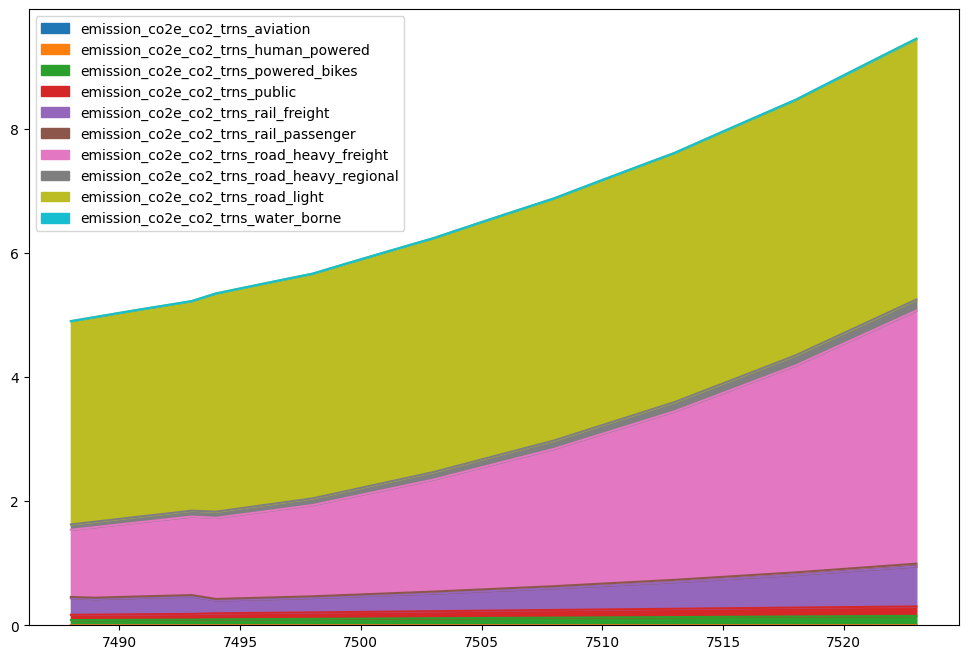

In [6]:
df_plot = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin(["guatemala"])
][[x for x in df_out.columns if x.startswith("emission_co2e_co2") and ("trns" in x)]]

fig, ax = plt.subplots(figsize = (12, 8))
df_plot.plot.area(ax = ax)

In [8]:
df_try = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin(["brazil"])
];

In [37]:
subsec = "Industrial Energy"
dict_repl = {
    "Carbon Capture and Sequestration": "CCSQ",
    "Stationary Combustion and Other Energy": "SCOE"
}

for subsec in ["Carbon Capture and Sequestration", "Industrial Energy", "Stationary Combustion and Other Energy", "Transportation"]:
    #sisepuede.model_attributes.get_standard_variables(
    #    df_try,
        #"Energy Demand by Fuel in Industrial Energy"
    #    "Energy Consumption from Transportation"
    #)
    
    snm = dict_repl.get(subsec, subsec)
    
    vl_1 = sisepuede.model_attributes.build_varlist(
        subsec, f"Energy Consumption from {snm}"
    )
    vl_2 = sisepuede.model_attributes.build_varlist(
        "Energy Fuels", f"Energy Demand by Fuel in {snm}"
    )
    
    print(subsec)
    print("-"*len(subsec) + "\n")
    
    str_print = " +\n".join(vl_1) + "\n = \n" + " +\n".join(vl_2) + "\n\n\n"
    
    print(str_print)



Carbon Capture and Sequestration
--------------------------------

energy_consumption_ccsq_direct_air_capture
 = 
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biofuels +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biogas +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biomass +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_coal +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_coke +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_diesel +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_electricity +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gas_furnace +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gas_petroleum_liquid +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gasoline +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_geothermal +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydrogen +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydropower +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_kerosene +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_nat

In [17]:
df_out[
    (df_out["time_period"] == 35) &
    (df_out["primary_id"] == 0)
][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_inen_fuel_coal"]]




,primary_id,region,energy_demand_enfu_subsector_total_pj_inen_fuel_coal
35,0,argentina,229.046741
971,0,brazil,1260.032978
1907,0,chile,121.707515
2843,0,colombia,355.019806
3779,0,costa_rica,41.374175
4715,0,dominican_republic,83.226304
5651,0,ecuador,61.921287
6587,0,el_salvador,26.714798
7523,0,guatemala,94.181011
8459,0,honduras,38.230958


In [10]:
df_out[df_out["time_period"] == 35][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_trns_fuel_electricity"]]

,primary_id,region,energy_demand_enfu_subsector_total_pj_trns_fuel_electricity
35,0,argentina,2.422414
71,5005,argentina,2.422414
107,6006,argentina,2.422414
143,7007,argentina,2.422414
179,8008,argentina,2.422414
...,...,...,...
15767,25025,uruguay,0.169664
15803,26026,uruguay,0.169664
15839,27027,uruguay,0.169664
15875,28028,uruguay,0.169664


In [11]:
dict_check = sisepuede.experimental_manager.dict_future_trajectories["brazil"].dict_sampling_units
#for k in dict_check.keys():
#    if "frac_trns_fuelmix_public_electricity" in dict_check[k].variable_specifications:
#        print(k)
su = dict_check.get(1223)
su.generate_future(0, 1, baseline_future_q = True)
su.variable_specifications

['frac_trns_fuelmix_public_electricity']

In [82]:
baseline_future_q = True

In [12]:
baseline_future_q = True
strat_base = 0
rv = su.uncertainty_ramp_vector
vs = su.variable_specifications[0]

dict_ordered_traj_arrays = su.ordered_trajectory_arrays.get((vs, None))
dict_scalar_diff_arrays = su.scalar_diff_arrays.get((vs, None))
dict_var_info = su.dict_variable_info.get((vs, None))

# order the uniform scaling by the ordered trajectory arrays
vec_unif_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["uniform_scaling_q"], (vs, None))
# gives 1s where we keep standard fanning (using the ramp vector) and 0s where we use uniform scaling
vec_base = 1 - vec_unif_scalar
#
if max(vec_unif_scalar) > 0:
    vec_max_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["max_scalar"], (vs, None))
    vec_min_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["min_scalar"], (vs, None))
    vec_unif_scalar = vec_unif_scalar*(vec_min_scalar + lhs_trial_x*(vec_max_scalar - vec_min_scalar)) if not baseline_future_q else np.ones(vec_unif_scalar.shape)

vec_unif_scalar = np.array([vec_unif_scalar]).transpose()
vec_base = np.array([vec_base]).transpose()

In [13]:
delta_max = dict_scalar_diff_arrays.get("max_tp_end_delta")
delta_min = dict_scalar_diff_arrays.get("min_tp_end_delta")
delta_diff = delta_max - delta_min
delta_val = delta_min + 1*delta_diff

In [14]:
# delta and uniform scalar don't apply if operating under baseline future
delta_vec = 0.0 if baseline_future_q else (rv * np.array([delta_val]).transpose())

arr_out = dict_ordered_traj_arrays.get("data") + delta_vec
arr_out = arr_out*vec_base + vec_unif_scalar*dict_ordered_traj_arrays.get("data")

In [18]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)
#array_strat_deltas = np.concatenate(
#	series_strats.apply(
#		self.dict_strategy_info["difference_arrays_by_strategy"].get,
#		args = (np.zeros((1, len(self.time_periods))), )
#	)
#)*lhs_mult_deltas

array_strat_deltas *= lhs_mult_deltas
arr_out = (array_strat_deltas + arr_out[w, :]) if (len(w) > 0) else arr_out

In [20]:
series_strats

[0, 1, 2, 1001, 2001, 3001, 4001, 5001]

In [121]:
xx = series_strats.apply(
    su.dict_strategy_info["difference_arrays_by_strategy"].get,
    args = (np.zeros((1, len(su.time_periods))), )
)

In [130]:
dict_test = {"this": 5, "that": 9}


In [127]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)



In [112]:
su.dict_strategy_info["difference_arrays_by_strategy"].get(series_strats[1])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03913043,
        0.07826087, 0.1173913 , 0.15652174, 0.19565217, 0.23478261,
        0.27391304, 0.31304348, 0.35217391, 0.39130435, 0.43043478,
        0.46956522, 0.50869565, 0.54782609, 0.58695652, 0.62608696,
        0.66521739, 0.70434783, 0.74347826, 0.7826087 , 0.82173913,
        0.86086957, 0.9       , 0.9       , 0.9       , 0.9       ,
        0.9       ]])

In [30]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)

df_try[df_try["time_period"] == 35][["strategy_id", "time_period"] + [x for x in df_try.columns if x.startswith("frac_trns_fuelmix")]]

,strategy_id,time_period,frac_trns_fuelmix_aviation_electricity,frac_trns_fuelmix_aviation_hydrogen,frac_trns_fuelmix_aviation_kerosene,frac_trns_fuelmix_powered_bikes_electricity,frac_trns_fuelmix_powered_bikes_gasoline,frac_trns_fuelmix_public_biofuels,frac_trns_fuelmix_public_diesel,frac_trns_fuelmix_public_electricity,...,frac_trns_fuelmix_road_heavy_regional_natural_gas,frac_trns_fuelmix_road_light_biofuels,frac_trns_fuelmix_road_light_diesel,frac_trns_fuelmix_road_light_electricity,frac_trns_fuelmix_road_light_gasoline,frac_trns_fuelmix_road_light_hydrogen,frac_trns_fuelmix_water_borne_diesel,frac_trns_fuelmix_water_borne_electricity,frac_trns_fuelmix_water_borne_hydrogen,frac_trns_fuelmix_water_borne_natural_gas
35,0,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
71,1,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
107,2,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
143,1001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
179,2001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
215,3001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
251,3002,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
287,3003,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
323,3004,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
359,3005,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0


In [13]:
2+2

4

In [31]:
df_try.to_csv(
    os.path.join(sisepuede.file_struct.dir_tmp, "temporary_full_inputs.csv"),
    encoding = "UTF-8",
    index = None
)

In [39]:
df_in = su.df_variable_definitions #if not isinstance(df_in, pd.DataFrame) else df_in
fields_id = su.fields_id #if not isinstance(fields_id, list) else fields_id
field_merge_key = su.primary_key_id_coordinates# if (field_merge_key is None) else field_merge_key
tups_id = set([tuple(x) for x in np.array(df_in[fields_id])])

for tg_type in su.required_tg_specs:
    df_check = df_in[df_in[su.field_variable_trajgroup_type] == tg_type]
    for vs in list(df_check[su.field_variable].unique()):
        tups_id = tups_id & set([tuple(x) for x in np.array(df_check[df_check[su.field_variable] == vs][fields_id])])
#
tups_id = sorted(list(tups_id))
df_scen = pd.DataFrame(tups_id, columns = fields_id)
df_in = pd.merge(df_in, df_scen, how = "inner", on = fields_id)
df_scen[field_merge_key] = range(len(df_scen))
tups_id = sorted(list(tups_id))

3386.0

<AxesSubplot: xlabel='time_period'>

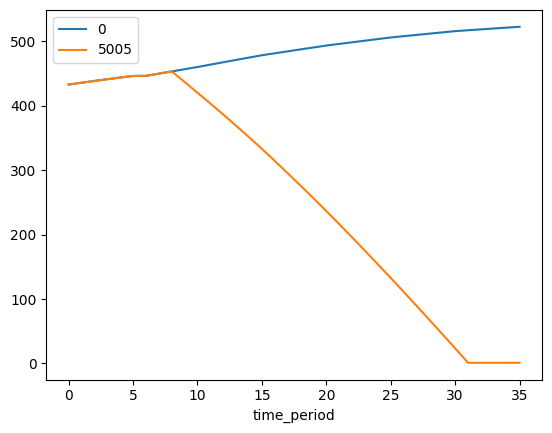

In [7]:
import support_functions as sf
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_entc")]
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_trns")]
df_wide = df_out[df_out["region"] == "brazil"][["primary_id", "time_period"] + fields]
df_wide = sf.pivot_df_clean(df_wide, ["primary_id"], fields);
df_wide.plot(x = "time_period")


In [24]:
import model_afolu as mafl
import model_ippu as mi
import model_energy as me
import model_circular_economy as mce
import setup_analysis as sa
import importlib
import numpy as np
import os, os.path
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")
df_input["efficfactor_ccsq_heat_energy_direct_air_capture_electricity"] = 0.99

In [106]:
import inspect
#inspect.getmembers(sisepuede.database)
ft = sisepuede.experimental_manager.dict_future_trajectories.get("brazil")
df_input = ft.generate_future_from_lhs_vector(
    None,
    df_row_lhc_sample_l = None,
    future_id = 0,
    baseline_future_q = 0
)

df_input = df_input[df_input["strategy_id"] == 0].reset_index(drop = True).drop(["future_id", "strategy_id"], axis = 1)

In [142]:
df_input.to_csv("/Users/jsyme/Desktop/df_input_tmp.csv", index = None, encoding = "UTF-8")

In [21]:
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")

In [392]:
import ordered_direct_product_table as odpt
importlib.reload(odpt)  
            
    
    

vit = odpt.OrderedDirectProductTable(
    {"strategy_id": list(range(100)), "future_id": list(range(1000)), "design_id": [0, 1, 2, 3], "time_series_id": [0, 1, 2]},
    ["design_id", "time_series_id", "strategy_id", "future_id"],
    key_primary = "primary_id"
)


In [399]:
vit.get_dims_from_key(596, return_type = "dict")

{'design_id': 0, 'time_series_id': 0, 'strategy_id': 0, 'future_id': 596}

In [376]:
import time
t0 = time.time()

df1 = vit.get_indexing_dataframe(key_values = {"future_id": list(range(4000)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])

sf.get_time_elapsed(t0, n_digits = 5)

1.41068

In [401]:
vit.get_indexing_dataframe(key_values = {"future_id": list(range(5)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])




['primary_id']


,primary_id
0,0
1,1
2,2
3,3
4,4
...,...
175,1199000
176,1199001
177,1199002
178,1199003


In [332]:
#vit.get_indexing_dataframe(key_values = rands)
vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})

99871672

In [346]:
#vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})





get_dims_from_key(99871672, return_type = "dict")

{'design_id': 3, 'time_series_id': 0, 'strategy_id': 98, 'future_id': 71672}

In [338]:
99871672%30000000

9871672

In [330]:
#rands = np.random.choice(range(10**8), 3000, replace = False);
60/15
0%1

0

In [ ]:
#
# idea: 
#    0. generate output table of proper shape
#    1. generate dimensional vector
#    2. take subset of that vector
#    3. add to output table
#

In [262]:
vit.cardinality_ordered_reversed
vit.cumulative_dimensional_products_reversed
vit.get_key_value(**{"design_id": 3, "strategy_id": 1, "future_id": 0})



0
1
0
3


6400000

In [47]:
key = "this"
def func(**kwargs):
    for k in kwargs.keys():
        val = kwargs.get(k)
        print(f"{k}:\t{val}")
        
func(**{"strategy_id": 0, "primary_id": 2})

strategy_id:	0
primary_id:	2


In [25]:
importlib.reload(sa)
importlib.reload(me)

model_energy = me.NonElectricEnergy(sa.model_attributes)
model_afolu = mafl.AFOLU(sa.model_attributes)
model_ippu = mi.IPPU(sa.model_attributes)
model_ce = mce.CircularEconomy(sa.model_attributes)


df_ins = df_input.copy()

# afolu
df_out_afolu = model_afolu.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_afolu,
    model_ce.integration_variables + model_ippu.integration_variables + model_energy.integration_variables_non_fgtv
)

# circular economy
df_out_ce = model_ce.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_ce,
    model_ippu.integration_variables + model_energy.integration_variables_non_fgtv
)

# ippu
if False:
    df_out_ippu = model_ippu.project(df_ins)
    df_ins = sa.model_attributes.transfer_df_variables(
        df_ins,
        df_out_ippu,
        model_energy.integration_variables_non_fgtv
    )

    df_out_energy = model_energy.project(df_ins)



In [95]:
#sa.model_attributes.get_subsector_variables("Carbon Capture and Sequestration")
subsec = "ccsq"

for subsec in ["ccsq", "scoe", "trns", "inen"]:
    check1 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if f"energy_demand_enfu_subsector_total_pj_{subsec}" in x]
    ].sum(axis = 1))

    check2 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" not in x)]
    ].sum(axis = 1))
    
    check3 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" in x)]
    ].sum(axis = 1))
    
    print(f"subsec {subsec}:")
    print(check1 - check2)
    print(check1 - check3)
    print("")

subsec ccsq:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

subsec scoe:
[ 0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  2.27373675e-13  2.27373675e-13  0.00000000e+00  2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27373675e-13
  0.00000000e+00 -2.27373675e-13 -2.27373675e-13  0.00000000e+00
 -2.27373675e-13  0.00000000e+00  0.00000000e+00  2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
[-2.27373675e-13 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  2.27373675e-13  2.27373675e-13  0

In [63]:
print(subsec)
df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_demand_enfu_subsector_total_pj_{subsec}" in x)]
].sum(axis = 1)

df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" not in x)]
]
df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_demand_enfu_subsector_total_pj_{subsec}" in x)]
]

inen


,energy_demand_enfu_subsector_total_pj_inen_fuel_biofuels,energy_demand_enfu_subsector_total_pj_inen_fuel_biogas,energy_demand_enfu_subsector_total_pj_inen_fuel_biomass,energy_demand_enfu_subsector_total_pj_inen_fuel_coal,energy_demand_enfu_subsector_total_pj_inen_fuel_coke,energy_demand_enfu_subsector_total_pj_inen_fuel_diesel,energy_demand_enfu_subsector_total_pj_inen_fuel_electricity,energy_demand_enfu_subsector_total_pj_inen_fuel_gas_furnace,energy_demand_enfu_subsector_total_pj_inen_fuel_gas_petroleum_liquid,energy_demand_enfu_subsector_total_pj_inen_fuel_gasoline,...,energy_demand_enfu_subsector_total_pj_inen_fuel_hydropower,energy_demand_enfu_subsector_total_pj_inen_fuel_kerosene,energy_demand_enfu_subsector_total_pj_inen_fuel_natural_gas,energy_demand_enfu_subsector_total_pj_inen_fuel_nuclear,energy_demand_enfu_subsector_total_pj_inen_fuel_ocean,energy_demand_enfu_subsector_total_pj_inen_fuel_oil,energy_demand_enfu_subsector_total_pj_inen_fuel_other,energy_demand_enfu_subsector_total_pj_inen_fuel_solar,energy_demand_enfu_subsector_total_pj_inen_fuel_waste,energy_demand_enfu_subsector_total_pj_inen_fuel_wind
0,0.0,0.0,2392.550271,1156.498987,977.969437,1.795398,5660.577095,264.509709,0.126464,0.241881,...,0.0,0.0,7676.644206,0.0,0.0,6992.150941,0.0,25.121778,0.0,0.0
1,0.0,0.0,2390.047010,1155.288973,976.932265,1.802197,5654.652551,264.226550,0.126943,0.242797,...,0.0,0.0,7668.603903,0.0,0.0,6984.826270,0.0,25.095494,0.0,0.0
2,0.0,0.0,2387.535988,1154.075208,975.892071,1.801933,5648.705836,263.942613,0.126925,0.242762,...,0.0,0.0,7660.538798,0.0,0.0,6977.479001,0.0,25.069128,0.0,0.0
3,0.0,0.0,2385.017195,1152.857687,974.848951,1.807626,5642.744148,263.657947,0.127326,0.243529,...,0.0,0.0,7652.448915,0.0,0.0,6970.109206,0.0,25.042681,0.0,0.0
4,0.0,0.0,2382.490633,1151.636410,973.803042,1.810135,5636.762524,263.372617,0.127503,0.243867,...,0.0,0.0,7644.334349,0.0,0.0,6962.716958,0.0,25.016152,0.0,0.0
5,0.0,0.0,2379.956288,1150.411371,972.754439,1.848598,5630.782554,263.086672,0.130212,0.249049,...,0.0,0.0,7636.195115,0.0,0.0,6955.302400,0.0,24.989541,0.0,0.0
6,0.0,0.0,2389.686941,1155.114925,976.744397,1.888368,5653.827919,264.166795,0.133013,0.254407,...,0.0,0.0,7667.423370,0.0,0.0,6983.747337,0.0,25.091713,0.0,0.0
7,0.0,0.0,2399.293969,1159.758722,980.671442,1.929625,5676.575460,265.227176,0.135919,0.259965,...,0.0,0.0,7698.247286,0.0,0.0,7011.822795,0.0,25.192587,0.0,0.0
8,0.0,0.0,2408.786445,1164.347148,984.551620,1.972318,5699.052796,266.274868,0.138926,0.265717,...,0.0,0.0,7728.703626,0.0,0.0,7039.563453,0.0,25.292258,0.0,0.0
9,0.0,0.0,2418.167497,1168.881714,988.386211,2.016493,5721.267356,267.310219,0.142038,0.271668,...,0.0,0.0,7758.802431,0.0,0.0,7066.978456,0.0,25.390759,0.0,0.0


In [77]:
import inspect
import time
inspect.getmembers(sisepuede.database.db)

dir_exp = os.path.join(sisepuede.file_struct.dir_out, f"csvs_{sisepuede.analysis_id.id_fs_safe}")
if not os.path.exists(dir_exp):
    os.makedirs(dir_exp, exist_ok = True)
    
t0 = time.time()
for k in sisepuede.database.db.dict_iterative_database_tables:
    
    print(f"Starting table {k}...")
    
    fp_write = os.path.join(dir_exp, f"{k}.csv")
    
    if not os.path.exists(fp_write):
        idt = sisepuede.database.db.dict_iterative_database_tables.get(k)
        tab = idt.read_table()

        tab.to_csv(
            fp_write,
            index = None,
            encoding = "UTF-8"
        ) if (tab is not None) else None
    
    t_elapse = np.round(time.time() - t0, decimals = 4)
    print(f"Table {k} complete at {t_elapse} seconds.\n\n")
    


Starting table ANALYSIS_METADATA...
Table ANALYSIS_METADATA complete at 0.0016 seconds.


Starting table ATTRIBUTE_DESIGN...
Table ATTRIBUTE_DESIGN complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES...
Table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS...
Table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS complete at 0.0018 seconds.


Starting table ATTRIBUTE_PRIMARY...
Table ATTRIBUTE_PRIMARY complete at 0.0019 seconds.


Starting table ATTRIBUTE_STRATEGY...
Table ATTRIBUTE_STRATEGY complete at 0.0019 seconds.


Starting table MODEL_BASE_INPUT_DATABASE...
Table MODEL_BASE_INPUT_DATABASE complete at 0.002 seconds.


Starting table MODEL_INPUT...
Table MODEL_INPUT complete at 0.0022 seconds.


Starting table MODEL_OUTPUT...
Table MODEL_OUTPUT complete at 23.5008 seconds.




In [64]:
df = sisepuede.database.db.dict_iterative_database_tables.get("MODEL_OUTPUT").read_table();


##  RUBBER AND LEATHER ISSUES

In [ ]:
dict_inputs = sisepuede.generate_scenario_database_from_primary_key(0);


In [30]:
region_check = "brazil"
df_input_check = dict_inputs.get(region_check)
df_output_check = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin([region_check])
].reset_index(drop = True)

In [31]:
df_input_check[[x for x in df_input_check.columns if "rubber" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,demscalar_ippu_rubber_and_leather,ef_waso_incineration_tonne_n2o_per_tonne_rubber_leather,elasticity_ippu_rubber_and_leather_production_to_gdp,elasticity_waso_msw_to_gdppc_rubber_leather,factor_waso_waste_per_capita_scalar_rubber_leather,frac_inen_energy_recycled_rubber_and_leather_coal,frac_inen_energy_recycled_rubber_and_leather_coke,frac_inen_energy_recycled_rubber_and_leather_diesel,...,frac_waso_recycled_rubber_leather,physparam_waso_k_rubber_leather,prodinit_ippu_recycled_rubber_and_leather_tonne,prodinit_ippu_rubber_and_leather_tonne,qty_ippu_recycled_rubber_and_leather_tonne_cod_per_m3_ww,qty_ippu_rubber_and_leather_tonne_cod_per_m3_ww,scalar_inen_energy_demand_recycled_rubber_and_leather,scalar_inen_energy_demand_rubber_and_leather,vol_ippu_recycled_rubber_and_leather_m3_ww_per_tonne_production,vol_ippu_rubber_and_leather_m3_ww_per_tonne_production
0,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.050828,0.005648,0.000187,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
1,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
2,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
3,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
4,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182


In [32]:
df_input_check[[x for x in df_input_check.columns if "cement" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_cement,dem_ippu_average_materials_tonne_per_household_cement,demscalar_ippu_cement,ef_ippu_tonne_co2_per_tonne_production_cement_clinker,elasticity_ippu_cement_production_to_gdp,frac_inen_energy_cement_coal,frac_inen_energy_cement_coke,frac_inen_energy_cement_diesel,frac_inen_energy_cement_electricity,frac_inen_energy_cement_gas_furnace,...,frac_inen_energy_cement_natural_gas,frac_inen_energy_cement_oil,frac_inen_energy_cement_solar,frac_inen_energy_cement_solid_biomass,frac_ippu_cement_clinker,net_imports_cement_clinker_tonne,prodinit_ippu_cement_tonne,qty_ippu_cement_tonne_cod_per_m3_ww,scalar_inen_energy_demand_cement,vol_ippu_cement_m3_ww_per_tonne_production
0,0.02,3.0,0.995377,0.264371,0.25,0.318215,0.035357,0.059189,0.158820,0.0,...,0.064766,0.276215,0.0,0.028249,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
1,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
2,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
3,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
4,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123


In [28]:
df_input_check[[x for x in df_input_check.columns if ("rubber" in x) and x.startswith("frac_waso")]].head()

,frac_waso_initial_composition_ind_rubber_leather,frac_waso_initial_composition_mun_rubber_leather,frac_waso_recycled_rubber_leather
0,0.0,0.0,0.066
1,0.0,0.0,0.066
2,0.0,0.0,0.066
3,0.0,0.0,0.066
4,0.0,0.0,0.066


In [27]:
import inspect
import sqlalchemy
import sql_utilities as sq
engine = sqlalchemy.create_engine(
    f"sqlite:///{sisepuede.models.fp_nemomod_temp_sqlite_db}"
)



In [43]:
df_iar = sq.sql_table_to_df(
    engine,
    "InputActivityRatio"
    #"InputActivityRatio"
)
df_oar = sq.sql_table_to_df(
    engine,
    "OutputActivityRatio"
    #"InputActivityRatio"
)
df_oar

,id,r,t,f,m,y,val
0,1,costa_rica,pp_biogas,fuel_electricity,generate,1000,1.0
1,2,costa_rica,pp_biogas,fuel_electricity,generate,1001,1.0
2,3,costa_rica,pp_biogas,fuel_electricity,generate,1002,1.0
3,4,costa_rica,pp_biogas,fuel_electricity,generate,1003,1.0
4,5,costa_rica,pp_biogas,fuel_electricity,generate,1004,1.0
...,...,...,...,...,...,...,...
967,968,costa_rica,supply_fuel_wind,fuel_wind,generate,1031,1.0
968,969,costa_rica,supply_fuel_wind,fuel_wind,generate,1032,1.0
969,970,costa_rica,supply_fuel_wind,fuel_wind,generate,1033,1.0
970,971,costa_rica,supply_fuel_wind,fuel_wind,generate,1034,1.0


In [2]:
sq.sql_table_to_df(
    engine,
    "FUELS"
    #"InputActivityRatio"
)

NameError: name 'sq' is not defined

In [36]:
engine.table_names()

['AccumulatedAnnualDemand',
 'AnnualEmissionLimit',
 'AnnualExogenousEmission',
 'AvailabilityFactor',
 'CapacityFactor',
 'CapacityOfOneTechnologyUnit',
 'CapacityToActivityUnit',
 'CapitalCost',
 'CapitalCostStorage',
 'DefaultParams',
 'DepreciationMethod',
 'DiscountRate',
 'EMISSION',
 'EmissionActivityRatio',
 'EmissionsPenalty',
 'FUEL',
 'FixedCost',
 'InputActivityRatio',
 'InterestRateStorage',
 'InterestRateTechnology',
 'LTsGroup',
 'MODE_OF_OPERATION',
 'MinShareProduction',
 'MinStorageCharge',
 'MinimumUtilization',
 'ModelPeriodEmissionLimit',
 'ModelPeriodExogenousEmission',
 'NODE',
 'NodalDistributionDemand',
 'NodalDistributionStorageCapacity',
 'NodalDistributionTechnologyCapacity',
 'OperationalLife',
 'OperationalLifeStorage',
 'OutputActivityRatio',
 'REGION',
 'REMinProductionTarget',
 'RETagTechnology',
 'RampRate',
 'RampingReset',
 'ReserveMargin',
 'ReserveMarginTagFuel',
 'ReserveMarginTagTechnology',
 'ResidualCapacity',
 'ResidualStorageCapacity',
 'STOR

In [16]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)

In [38]:
df_try[[
    x for x in df_try.columns if ("aviation" in x)
]];
# occrate in aviation is 
df_try2 = df_try[
    df_try["time_period"].isin([0, 1, 2]) & 
    df_try["strategy_id"].isin([0])
].reset_index(drop = True);

df_try2[[
    x for x in df_try2.columns if ("trde" in x)
]]


,deminit_trde_freight_mt_km,deminit_trde_private_and_public_per_capita_passenger_km,deminit_trde_regional_per_capita_passenger_km,demscalar_trde_freight,demscalar_trde_private_and_public,demscalar_trde_regional,elasticity_trde_mtkm_to_gdp_freight,elasticity_trde_pkm_to_gdppc_private_and_public,elasticity_trde_pkm_to_gdppc_regional
0,1.988759e+06,0.008526,0.005480,1.0,1.0,1.0,1.0,0.14,0.3
1,1.955245e+06,0.008501,0.005401,1.0,1.0,1.0,1.0,0.14,0.3
2,1.955245e+06,0.008501,0.005401,1.0,1.0,1.0,1.0,0.14,0.3


In [25]:
df_check = df_out[
    df_out["region"].isin(["brazil"]) &
    df_out["primary_id"].isin([0])
].reset_index(drop = True)
df_check[[
    x for x in df_check.columns if ("regional" in x) and ("trde" in x)
]]


,dem_trde_regional_passenger_km
0,1.120458e+06
1,1.125540e+06
2,1.130507e+06
3,1.135304e+06
4,1.139856e+06
5,1.144110e+06
6,1.147918e+06
7,1.158527e+06
8,1.169114e+06
9,1.179678e+06


In [36]:
df_check[
    df_check["time_period"].isin([0, 2])
][[
    x for x in df_check.columns if ("emission" in x) and ("trns" in x)
]]

,emission_co2e_ch4_trns_aviation,emission_co2e_ch4_trns_human_powered,emission_co2e_ch4_trns_powered_bikes,emission_co2e_ch4_trns_public,emission_co2e_ch4_trns_rail_freight,emission_co2e_ch4_trns_rail_passenger,emission_co2e_ch4_trns_road_heavy_freight,emission_co2e_ch4_trns_road_heavy_regional,emission_co2e_ch4_trns_road_light,emission_co2e_ch4_trns_water_borne,...,emission_co2e_n2o_trns_human_powered,emission_co2e_n2o_trns_powered_bikes,emission_co2e_n2o_trns_public,emission_co2e_n2o_trns_rail_freight,emission_co2e_n2o_trns_rail_passenger,emission_co2e_n2o_trns_road_heavy_freight,emission_co2e_n2o_trns_road_heavy_regional,emission_co2e_n2o_trns_road_light,emission_co2e_n2o_trns_water_borne,emission_co2e_subsector_total_trns
0,4.865727e-09,0.0,1.978793e-08,0.000002,0.012289,0.000004,0.455738,0.000004,0.000005,0.000139,...,0.0,5.395002e-08,0.000012,0.828718,0.000241,1.586244,0.000032,0.000013,0.000389,95.992430
2,4.909364e-09,0.0,2.004421e-08,0.000002,0.012187,0.000004,0.087895,0.000004,0.000005,0.000138,...,0.0,5.464875e-08,0.000012,0.821786,0.000248,0.578974,0.000033,0.000013,0.000386,47.141113


In [54]:
flds = list(df_try2.columns)#[x for x in df_try2.columns if ("road_heavy_freight" in x)]
fld_check = []

for fld in flds:
    vec = np.array(df_try2[fld])
    v0, v2 = vec[0], vec[2]
    delta = np.abs(vec[2]/vec[0] - 1)
    
    if (delta > 0.05) and (("trns" in fld) or ("trde" in fld)):
        print(f"field '{fld}':\n\tv0:\t{v0}\n\tv2:\t{v2}\n")
        fld_check.append(fld)

field 'frac_trns_fuelmix_public_electricity':
	v0:	0.0014800197335964
	v2:	0.0009078529278256

field 'frac_trns_fuelmix_road_light_diesel':
	v0:	0.0273322508679524
	v2:	0.0291327470632048

field 'frac_trns_fuelmix_road_light_electricity':
	v0:	0.0002244135545786
	v2:	0.000431209084138

